#Project- Time Series Forecasting

## Rose Sales Analysis & Forecasting

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Rose.csv



In [3]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## **1. Read the data as an appropriate Time Series data and plot the data.**


In [4]:
df=pd.read_csv('Rose.csv')
df

YearMonth   Rose
0     1980-01  112.0
1     1980-02  118.0
2     1980-03  129.0
3     1980-04   99.0
4     1980-05  116.0
..        ...    ...
182   1995-03   45.0
183   1995-04   52.0
184   1995-05   28.0
185   1995-06   40.0
186   1995-07   62.0

[187 rows x 2 columns]

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
# Adding the time stamp to the data frame
df['Year_Month'] = pd.DataFrame(date)
df

YearMonth   Rose Year_Month
0     1980-01  112.0 1980-01-31
1     1980-02  118.0 1980-02-29
2     1980-03  129.0 1980-03-31
3     1980-04   99.0 1980-04-30
4     1980-05  116.0 1980-05-31
..        ...    ...        ...
182   1995-03   45.0 1995-03-31
183   1995-04   52.0 1995-04-30
184   1995-05   28.0 1995-05-31
185   1995-06   40.0 1995-06-30
186   1995-07   62.0 1995-07-31

[187 rows x 3 columns]

In [7]:
#Changing the time series column to Index
df.set_index('Year_Month',inplace=True)

In [8]:
#Dropping the YearMonth column
df.drop(['YearMonth'], axis=1, inplace=True)

In [9]:
df

Rose
Year_Month       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

In [10]:
#Checking Shape of the data
df.shape

(187, 1)

In [11]:
#Checking the information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


- **Insights**
 - The DataFrame has 187 entries with a DatetimeIndex ranging from January 1980 to July 1995.
 - The 'Rose' column is of integer type (int64), and it has 187 non-null values.


#### Ploting the Time Series

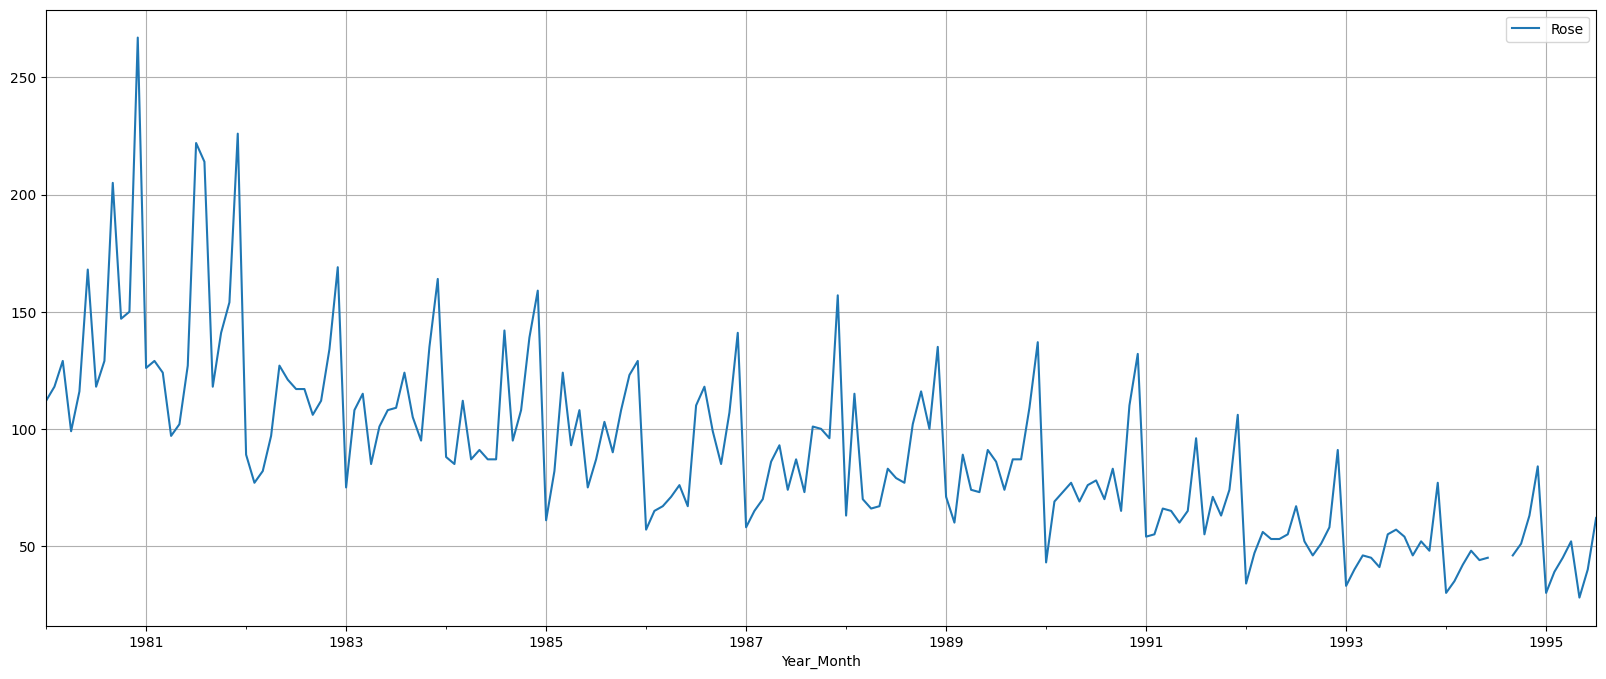

In [12]:
rcParams['figure.figsize'] = 20,8
df.plot()
plt.grid();

- **Insights**

 - **Decreasing Trend:** The data shows a consistent decrease in Rose wine sales over the years, suggesting a declining pattern in customer demand for this type of wine.

 - **Seasonal Patterns:** Despite the overall decreasing trend, there are still seasonal variations in the data, with sales peaking in certain months and dropping in others.
 - **Missing Data:** There are missing values in the year 1994 and  which will be handled accordingly


## **2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**


In [13]:
#Checking Null Values
df.isnull().sum()

Rose    2
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

Rose
Year_Month      
1994-07-31   NaN
1994-08-31   NaN

- There are 2 Null values in the dataset, for 07-1994 & 08-1994, which needs to be corrected. Let's fix the Null values  

In [15]:
# Interpolate the missing values using cubic interpolation
df['Rose'] = df['Rose'].interpolate(method='cubic')


In [16]:
imputed_values = df.loc[['1994-07-31', '1994-08-31']]
print(imputed_values)


                 Rose
Year_Month           
1994-07-31  45.270014
1994-08-31  44.504928


In [17]:
#Let's reconfirm the duplicate values
print(df.isnull().sum())


Rose    0
dtype: int64


- The null values has been taken care of. Let's see the **Time Series Plot after treating Null values**

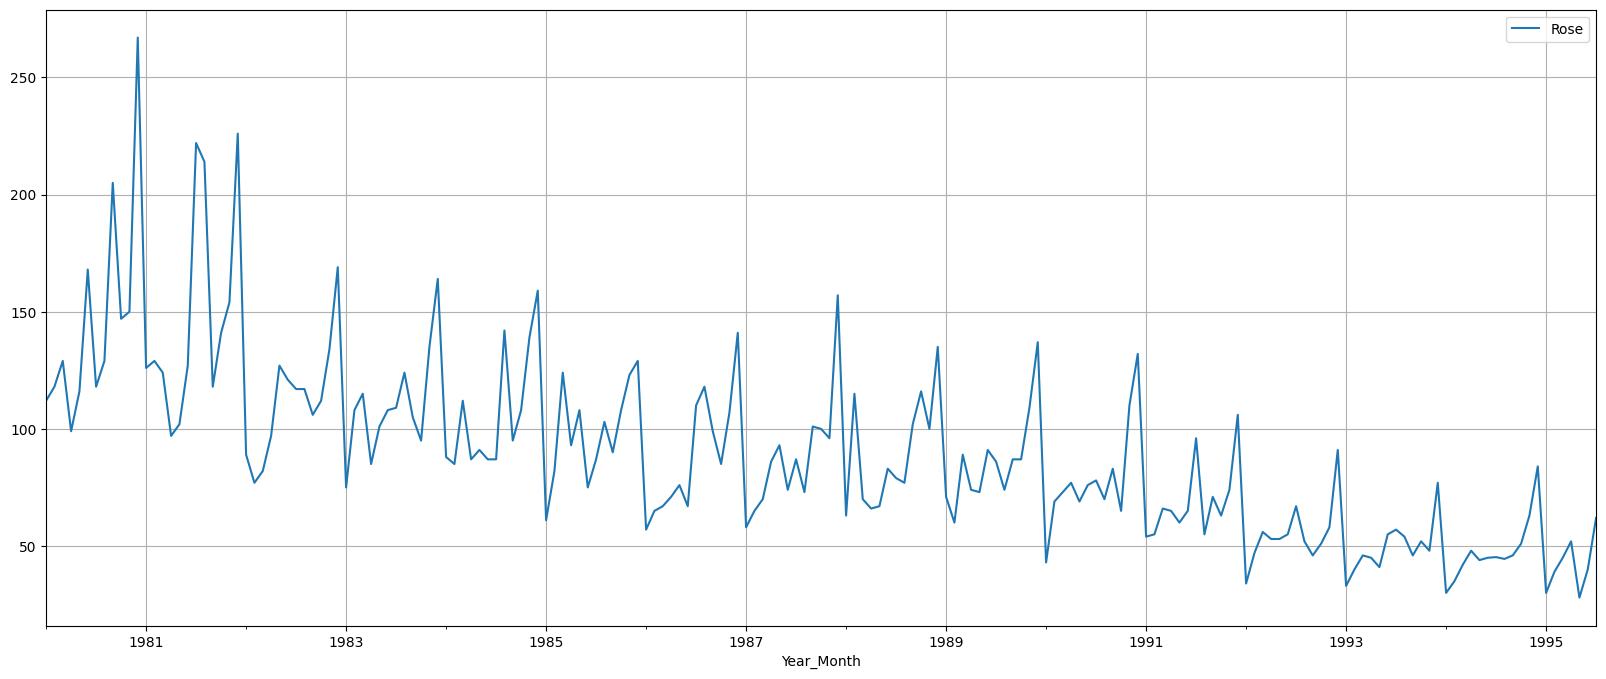

In [18]:
rcParams['figure.figsize'] = 20,8
df.plot()
plt.grid();

- Plot looks continous for time series Analysis

In [19]:
#Duplicate values
df.duplicated().sum()

89

- The dataset shows 90  Duplicates, however, this could be the same no of sales at different year, let's validate it.

In [20]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Rose
Year_Month       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1994-11-30   63.0
1995-01-31   30.0
1995-03-31   45.0
1995-04-30   52.0
1995-06-30   40.0

[143 rows x 1 columns]

- As per the above, it is clear that there are **no duplicate** values againt a particular timestamp.

#### Checking the basic measures of descriptive statistics

In [21]:
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  89.907887  39.245847  28.0  62.5  85.0  111.0  267.0

- **Insights**
 -  The dataset contains 187 observations of Rose product sales.
 - It significant variability, with sales ranging from a minimum of 28 units to a maximum of 267 units
 - On average, the monthly sales of Rose wine are approximately 89.91 units
 - The data is right-skewed, with the mean (89.91 units) being higher than the median (85 units)


#### Boxplot to understand the spread of Sales across different years and within different months across years.

Skewness = 1.27


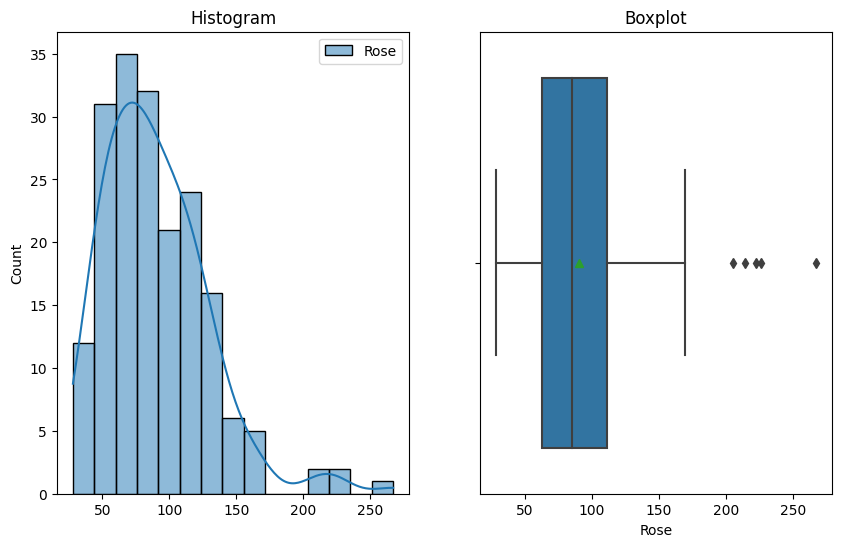

In [22]:
# Historgram & Boxplot of the sales

plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Histogram')
sns.histplot(df, kde = True);

plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(x = df['Rose'], showmeans = True);
print('Skewness =', round(df['Rose'].skew(), 2));


- The dataset is right skewed with the presence of outliers on the right tail

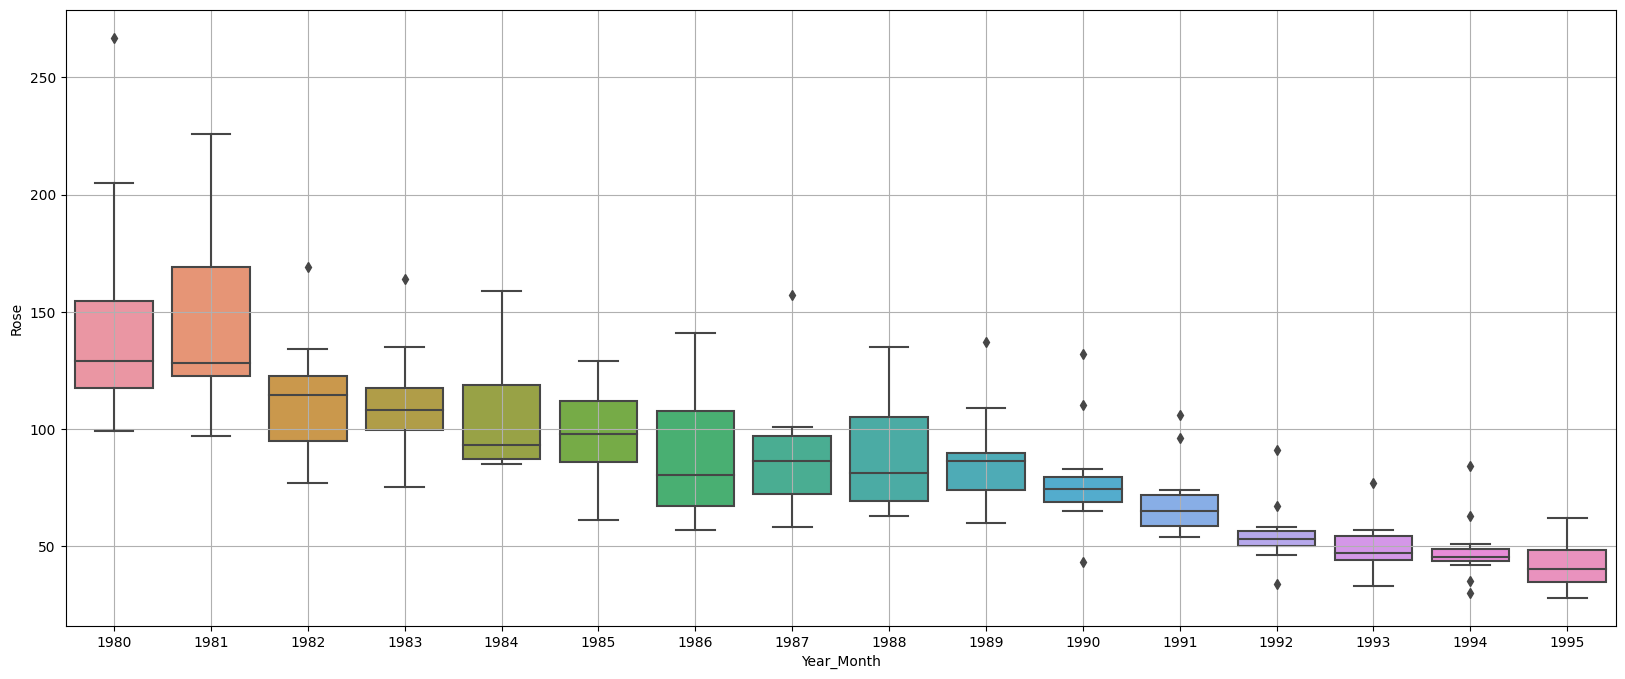

In [23]:
#Yearly Boxplot
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();


- **Insights**
 - Sales of Rose products have been declining over time.
 - The dataset is skewed with the presence of outliers on the right tail.
 - There is significant variability in sales from year to year
 - There are a few outliers in the data, which could be due to special promotions, holidays or other occasions


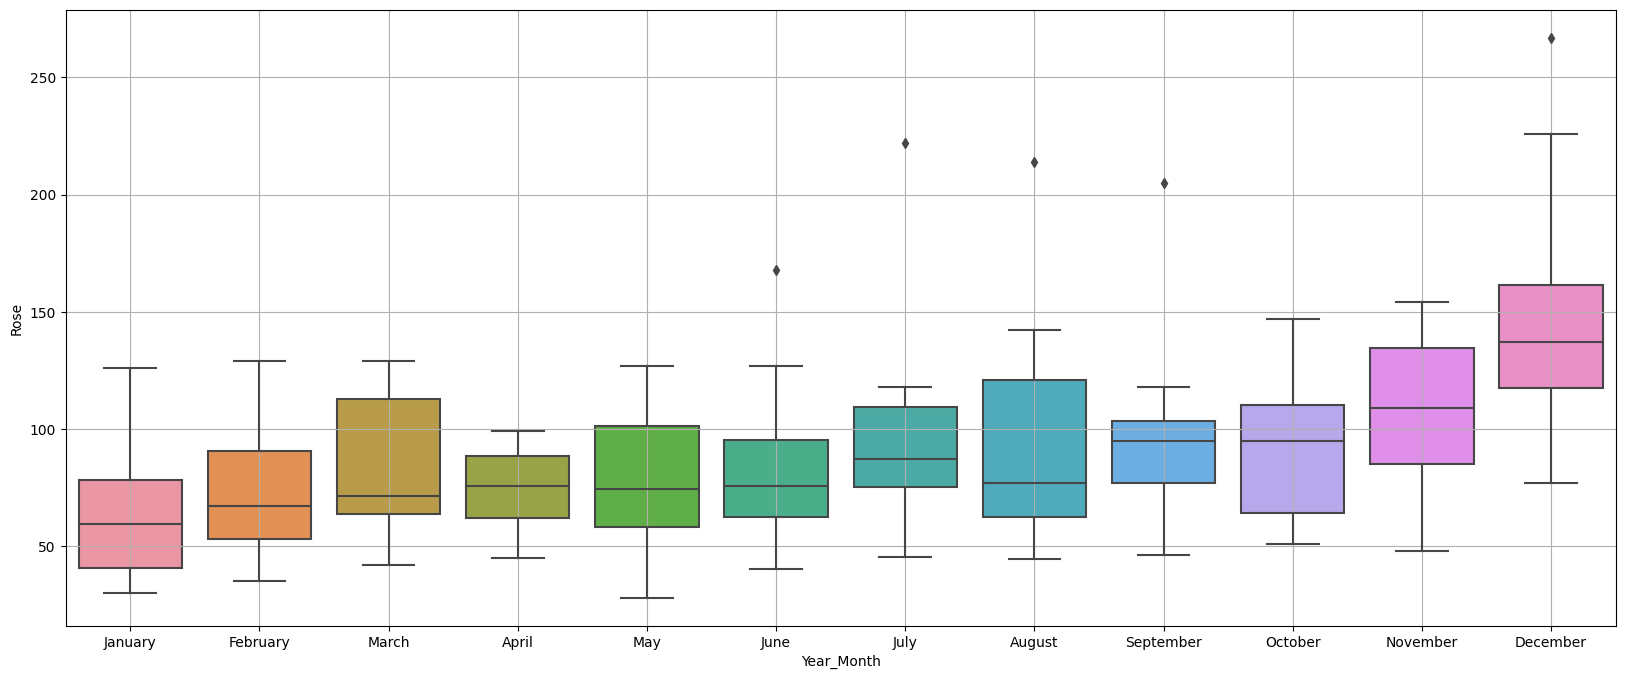

In [24]:
#Monthly boxplot
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

#### Time series month Plot to understand the spread of sales across different years and within different months across years.

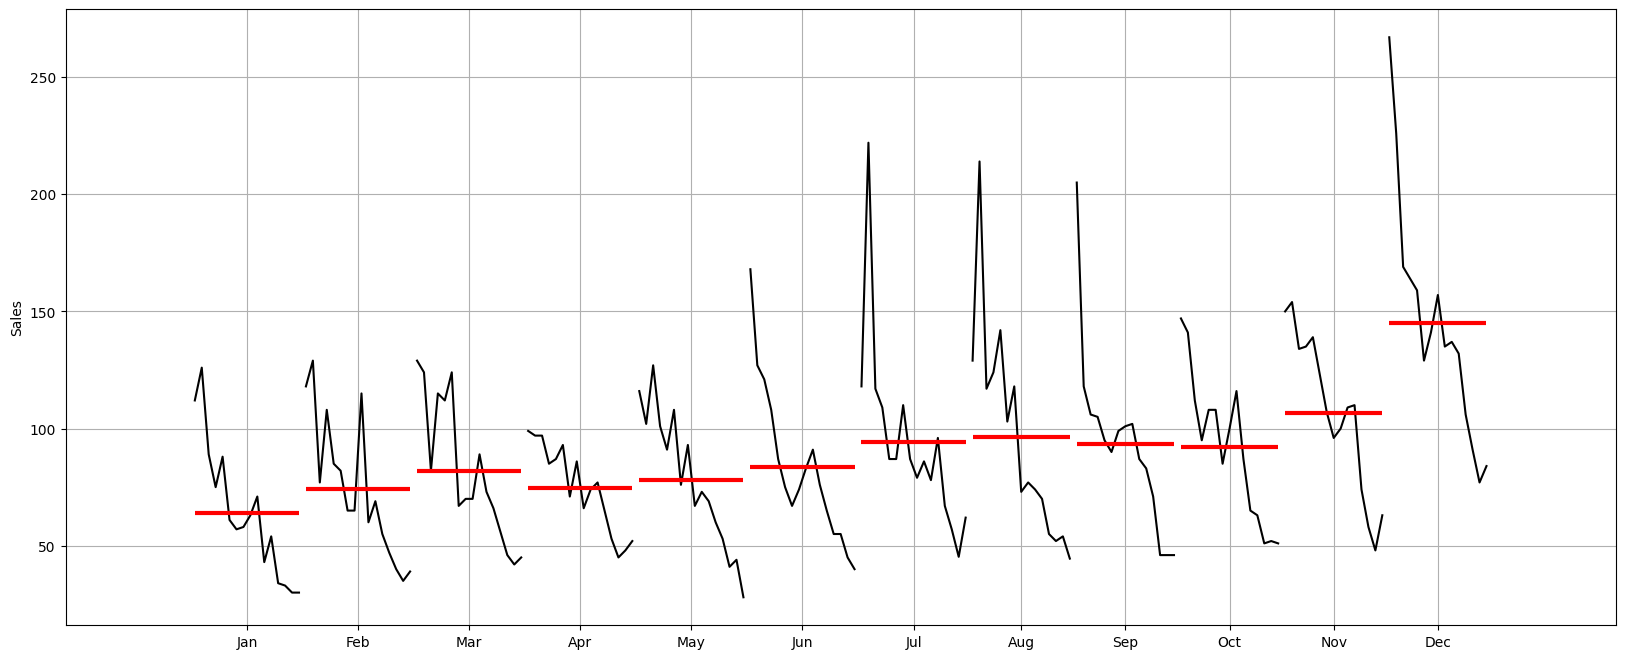

In [25]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Rose'],ylabel='Sales')
plt.grid();

**Insights**

- The Month Plot demonstrates a downward trend across all years for each month, indicating consistent seasonality throughout the months.
- Sales of Rose wine exhibit seasonality, with a significant increase from August to December, peaking in December due to the winter season and Christmas Holidays.
- There is a sharp drop in sales in January (post the holiday season), and stability can be seen in the mid-months (March to August).
- Outliers on the maximum side likely correspond to December sales, while outliers on the minimum side may belong to January.

#### Monthly Sales across years Plot

In [26]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Year_Month     1      2      3     4      5      6           7           8   \
Year_Month                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.270014   44.504928   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Year_Month     9      10     11     12  
Year_Month                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

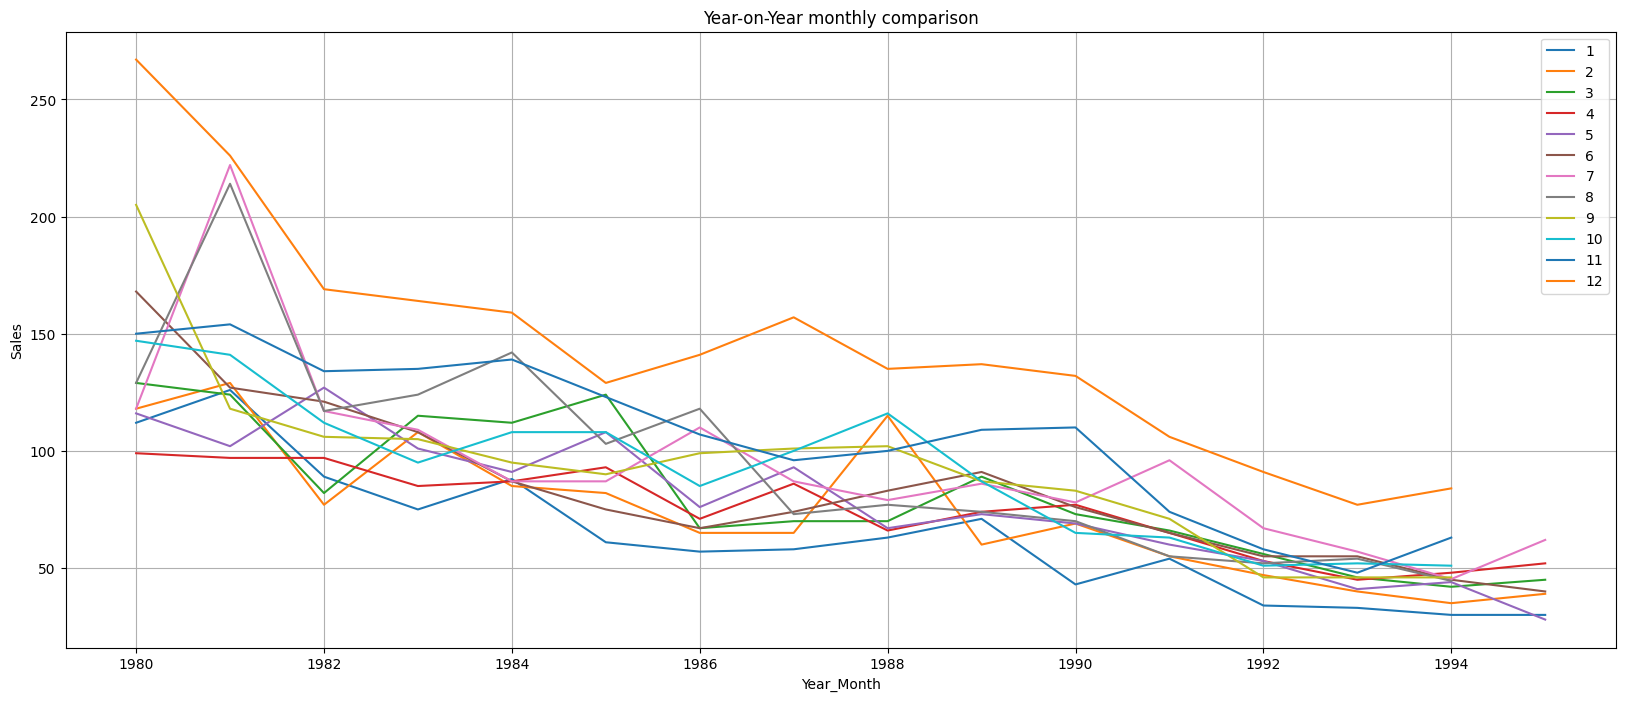

In [27]:
monthly_sales_across_years.plot(title = 'Year-on-Year monthly comparison', ylabel = 'Sales');
plt.grid()
plt.legend(loc='best');

 **Insights**

 - December consistently shows the highest sales across all the years, while January has the lowest sales for most years.

 - A noticeable downward trend can be observed across all months over the years.

 - The outliers in the monthly boxplot are likely from the years 1980 or 1981.

#### Empirical Cumulative Distribution Plot

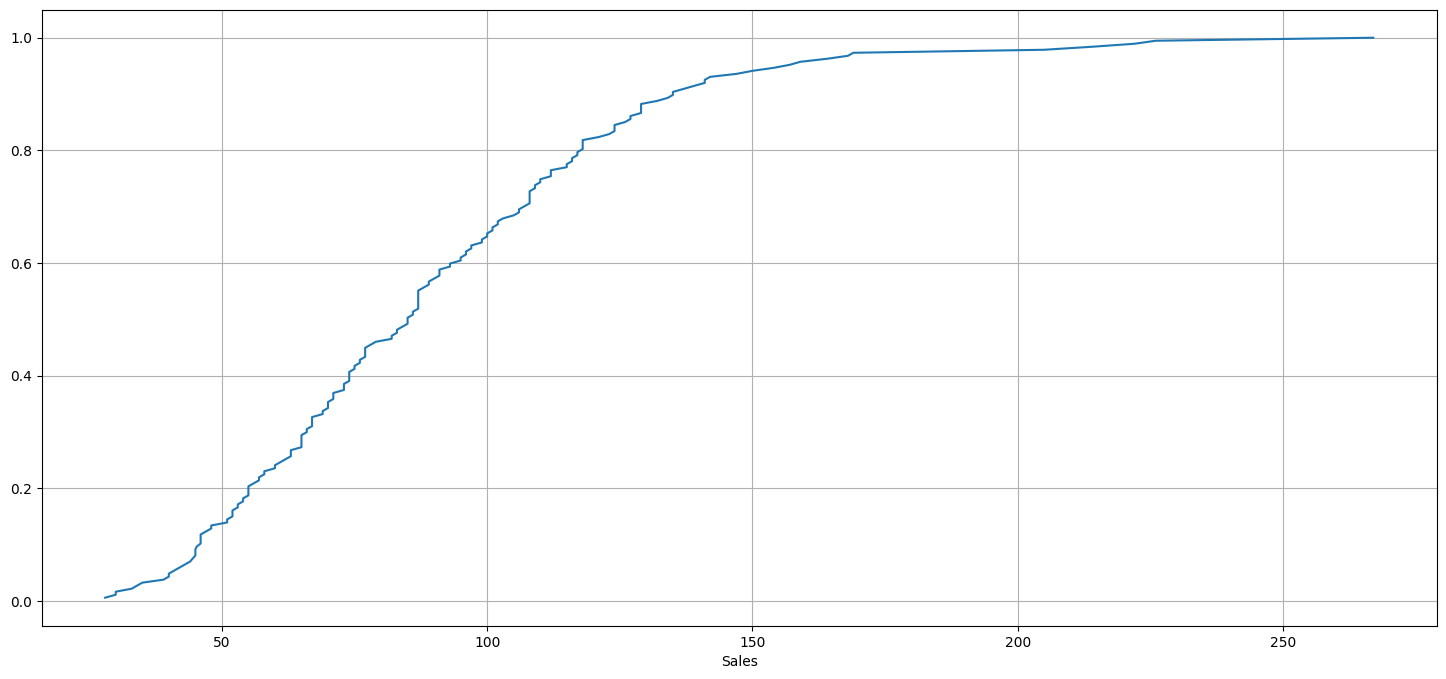

In [28]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

- **Insights**
  - This graph tells us what percentage of data points refer to what number of Sales.

#### Average Rose Sales per month and the month on month percentage change of Sales.

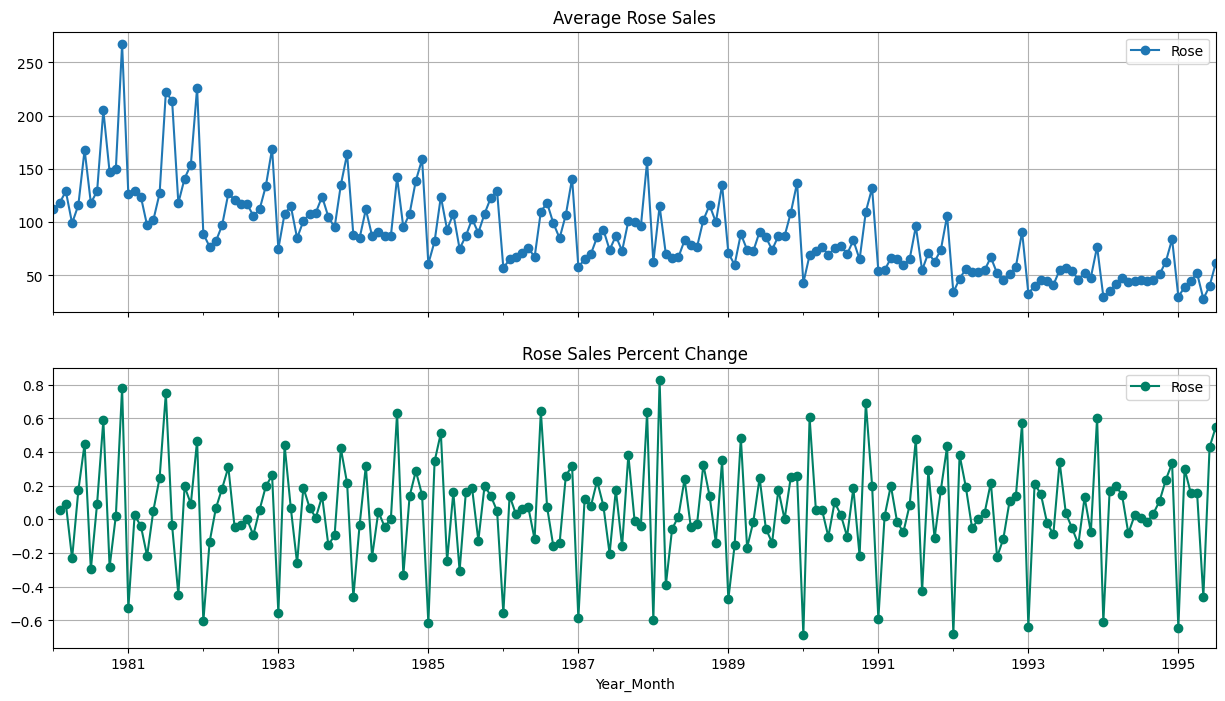

In [29]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

- **Insights**
  - The average sales are declining year-on-year. This is evident from the fact that the line graph is generally decreasing.
  There is a seasonal pattern in sales, with sales being highest in December.

#### Decompose the Time Series and plot the different components.

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

##### Additive Decomposition

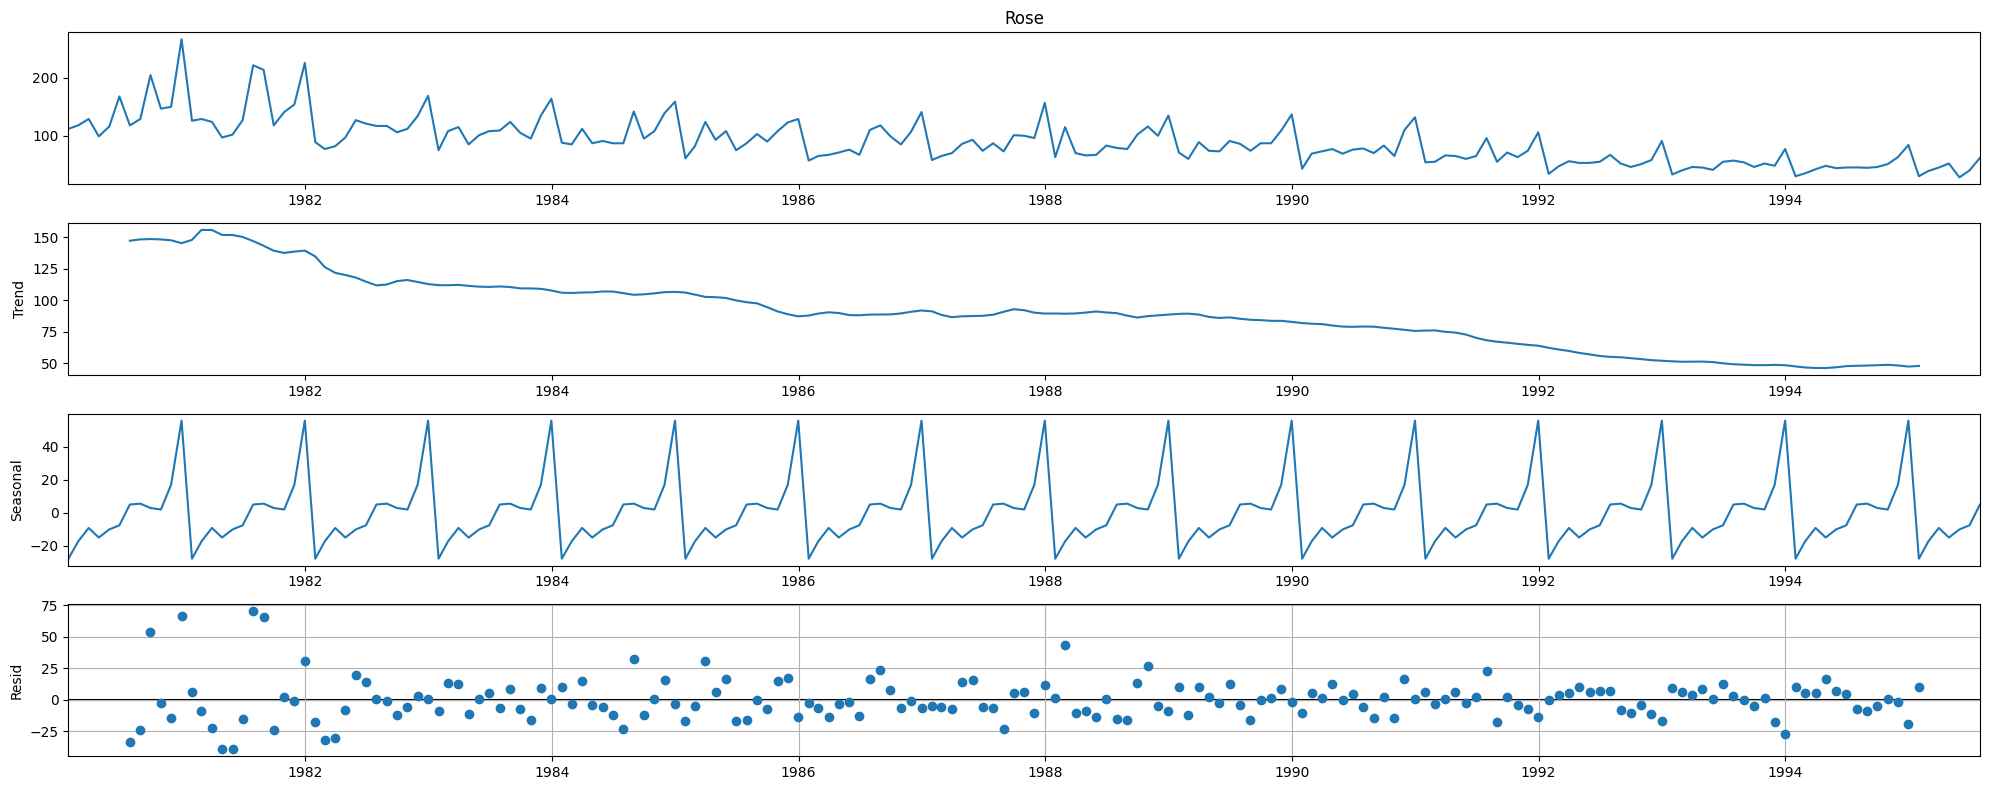

In [31]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot()
plt.grid();


Skewness = 1.26


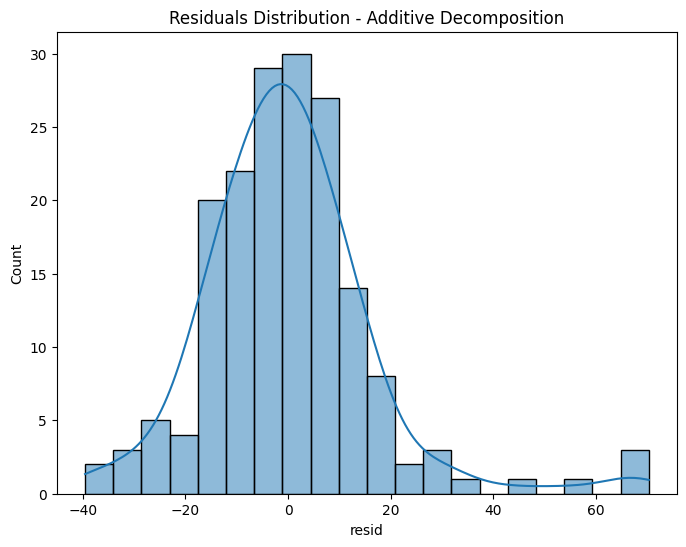

In [32]:
#Printing the values of decomposed time series
plt.figure(figsize = [8, 6])
plt.title('Residuals Distribution - Additive Decomposition')
sns.histplot(decomposition.resid, kde = True);
print('Skewness =', round(decomposition.resid.skew(), 2))

**Test for Normality**

We will use Shapiro Wilk Test for Normality.

Let's define the Null & alternate hypothesis:-


Ho: The residuals are normally distributed

Ha: The residuals are not normally distributed

In [33]:
import scipy.stats as stats


In [34]:
stats.shapiro(decomposition.resid.dropna())

ShapiroResult(statistic=0.9107761383056641, pvalue=7.984797711912961e-09)

p-value < 0.05

- We Reject the null hypothesis.

Hence Residuals are not normally distributed. The time series is not an additive time series.

##### Multiplicative Decomposition

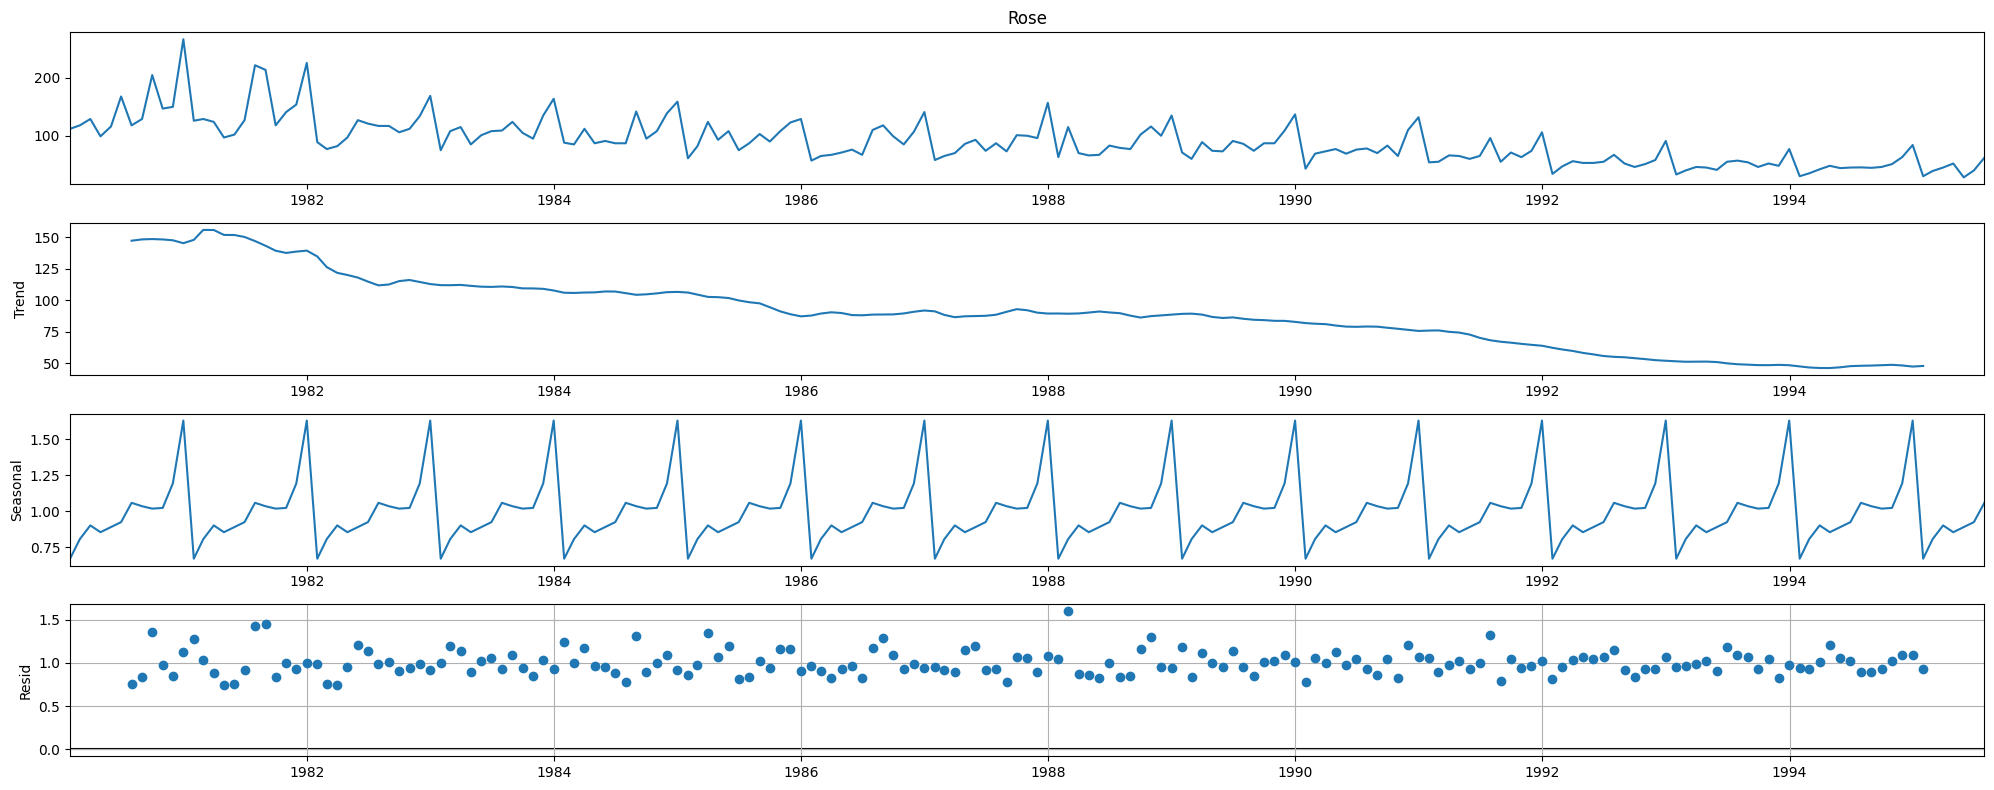

In [35]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot()
plt.grid();


Skewness = 0.99


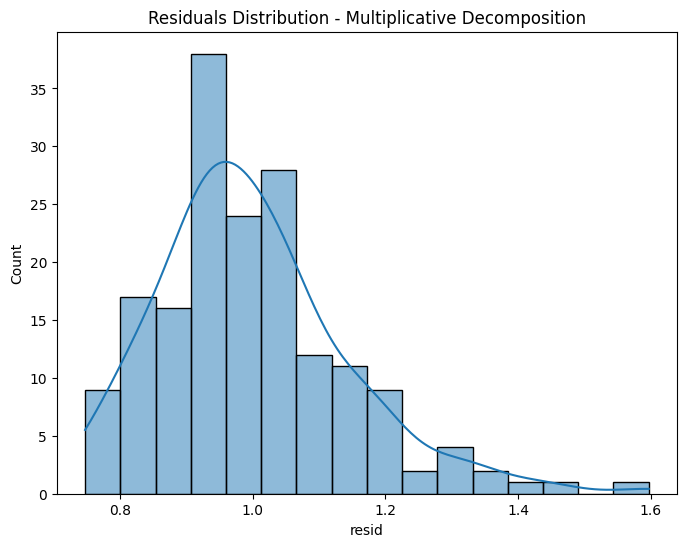

In [36]:
#Printing the values of decomposed time series
plt.figure(figsize = [8, 6])
plt.title('Residuals Distribution - Multiplicative Decomposition')
sns.histplot(decomposition.resid, kde = True);
print('Skewness =', round(decomposition.resid.skew(), 2))

**Test for Normality**

We will use Shapiro Wilk Test for Normality.

Let's define the Null & alternate hypothesis:-


Ho: The residuals are normally distributed

Ha: The residuals are not normally distributed

In [37]:
stats.shapiro(decomposition.resid.dropna())

ShapiroResult(statistic=0.9491005539894104, pvalue=6.26639530310058e-06)

p - value < 0.05
- At this p-value, We fail to reject the Null hypothesis
-  Residuals are not normally distributed. The time series is not multiplicative time series either

In [38]:
#Printing the values of decomposed time series
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Year_Month
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Year_Month
1980-01-31    0.670198
1980-02-29    0.806223
1980-03-31    0.901304
1980-04-30    0.854185
1980-05-31    0.889558
1980-06-30    0.924126
1980-07-31    1.058081
1980-08-31    1.034408
1980-09-30    1.017778
1980-10-31    1.022716
1980-11-30    1.192528
1980-12-31    1.628895
Name: seasonal, dtype: float64 

Residual 
 Year_Month
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758228
1980-08-31    0.841918
1980-09-30    1.357501
1980-10-31    0.970636
1980-11-30    0.853249
1980-12-31    1.129473
Name: resid, dtype:

- **Insights**

  - The time series shows a clear downward trend across the years, with a sharper dip observed after 1991 compared to before 1991.

 - Seasonality is present in the data, as sales pick up in the ending months of the year.

 - While the time series exhibits characteristics closer to a multiplicative nature, it cannot be definitively classified as either an additive or multiplicative time series

## **3. Split the data into training and test. The test data should start in 1991.**

In [39]:
#Train - Test Split
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [209]:
## Display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data.   ')
display(train.tail())
print('First few rows of Test Data.  ')
display(test.head())
print('Last few rows of Test Data.  ')
display(test.tail())

First few rows of Training Data


Rose
Year_Month       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data.   


Rose
Year_Month       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data.  


Rose
Year_Month      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data.  


Rose
Year_Month      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [41]:
#Printing the dimentions of the data after split
print('Dimentions of Original Dataset:' ,df.shape)
print('Dimentions of Training data:', train.shape)
print('Dimentions of Training data:', test.shape)

Dimentions of Original Dataset: (187, 1)
Dimentions of Training data: (132, 1)
Dimentions of Training data: (55, 1)


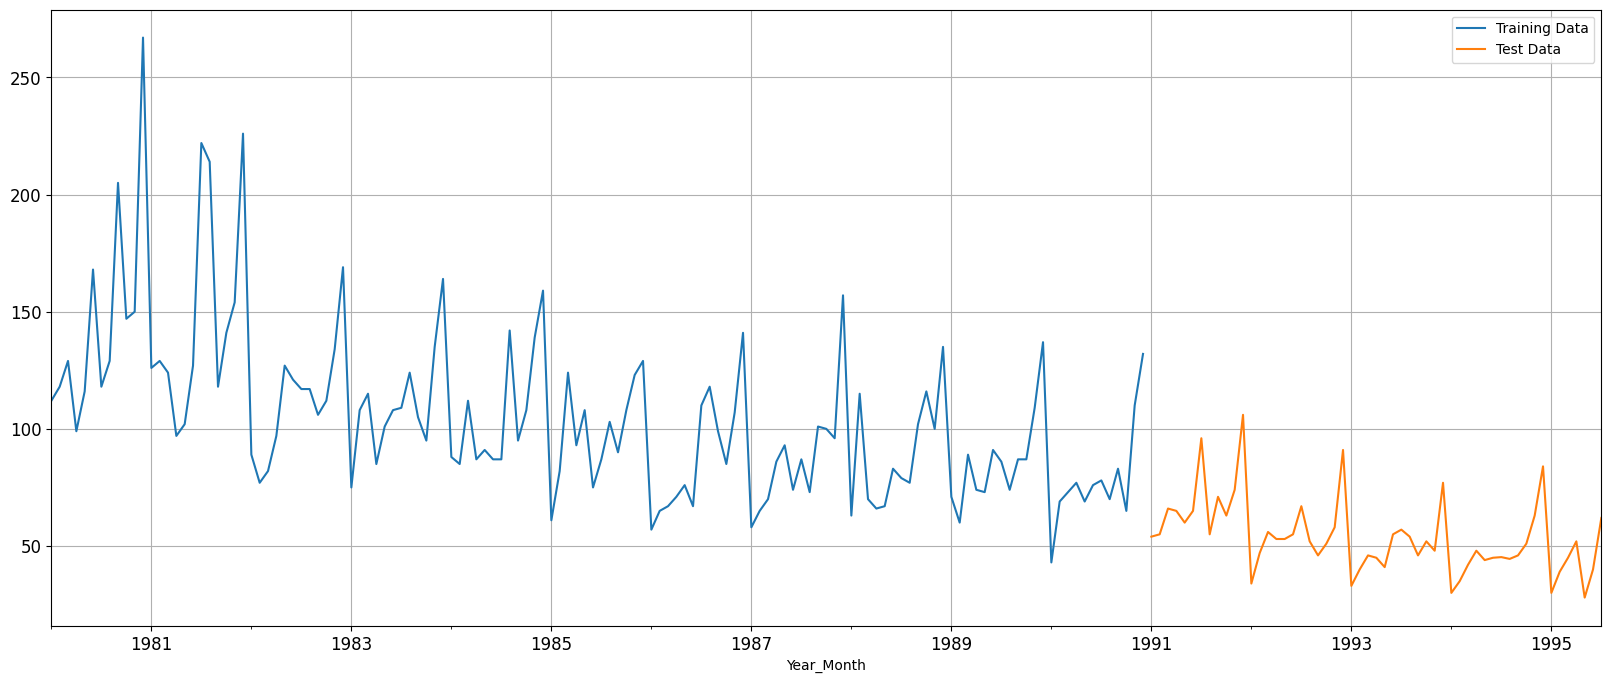

In [42]:
#Plotting the Train Test Split
train['Rose'].plot(fontsize=12)
test['Rose'].plot(fontsize=12)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()


## **4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE.**


#### Building different models and comparing the accuracy metrics.

###Linear Regression

**For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.**


In [43]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


- We have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.



In [44]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()


In [45]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())


First few rows of Training Data


Rose  time
Year_Month             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5

Last few rows of Training Data


Rose  time
Year_Month             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132

First few rows of Test Data


Rose  time
Year_Month            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137

Last few rows of Test Data


Rose  time
Year_Month            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187

- Our training and test data has been modified. let's use **LinearRegression** to build the model on the training data and test the model on the test data.



In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()


In [48]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])


LinearRegression()

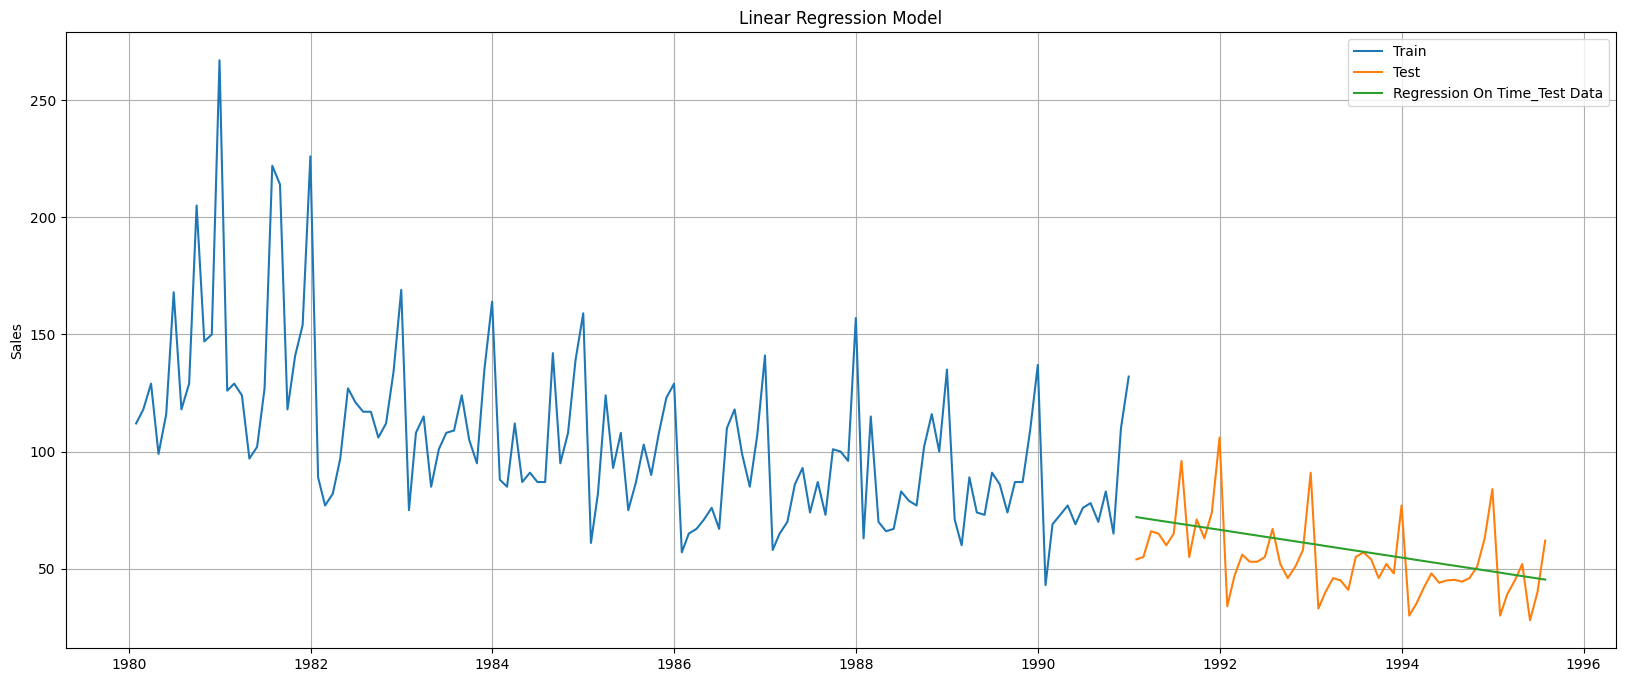

In [49]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.ylabel('Sales')
plt.grid();


In [50]:
# Calculate the RMSE for the training data
rmse_model1_train = mean_squared_error(LinearRegression_train['Rose'], train_predictions_model1, squared=False)

train_rmse = pd.DataFrame({'Train_RMSE': [round(rmse_model1_train, 2)]}, index=['Linear Regression On Time'])
train_rmse



Train_RMSE
Linear Regression On Time       30.72

In [51]:
from sklearn import metrics

#### Model Evaluation

In [52]:
#Calculating MAPE

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
mape_LinearRegression = MAPE(test['Rose'], LinearRegression_test['RegOnTime'])
print('MAPE =', round(mape_LinearRegression, 2))

MAPE = 25.01


In [53]:
#Calculating RMSE
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))


For RegressionOnTime forecast on the Test Data,  RMSE is 15.277 


In [54]:
#Creating a table to store RMSE & MAPE

resultsDf = pd.DataFrame({'Test_RMSE': round(rmse_model1_test, 2), 'MAPE': round(mape_LinearRegression, 2)}, index = ['Linear Regression On Time'])
resultsDf

Test_RMSE   MAPE
Linear Regression On Time      15.28  25.01

**Insights:**
- Linear regression captures the downward trend but not the seasonality.

- Test RMSE is 15.28, MAPE is 25.01 for Linear Regression, indicating difficulty in handling seasonality.


### Naive Approach:
**The Naive model predicts tomorrow's value based on today's observation, and the day after tomorrow's prediction is also the same as today's value.**

In [55]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [56]:
print("\n Last 5 values of Train data:\n", train.tail())
print("\n Last 5 values of Test data:\n",test.tail())


 Last 5 values of Train data:
              Rose
Year_Month       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

 Last 5 values of Test data:
             Rose
Year_Month      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0


In [57]:
NaiveModel_train['naive'] = train['Rose'].iloc[-1]
NaiveModel_train['naive'].head()

Year_Month
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [58]:
NaiveModel_test['naive'] = train['Rose'].iloc[-1]
NaiveModel_test['naive'].head()

Year_Month
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

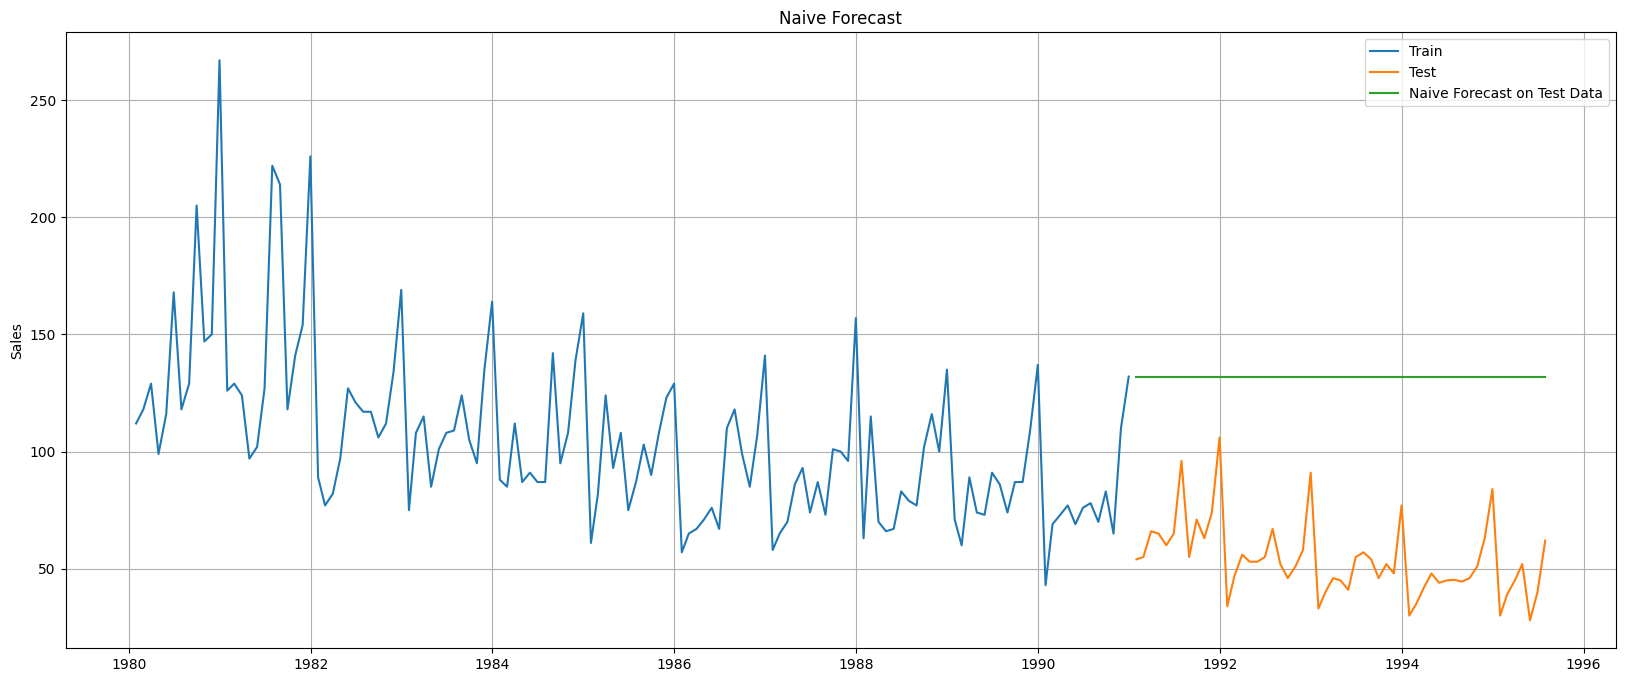

In [59]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title('Naive Forecast')
plt.ylabel('Sales')
plt.grid();


In [60]:
# Calculate the RMSE for the training data
rmse_naive_train = mean_squared_error(NaiveModel_train['Rose'], NaiveModel_train['naive'], squared=False)


In [61]:
train_rmse1 = pd.DataFrame({'Train_RMSE': [round(rmse_naive_train, 2)]}, index=['NaiveModel'])

train_rmse = pd.concat([train_rmse, train_rmse1])
train_rmse

Train_RMSE
Linear Regression On Time       30.72
NaiveModel                      45.06

#### Model Evaluation


In [62]:
#Calculating MAPE
mape_naive = MAPE(NaiveModel_test['Rose'], NaiveModel_test['naive'])
print('MAPE Naive =', round(mape_naive, 2))

MAPE Naive = 164.99


In [63]:
rmse_naive = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive))


For RegressionOnTime forecast on the Test Data,  RMSE is 79.743


In [64]:
resultsDf_2 = pd.DataFrame({'Test_RMSE': round(rmse_naive, 2), 'MAPE': round(mape_naive, 2)}, index = ['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time      15.28   25.01
NaiveModel                     79.74  164.99

**Insights:**
- Naive approach ignores trend and seasonality as it forecasts the last observed value
- Test RMSE is 79.74, MAPE is 164.99 for Naive forecast, showing significant errors due to the lack of trend and seasonality capture.

### Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [65]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()


In [66]:
SimpleAverage_train['simpleAvg'] = train['Rose'].mean()
SimpleAverage_train.head()

Rose   simpleAvg
Year_Month                   
1980-01-31  112.0  104.939394
1980-02-29  118.0  104.939394
1980-03-31  129.0  104.939394
1980-04-30   99.0  104.939394
1980-05-31  116.0  104.939394

In [67]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()


Rose  mean_forecast
Year_Month                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

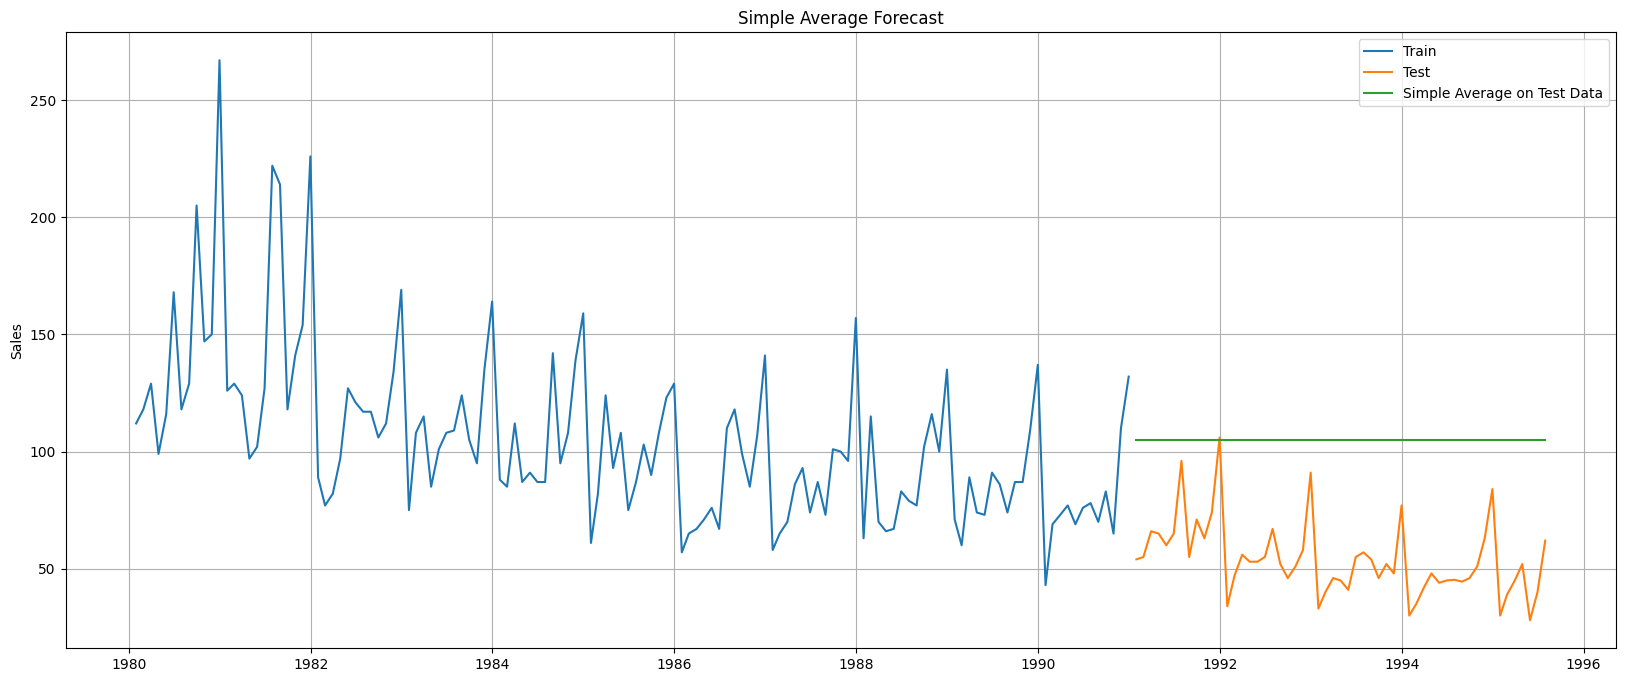

In [68]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.ylabel('Sales')
plt.grid();


In [69]:
# Calculate the RMSE for the training data
rmse_sa_train = mean_squared_error(SimpleAverage_train['Rose'], SimpleAverage_train['simpleAvg'], squared=False)
rmse_sa_train

36.034234054231185

In [70]:
train_rmse2 = pd.DataFrame({'Train_RMSE': [round(rmse_sa_train, 2)]}, index=['Simple Average Model'])

train_rmse = pd.concat([train_rmse, train_rmse2])
train_rmse

Train_RMSE
Linear Regression On Time       30.72
NaiveModel                      45.06
Simple Average Model            36.03

####Model Evaluation


In [71]:
#Calculating MAPE
mape_savg = MAPE(SimpleAverage_test['Rose'], SimpleAverage_test['mean_forecast'])
print('MAPE =', round(mape_savg, 2))

MAPE = 110.7


In [72]:
rmse_savg = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_savg))


For Simple Average forecast on the Test Data,  RMSE is 53.485


In [73]:
resultsDf_3 = pd.DataFrame({'Test_RMSE': round(rmse_savg, 2), 'MAPE': round(mape_savg, 2)}, index = ['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time      15.28   25.01
NaiveModel                     79.74  164.99
Simple Average Model           53.49  110.70

**Insights**
- Simple Average Model forecasts the mean of the training data. It ignores both the trend and seasonality.
- Test RMSE is 53.49, MAPE is 110.76. Errors are significant due to the lack of trend and seasonality capture.
- Performs better than Naïve, however, is not good enough for predictions  



### Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [74]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Year_Month       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Trailing moving averages

In [75]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

round(MovingAverage.head(10),2)


Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Year_Month                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00      123.67         NaN
1980-07-31  118.0       143.0      125.25      124.67         NaN
1980-08-31  129.0       123.5      132.75      126.50         NaN
1980-09-30  205.0       167.0      155.00      139.17      132.67
1980-10-31  147.0       176.0      149.75      147.17      136.56

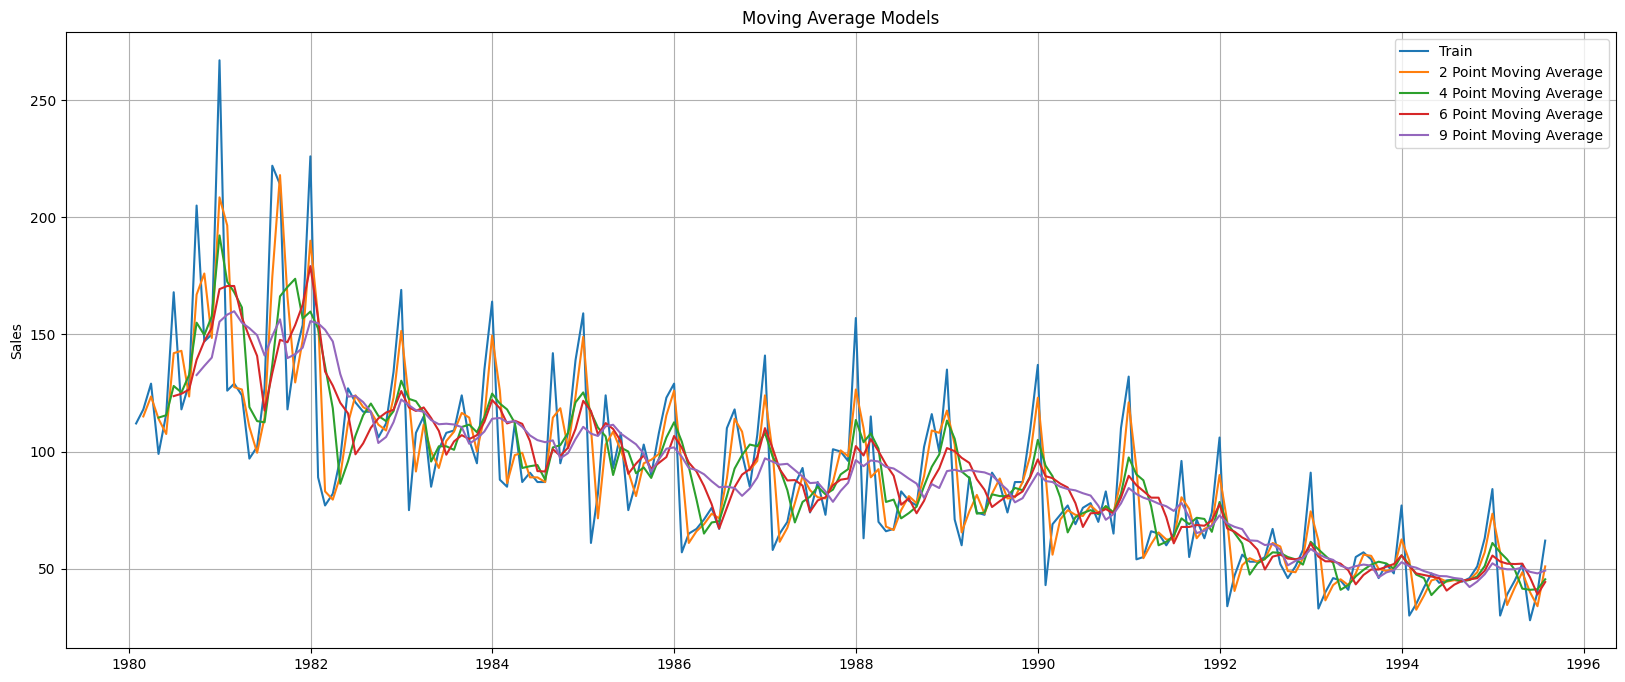

In [76]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Moving Average Models')
plt.grid();



Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.



In [77]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]


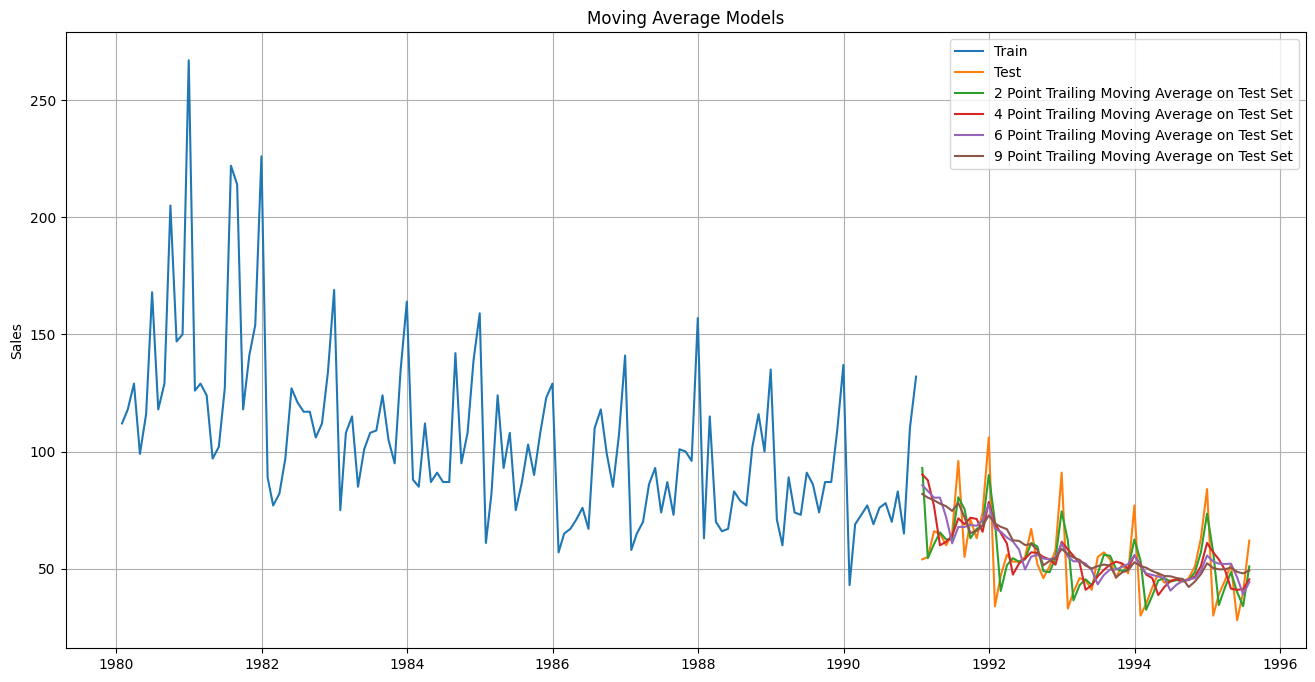

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Moving Average Models')
plt.grid();


In [79]:
# Calculate the RMSE for the training data

#We will first drop NA values in the trailing avg to calculate train RMSE
trailing_MovingAverage_train = trailing_MovingAverage_train.dropna()

# Calculate the RMSE for the training data for 2 point Trailing MA
rmse_mavg2_train = mean_squared_error(trailing_MovingAverage_train['Rose'], trailing_MovingAverage_train['Trailing_2'], squared=False)
print("For 2 point Moving Average \nRMSE =", round(rmse_mavg2_train, 2))

# Calculate the RMSE for the training data for 4 point Trailing MA
rmse_mavg4_train = mean_squared_error(trailing_MovingAverage_train['Rose'], trailing_MovingAverage_train['Trailing_4'], squared=False)
print("\nFor 4 point Moving Average \nRMSE =", round(rmse_mavg4_train, 2))

# Calculate the RMSE for the training data for 6 point Trailing MA
rmse_mavg6_train = mean_squared_error(trailing_MovingAverage_train['Rose'], trailing_MovingAverage_train['Trailing_6'], squared=False)
print("\nFor 6 point Moving Average \nRMSE =", round(rmse_mavg6_train, 2))

# Calculate the RMSE for the training data for 9 point Trailing MA
rmse_mavg9_train = mean_squared_error(trailing_MovingAverage_train['Rose'], trailing_MovingAverage_train['Trailing_9'], squared=False)
print("\nFor 9 point Moving Average \nRMSE =", round(rmse_mavg9_train, 2))


For 2 point Moving Average 
RMSE = 19.67

For 4 point Moving Average 
RMSE = 26.2

For 6 point Moving Average 
RMSE = 28.52

For 9 point Moving Average 
RMSE = 30.23


- The 2-point Trailing Moving Average model is selected as it has the least errors (RMSE) among all the moving average train sets

In [80]:
train_rmse4 = pd.DataFrame({'Train_RMSE': [round(rmse_mavg2_train, 2)]}, index=['2 point Trailing Moving Average'])

train_rmse = pd.concat([train_rmse, train_rmse4])
train_rmse

Train_RMSE
Linear Regression On Time             30.72
NaiveModel                            45.06
Simple Average Model                  36.03
2 point Trailing Moving Average       19.67

#### Model Evaluation

In [81]:
## Test Data - RMSE & MAPE --> 2 point Trailing MA

rmse_mavg2 = mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_2'], squared = False)
mape_mavg2 = MAPE(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average \nRMSE =", round(rmse_mavg2, 2), "| MAPE =", round(mape_mavg2, 2))

## Test Data - RMSE & MAPE --> 4 point Trailing MA

rmse_mavg4 = mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_4'], squared = False)
mape_mavg4 = MAPE(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_4'])
print("\nFor 4 point Moving Average \nRMSE =", round(rmse_mavg4, 2), "| MAPE =", round(mape_mavg4, 2))

## Test Data - RMSE & MAPE --> 6 point Trailing MA

rmse_mavg6 = mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_6'], squared = False)
mape_mavg6 = MAPE(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_6'])
print("\nFor 6 point Moving Average \nRMSE =", round(rmse_mavg6, 2), "| MAPE =", round(mape_mavg6, 2))

## Test Data - RMSE & MAPE --> 9 point Trailing MA

rmse_mavg9 = mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_9'], squared = False)
mape_mavg6 = MAPE(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_9'])
print("\nFor 9 point Moving Average \nRMSE =", round(rmse_mavg9, 2), "| MAPE =", round(mape_mavg6, 2))



For 2 point Moving Average 
RMSE = 11.53 | MAPE = 15.73

For 4 point Moving Average 
RMSE = 14.46 | MAPE = 21.28

For 6 point Moving Average 
RMSE = 14.57 | MAPE = 22.34

For 9 point Moving Average 
RMSE = 14.73 | MAPE = 22.69


- The 2-point Trailing Moving Average model is selected as it has the least errors (RMSE & MAPE) among all the moving average models evaluated.

In [82]:


resultsDf_4 = pd.DataFrame({'Test_RMSE': round(rmse_mavg2, 2), 'MAPE': round(mape_mavg2, 2)}, index = ['2 point Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time            15.28   25.01
NaiveModel                           79.74  164.99
Simple Average Model                 53.49  110.70
2 point Trailing Moving Average      11.53   15.73

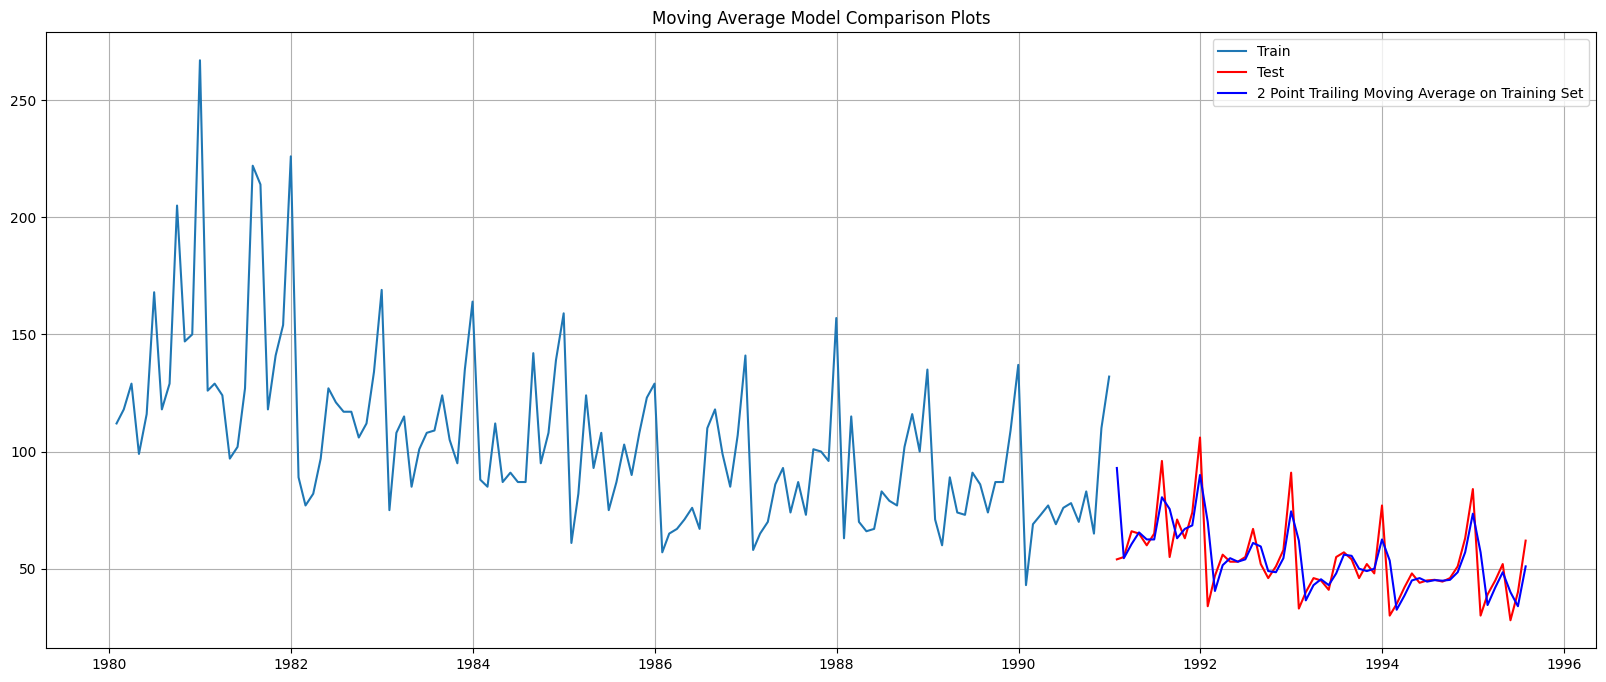

In [83]:
## Plotting on both Training and Test data for 2 points trailing moving average

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test', color= 'r')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set', color='b')
plt.legend(loc='best')
plt.title("Moving Average Model Comparison Plots")
plt.grid();


**Insights**

- For the moving average models, here are the insights based on their RMSE and MAPE values:

- 2-Point Moving Average: RMSE = 19.67, Test RMSE = 11.53, Test MAPE = 15.73. It performs relatively well in capturing the trend and seasonality but still has room for improvement as it struggles to capture the sharp fluctuations in the sales pattern over time.

- 4-Point Moving Average: RMSE = 26.2, Test RMSE = 14.46, Test MAPE = 21.28. It performs slightly worse than the 2-Point model but still shows better accuracy than simpler models like the Simple Average.

- 6-Point Moving Average: RMSE = 28.52, Test RMSE = 14.57, Test MAPE = 22.34. It did not perform reasonably well and is not as accurate as the 2-Point or 4-Point models.

- 9-Point Moving Average: RMSE = 30.23, Test RMSE = 14.73, Test MAPE = 22.69. It is again not as good as the 2-Point model.

Overall, the 2-Point Moving Average model stands out as the best-performing model so far among all with the lowest Test RMSE and Test MAPE values.

However, there is still room for improvement in all the models to better capture the trend and seasonality and reduce errors in the forecasts.


###Let's build the **Exponential Smoothening Models** & Evaluate them

### **Exponential Smoothing methods**

###Simple Exponential Smoothing : ETS(A, N, N)

- This method is suitable for forecasting data with no clear trend or seasonal pattern.

- Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

##### SES: Auto Fill Method

In [84]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [85]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)


In [86]:
SES_train_predict = model_SES_autofit.fittedvalues


In [87]:
## Let us check the parameters

model_SES_autofit.params


{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict


1991-01-31    87.10498
1991-02-28    87.10498
1991-03-31    87.10498
1991-04-30    87.10498
1991-05-31    87.10498
1991-06-30    87.10498
1991-07-31    87.10498
1991-08-31    87.10498
1991-09-30    87.10498
1991-10-31    87.10498
1991-11-30    87.10498
1991-12-31    87.10498
1992-01-31    87.10498
1992-02-29    87.10498
1992-03-31    87.10498
1992-04-30    87.10498
1992-05-31    87.10498
1992-06-30    87.10498
1992-07-31    87.10498
1992-08-31    87.10498
1992-09-30    87.10498
1992-10-31    87.10498
1992-11-30    87.10498
1992-12-31    87.10498
1993-01-31    87.10498
1993-02-28    87.10498
1993-03-31    87.10498
1993-04-30    87.10498
1993-05-31    87.10498
1993-06-30    87.10498
1993-07-31    87.10498
1993-08-31    87.10498
1993-09-30    87.10498
1993-10-31    87.10498
1993-11-30    87.10498
1993-12-31    87.10498
1994-01-31    87.10498
1994-02-28    87.10498
1994-03-31    87.10498
1994-04-30    87.10498
1994-05-31    87.10498
1994-06-30    87.10498
1994-07-31    87.10498
1994-08-31 

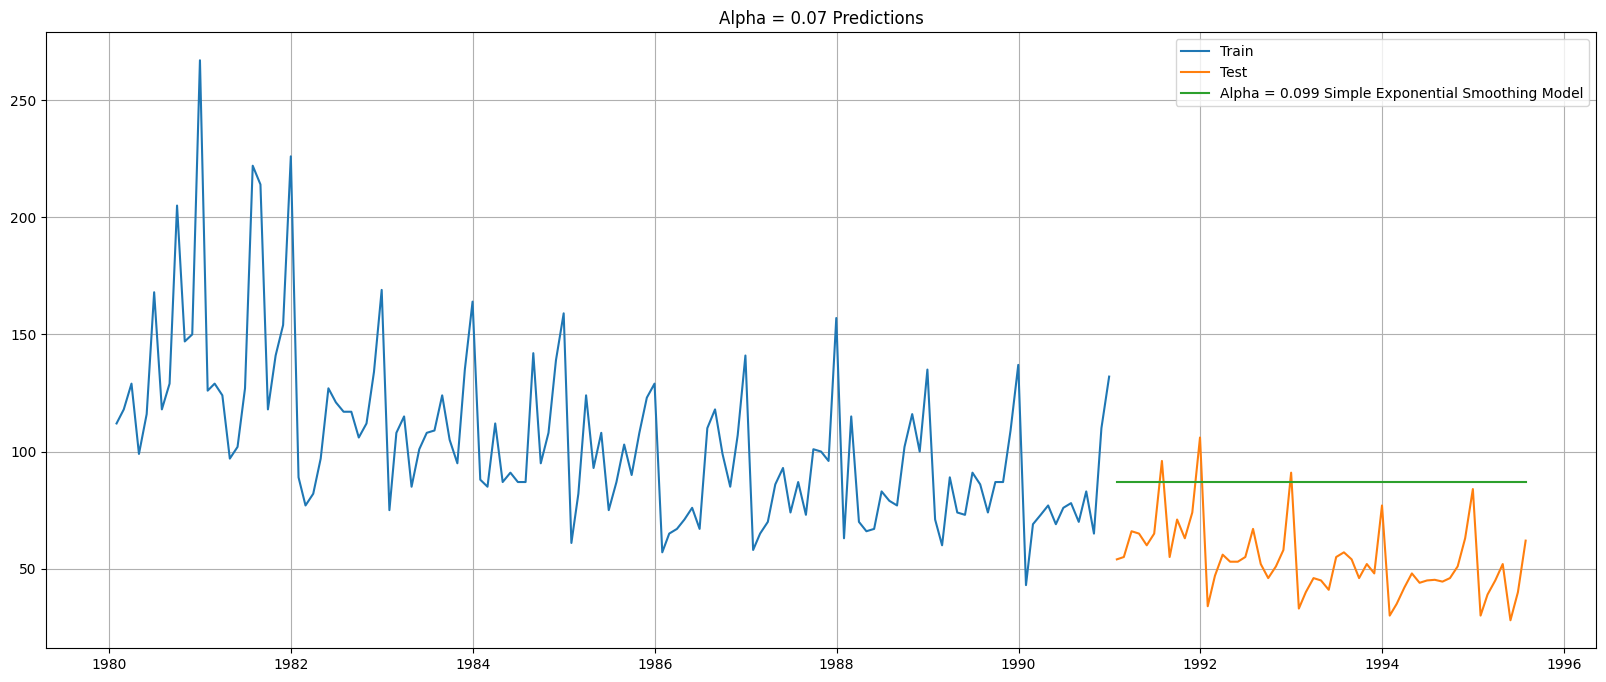

In [89]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.099 Simple Exponential Smoothing Model')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');


In [90]:
# Calculate the RMSE for the training data

rmse_sesa_train = mean_squared_error(train, SES_train_predict, squared=False)
rmse_sesa_train

31.500868551724334

In [91]:

train_rmse5 = pd.DataFrame({'Train_RMSE': [round(rmse_sesa_train, 2)]}, index=['Alpha = 0.099 Simple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse5])
train_rmse

Train_RMSE
Linear Regression On Time                        30.72
NaiveModel                                       45.06
Simple Average Model                             36.03
2 point Trailing Moving Average                  19.67
Alpha = 0.099 Simple Exponential Smoothing       31.50

#### Model Evaluation

In [92]:
## MAPE
mape_ses_auto = MAPE(test.values, SES_predict.values)
print('Exponential Smoothing MAPE =', round(mape_ses_auto, 2))

Exponential Smoothing MAPE = 76.0


In [93]:
#RMSE
rmse_ses_auto = mean_squared_error(test.values, SES_predict.values, squared = False)
print('Simple Exponential Smoothing RMSE =', round(rmse_ses_auto, 2))

Simple Exponential Smoothing RMSE = 36.82


In [94]:
resultsDf_4 = pd.DataFrame({'Test_RMSE': round(rmse_ses_auto, 2), 'MAPE': round(mape_ses_auto, 2)}, index = ['Alpha = 0.099 Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                       15.28   25.01
NaiveModel                                      79.74  164.99
Simple Average Model                            53.49  110.70
2 point Trailing Moving Average                 11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing      36.82   76.00

**Insights:**
- The Autofill Simple exponential smoothing model provides one-step-ahead forecast. It ignores both the trend and seasonality in the data.

- Test RMSE is 36.82 and MAPE is 53.88, indicating poor performance in capturing underlying patterns.

- The low smoothing parameter (0.099) implies a heavy reliance on past averages. This makes it less accurate compared to more sophisticated methods.

##### SES Brute Force Method



In [95]:
custom_SES = pd.DataFrame(columns = ['Alpha', 'Train RMSE', 'Test RMSE'])
SES_train = train.copy()
SES_test = test.copy()

In [96]:
for i in np.arange(0.01, 1, 0.01):
    SES_alpha_i = SimpleExpSmoothing(train, initialization_method = 'estimated').fit(smoothing_level = i, optimized = False, use_brute = True)
    SES_train['predict', i] = SES_alpha_i.fittedvalues
    SES_test['predict', i] = SES_alpha_i.forecast(len(test))

    rmse_SES_train = mean_squared_error(train, SES_train['predict', i], squared = False)
    rmse_SES_test = mean_squared_error(test, SES_test['predict', i], squared = False)

    custom_SES = custom_SES.append({'Alpha': i,'Train RMSE': rmse_SES_train, 'Test RMSE': rmse_SES_test}, ignore_index = True)

custom_SES.sort_values(by = 'Test RMSE').head()

Alpha  Train RMSE  Test RMSE
6   0.07   32.649443  36.460430
7   0.08   32.477045  36.488207
5   0.06   32.880735  36.602736
8   0.09   32.348486  36.629498
9   0.10   32.253385  36.853442

In [97]:
best_alpha = custom_SES.sort_values(by='Test RMSE').head(1)['Alpha'].values[0]
print("Best Alpha for Simple Exponential Smoothing:", best_alpha)


Best Alpha for Simple Exponential Smoothing: 0.06999999999999999


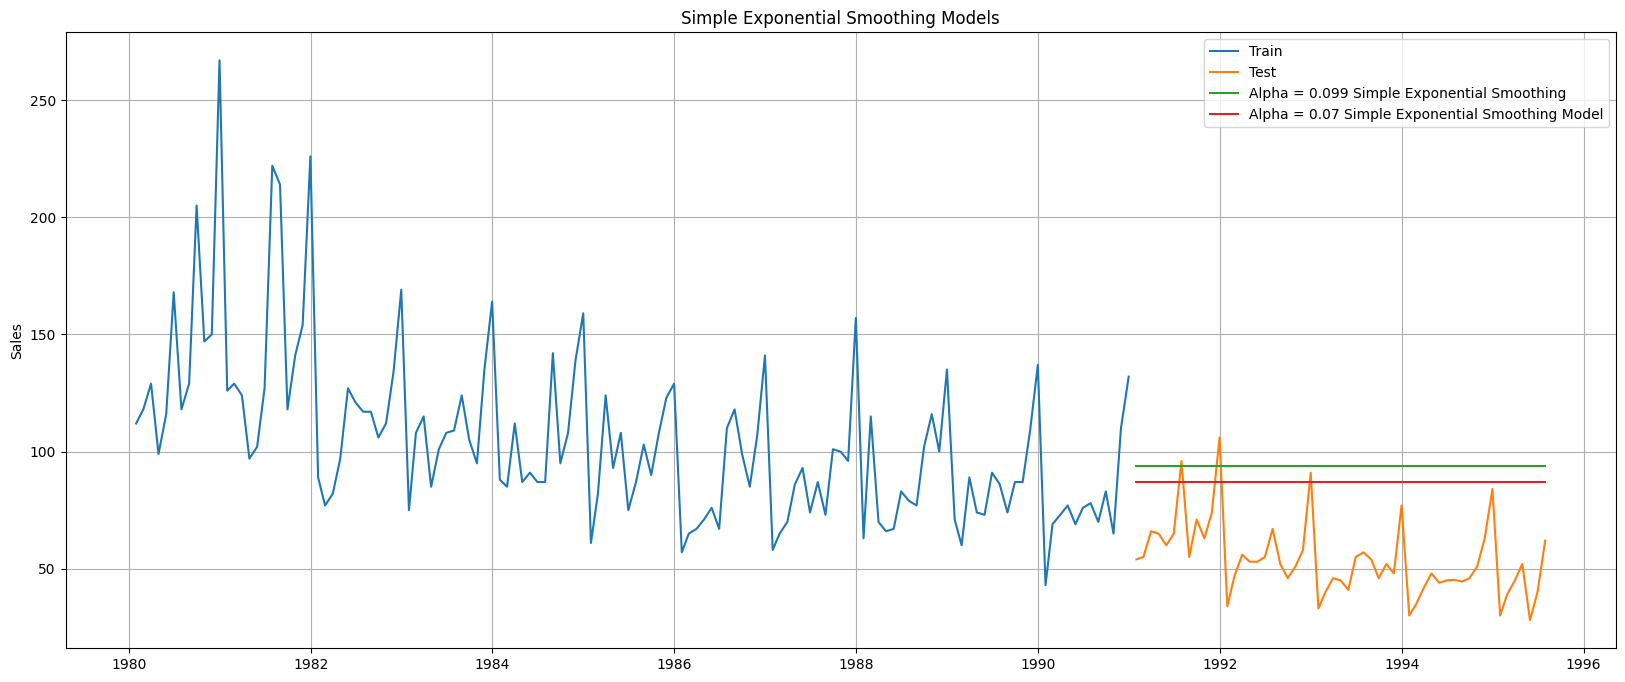

In [98]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(SES_test['predict', 0.02], label = 'Alpha = 0.099 Simple Exponential Smoothing')
plt.plot(SES_predict, label='Alpha = 0.07 Simple Exponential Smoothing Model')

plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Simple Exponential Smoothing Models');

In [99]:
# Calculate the RMSE for the training data
# Since best RMSE table printed above on train data: Let's print against alpha= 0.02

rmse_sesbf_train = custom_SES.sort_values(by='Test RMSE').head(1)['Train RMSE'].values.item()
rmse_sesbf_train

32.64944279752735

In [100]:

train_rmse5 = pd.DataFrame({'Train_RMSE': [round(rmse_sesbf_train, 2)]}, index=['Alpha = 0.07 Simple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse5])
train_rmse

Train_RMSE
Linear Regression On Time                        30.72
NaiveModel                                       45.06
Simple Average Model                             36.03
2 point Trailing Moving Average                  19.67
Alpha = 0.099 Simple Exponential Smoothing       31.50
Alpha = 0.07 Simple Exponential Smoothing        32.65

#### Model Evaluation

In [101]:
#MAPE
mape_ses_tuned = MAPE(test.values, SES_test['predict', 0.02].values)
print('MAPE =', round(mape_ses_tuned, 2))

MAPE = 88.74


In [102]:
#RMSE
rmse_ses_tuned = custom_SES.sort_values(by = 'Test RMSE').values[0][2]
print('RMSE =', round(rmse_ses_tuned, 2))

RMSE = 36.46


In [103]:
resultsDf5 = pd.DataFrame({'Test_RMSE': round(rmse_ses_tuned, 2), 'MAPE': round(mape_ses_tuned, 2)}, index = ['Alpha = 0.07 Simple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf5])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                       15.28   25.01
NaiveModel                                      79.74  164.99
Simple Average Model                            53.49  110.70
2 point Trailing Moving Average                 11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing      36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing       36.46   88.74

**Insights**
- The simple exponential smoothing model generates one-step-ahead forecasts, overlooking both trend and seasonality in the time series.
- The model exhibits a Root Mean Square Error of 36.46 and a Mean Absolute Percentage Error of 88.74 , signifying its inability to effectively capture the underlying trend and seasonal patterns.



### Double Exponential Smoothing

- Applicable when data has Trend but no seasonality.


##### DES: Autofit Model

In [104]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters ')
print('\n')
print(model_DES.params)



Holt model Exponential Smoothing Estimated Parameters 


{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [105]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict


1991-01-31    72.068983
1991-02-28    71.574632
1991-03-31    71.080281
1991-04-30    70.585930
1991-05-31    70.091580
1991-06-30    69.597229
1991-07-31    69.102878
1991-08-31    68.608528
1991-09-30    68.114177
1991-10-31    67.619826
1991-11-30    67.125475
1991-12-31    66.631125
1992-01-31    66.136774
1992-02-29    65.642423
1992-03-31    65.148072
1992-04-30    64.653722
1992-05-31    64.159371
1992-06-30    63.665020
1992-07-31    63.170669
1992-08-31    62.676319
1992-09-30    62.181968
1992-10-31    61.687617
1992-11-30    61.193267
1992-12-31    60.698916
1993-01-31    60.204565
1993-02-28    59.710214
1993-03-31    59.215864
1993-04-30    58.721513
1993-05-31    58.227162
1993-06-30    57.732811
1993-07-31    57.238461
1993-08-31    56.744110
1993-09-30    56.249759
1993-10-31    55.755409
1993-11-30    55.261058
1993-12-31    54.766707
1994-01-31    54.272356
1994-02-28    53.778006
1994-03-31    53.283655
1994-04-30    52.789304
1994-05-31    52.294953
1994-06-30    51

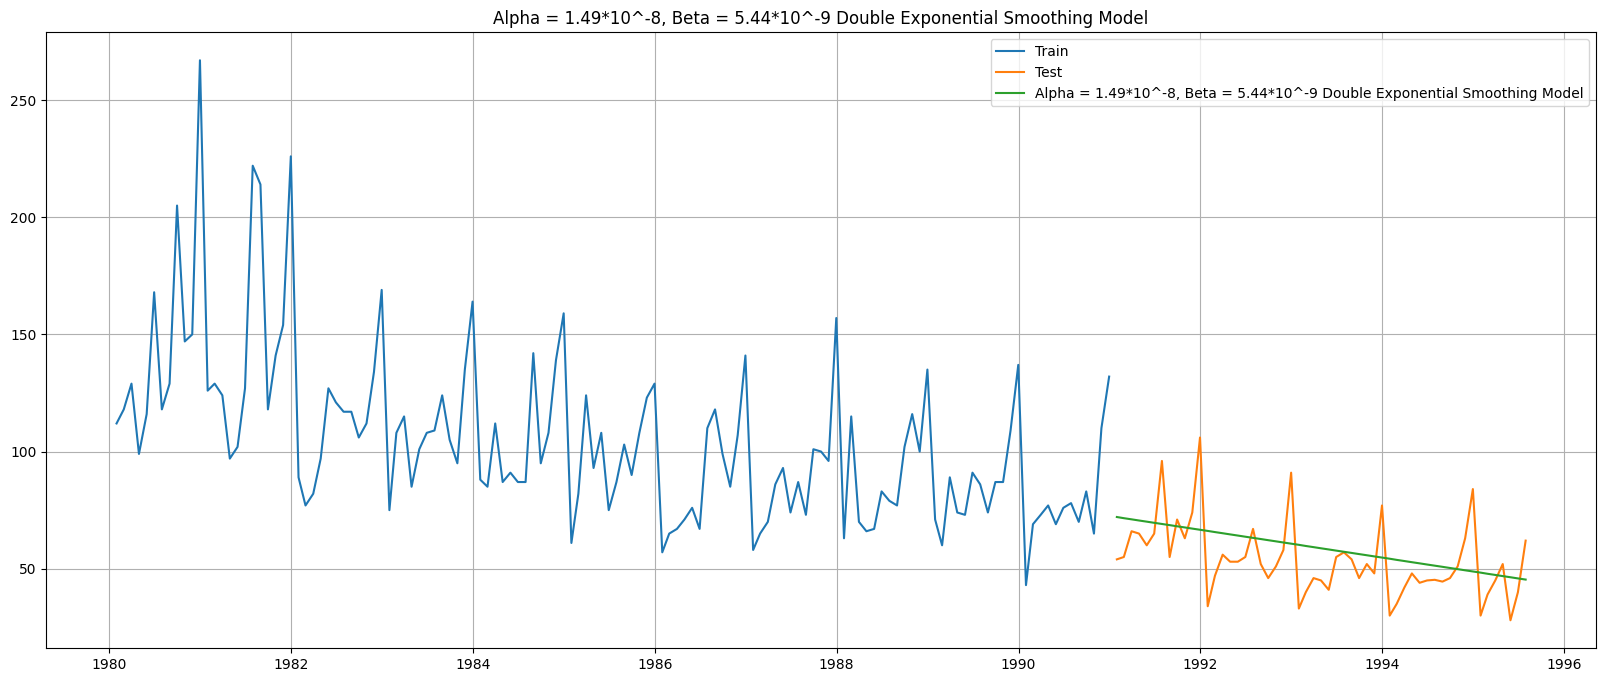

In [106]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label = 'Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Exponential Smoothing Model')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Exponential Smoothing Model');


In [107]:
# Calculate the RMSE for the training data

rmse_desa_train = mean_squared_error(train, model_DES.fittedvalues, squared=False)
rmse_desa_train

30.718135906709623

In [108]:

train_rmse6 = pd.DataFrame({'Train_RMSE': [round(rmse_desa_train, 2)]}, index=['Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Exponential Smoothing Model'])

train_rmse = pd.concat([train_rmse, train_rmse6])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72

#### Model Evaluation

In [109]:
mape_des_auto = MAPE(test.values, DES_predict.values)
print('DES MAPE =', round(mape_des_auto, 2))

DES MAPE = 30.14


In [110]:
print('DES RMSE:',round(mean_squared_error(test.values,DES_predict.values,squared=False),2))


DES RMSE: 15.28


In [111]:
resultsDf_6 = pd.DataFrame({'Test_RMSE': [round(mean_squared_error(test.values, DES_predict.values, squared=False), 2)],
                            'MAPE': round(mape_des_auto, 2)},
                            index=['Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14

**Insights**
- The Autofill double exponential smoothing model forecasts the trend but disregards the seasonality of the time series.

- The RMSE is 15.28, and the MAPE is 30.14 for the Double exponential smoothing model. While the error is comparable to the Linear Regression Model

- Alpha & beta close to 0 means it has used the whole historical data to forecast the time series.

#### DES: Brute Force Method


In [112]:
DES_train = train.copy()
DES_test = test.copy()
custom_DES = pd.DataFrame(columns = ['Alpha', 'Beta', 'Train RMSE', 'Test RMSE'])

In [113]:
for i in np.arange(0.01, 1, 0.01):
  for j in np.arange(0.01, 1, 0.01):
    DES_alpha_ij = Holt(train, initialization_method = 'estimated').fit(smoothing_level = i, smoothing_trend = j, optimized = False, use_brute = True)
    DES_train['predict', i, j] = DES_alpha_ij.fittedvalues
    DES_test['predict', i, j] = DES_alpha_ij.forecast(len(test))

    rmse_DES_train = mean_squared_error(train, DES_train['predict', i, j], squared = False)
    rmse_DES_test = mean_squared_error(test, DES_test['predict', i, j], squared = False)

    custom_DES = custom_DES.append({'Alpha': i, 'Beta': j, 'Train RMSE': rmse_DES_train, 'Test RMSE': rmse_DES_test}, ignore_index = True)

custom_DES.sort_values(by = 'Test RMSE').head()

Alpha  Beta  Train RMSE  Test RMSE
343   0.04  0.47   39.202418  14.455976
222   0.03  0.25   46.040023  15.027318
223   0.03  0.26   45.711843  15.212806
262   0.03  0.65   41.690382  15.331714
398   0.05  0.03   59.667569  15.352286

- Since alpha = 0.04 and beta = 0.47 yield the least test RMSE, indicating the best fit for our test data, we select them to build our double exponential smoothing model.

''

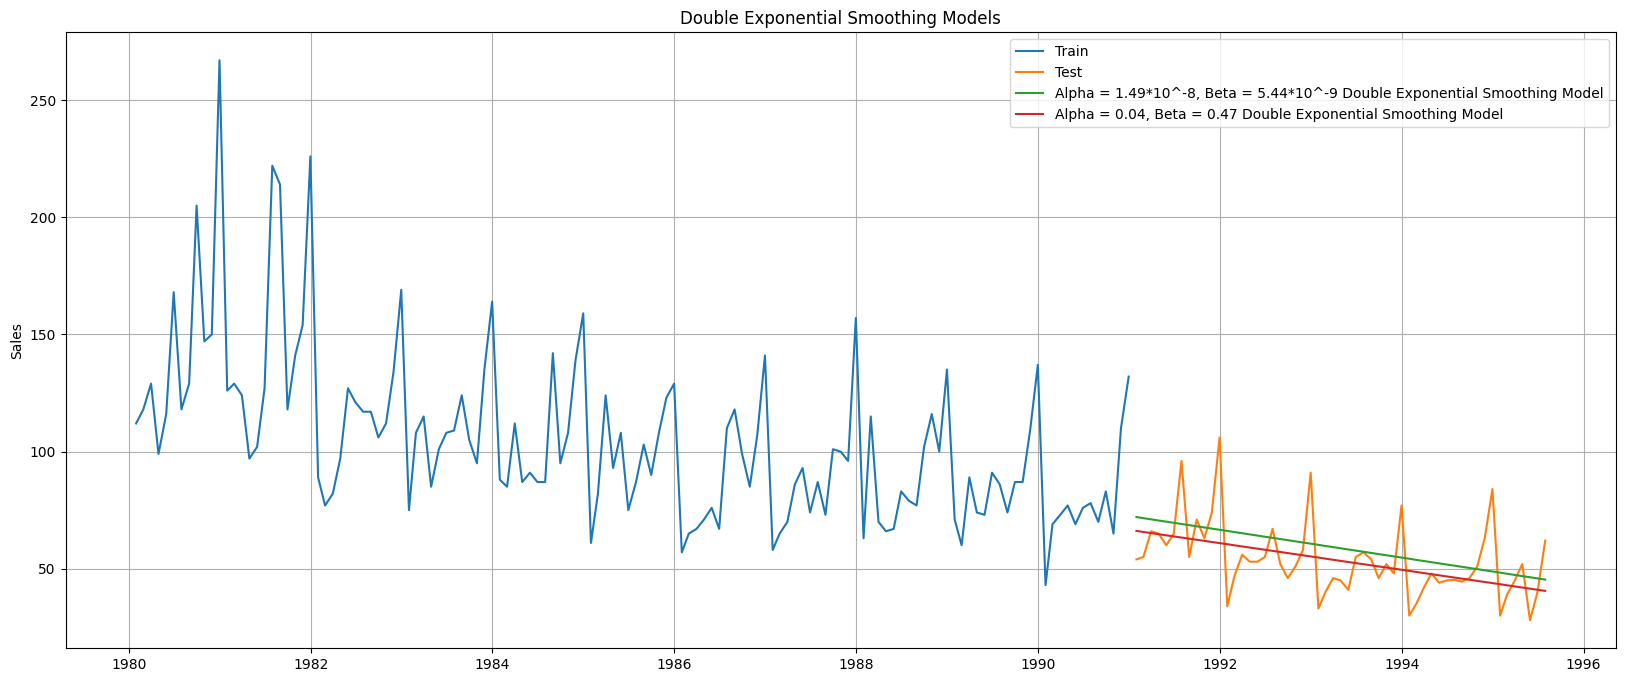

In [114]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(DES_predict, label = 'Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Exponential Smoothing Model')
plt.plot(DES_test['predict', 0.04, 0.47000000000000003], label = 'Alpha = 0.04, Beta = 0.47 Double Exponential Smoothing Model')
plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Double Exponential Smoothing Models')
plt.grid()
;

In [115]:
# Calculate the RMSE for the training data
# Since best RMSE table printed above on train data: Let's print against Alpha=0.665, Beta = 0.0001

rmse_desbf_train = custom_DES.sort_values(by = 'Test RMSE').head(1)['Train RMSE'].values.item()
rmse_desbf_train


39.20241753774586

In [116]:

train_rmse7 = pd.DataFrame({'Train_RMSE': [round(rmse_desbf_train, 2)]}, index=['Alpha = 0.04 & Beta = 0.47 Double Exponential Smoothing Model'])

train_rmse = pd.concat([train_rmse, train_rmse7])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20

#####Model Evaluation

In [117]:
#MAPE
mape_des_tuned = MAPE(test.values, DES_test['predict', 0.02, 0.38].values)
print('DES MAPE =', round(mape_des_tuned, 2))

DES MAPE = 34.86


In [118]:
#RMSE
rmse_des_tuned = custom_DES.sort_values(by = 'Test RMSE').values[0][3]
print('DES RMSE =', round(rmse_des_tuned, 2))

DES RMSE = 14.46


In [119]:
resultsDf7 = pd.DataFrame({'Test_RMSE': round(rmse_des_tuned, 2), 'MAPE': round(mape_des_tuned, 2)}, index = ['Alpha = 0.04 & Beta = 0.47 Double Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf7])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14
Alpha = 0.04 & Beta = 0.47 Double Exponential S...      14.46   34.86

**Insights:**
- The Brute Force double exponential smoothing model effectively captures the trend but overlooks the seasonality of the time series.

- This performs slightly better than auto fill method (Double Exponential Smoothing Alpha = 1.49*10^-8, Beta = 5.44*10^-9

- The model exhibits RMSE of 14.46 and MAPE of 34.86.




###Triple Exponential Smoothing:

#### TES: Autofit Model

In [120]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',
                                    seasonal='multiplicative',
                                    initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES_am.params)



Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.07736040004765096, 'smoothing_trend': 0.03936496779735522, 'smoothing_seasonal': 0.0008375039104357999, 'damping_trend': nan, 'initial_level': 156.90674503596637, 'initial_trend': -0.9061396720042346, 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
       0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
       1.19783562, 1.6514144 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [121]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am


1991-01-31     55.942246
1991-02-28     63.240624
1991-03-31     68.899674
1991-04-30     60.007486
1991-05-31     67.257150
1991-06-30     72.880875
1991-07-31     79.913317
1991-08-31     84.831135
1991-09-30     79.856761
1991-10-31     78.009465
1991-11-30     90.608817
1991-12-31    124.421985
1992-01-31     53.620022
1992-02-29     60.606323
1992-03-31     66.019647
1992-04-30     57.490388
1992-05-31     64.426058
1992-06-30     69.802261
1992-07-31     76.525716
1992-08-31     81.222314
1992-09-30     76.447471
1992-10-31     74.667150
1992-11-30     86.712771
1992-12-31    119.052784
1993-01-31     51.297798
1993-02-28     57.972023
1993-03-31     63.139621
1993-04-30     54.973289
1993-05-31     61.594966
1993-06-30     66.723648
1993-07-31     73.138115
1993-08-31     77.613494
1993-09-30     73.038180
1993-10-31     71.324834
1993-11-30     82.816725
1993-12-31    113.683583
1994-01-31     48.975574
1994-02-28     55.337723
1994-03-31     60.259594
1994-04-30     52.456191


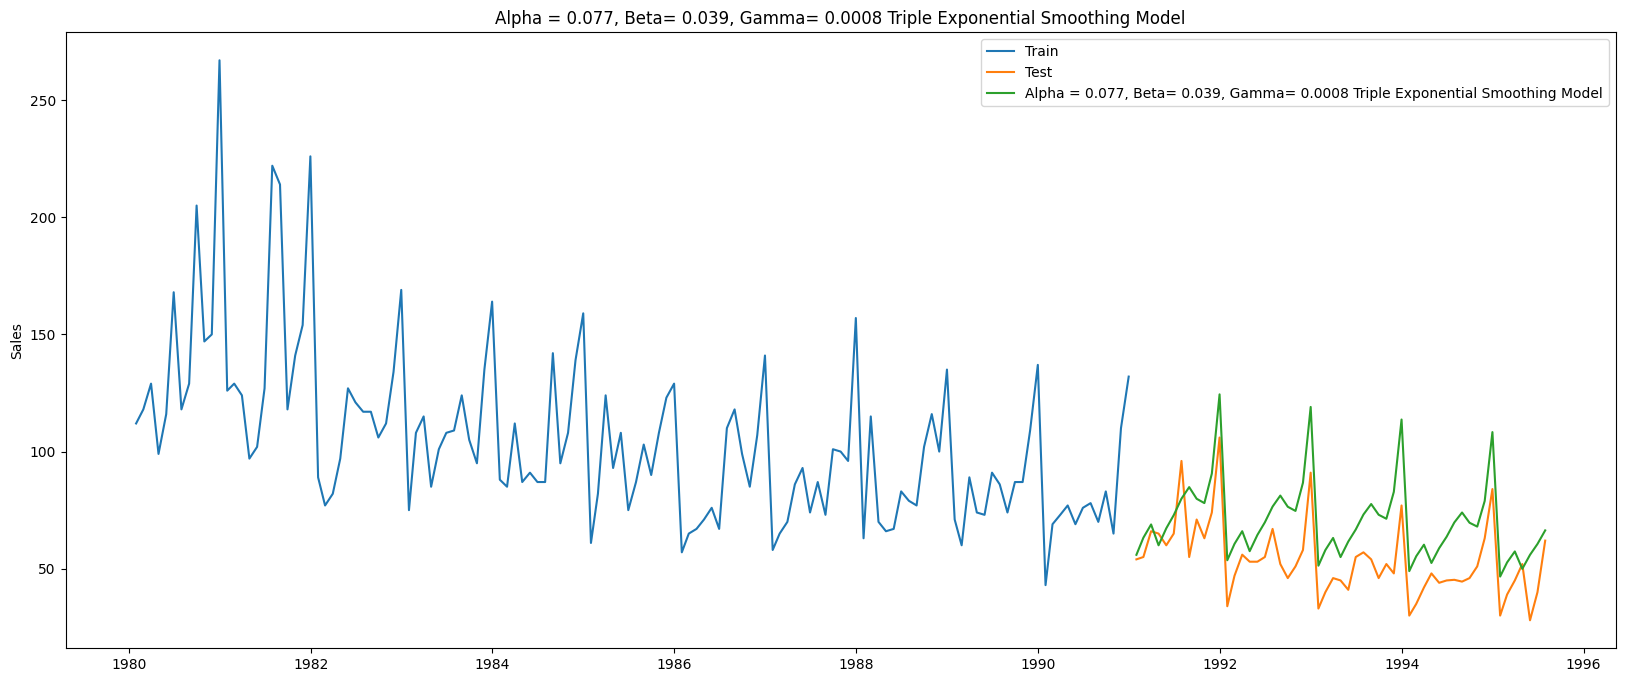

In [122]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_predict_am, label = 'Alpha = 0.077, Beta= 0.039, Gamma= 0.0008 Triple Exponential Smoothing Model')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Alpha = 0.077, Beta= 0.039, Gamma= 0.0008 Triple Exponential Smoothing Model')
plt.grid();


In [123]:
# Calculate the RMSE for the training data

rmse_tesa_train = mean_squared_error(train, model_TES_am.fittedvalues, squared=False)
rmse_tesa_train

18.413441835083407

In [124]:

train_rmse8 = pd.DataFrame({'Train_RMSE': [round(rmse_tesa_train, 2)]}, index=['Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse8])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...       18.41

#### Model Accuracy

In [125]:
#MAPE
TES_aut_mape = MAPE(test.values, TES_predict_am.values)
print('MAPE =', round(TES_aut_mape, 2))

MAPE = 47.83


In [126]:
#RMSE
TES_aut_rmse= mean_squared_error(test.values,TES_predict_am.values,squared=False)
print('TES_aam RMSE:', round(TES_aut_rmse,2))


TES_aam RMSE: 19.15


In [127]:

resultsDf_8 = pd.DataFrame({'Test_RMSE': round(TES_aut_rmse, 2), 'MAPE': round(TES_aut_mape, 2)},
                              index = ['Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Triple Exponential Smoothing'])


resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14
Alpha = 0.04 & Beta = 0.47 Double Exponential S...      14.46   34.86
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      19.15   47.83

 **Insights**
- The Autofill Triple Exponential Smoothing model captures both the trend and seasonality of the time series.

- The test RMSE is 19.15, and the MAPE is 47.83. However, the error is higher than Double exponential Smoothening or LinearRegression model

- The values of Alpha, Beta and Gamma being close to 0, indicate that the forecast relies heavily on historical data to build the model giving a smoother prediction.  




#### TES: Brute Force Method

In [128]:
TES_train = train.copy()
TES_test = test.copy()
custom_TES = pd.DataFrame(columns = ['Alpha', 'Beta', 'Gamma', 'Train RMSE', 'Test RMSE'])

- Step size in the arange function is selected a bit higher to allow for faster computation

In [129]:
for i in np.arange(0.01, 1, 0.03):
  for j in np.arange(0.01, 1, 0.03):
    for k in np.arange(0.01, 1, 0.03):
      TES_alpha_ijk = ExponentialSmoothing(train, trend = 'additive',
                                           seasonal = 'multiplicative',
                                           initialization_method = 'estimated').fit(smoothing_level = i,
                                                                                    smoothing_trend = j,
                                                                                    smoothing_seasonal = k,
                                                                                    optimized = False, use_brute = True)
      TES_train['predict', i, j, k] = TES_alpha_ijk.fittedvalues
      TES_test['predict', i, j, k] = TES_alpha_ijk.forecast(len(test))

      rmse_TES_train = mean_squared_error(train, TES_train['predict', i, j, k], squared = False)
      rmse_TES_test = mean_squared_error(test, TES_test['predict', i, j, k], squared = False)

      custom_TES = custom_TES.append({'Alpha': i, 'Beta': j, 'Gamma': k, 'Train RMSE': rmse_TES_train, 'Test RMSE': rmse_TES_test}, ignore_index = True)

custom_TES.sort_values(by = 'Test RMSE').head()

Alpha  Beta  Gamma  Train RMSE  Test RMSE
1653   0.04  0.52   0.10   21.687974   8.215645
106    0.01  0.10   0.22   28.206290   8.276493
1654   0.04  0.52   0.13   21.655908   8.410002
72     0.01  0.07   0.19   30.190955   8.446942
1625   0.04  0.49   0.25   21.740051   8.466591

Based on the evaluation, the triple exponential smoothing model with the following parameter values is selected as the best fit for our test data:

- Alpha (level smoothing parameter) = 0.04
- Beta (trend smoothing parameter) = 0.52
- Gamma (seasonality smoothing parameter) = 0.10


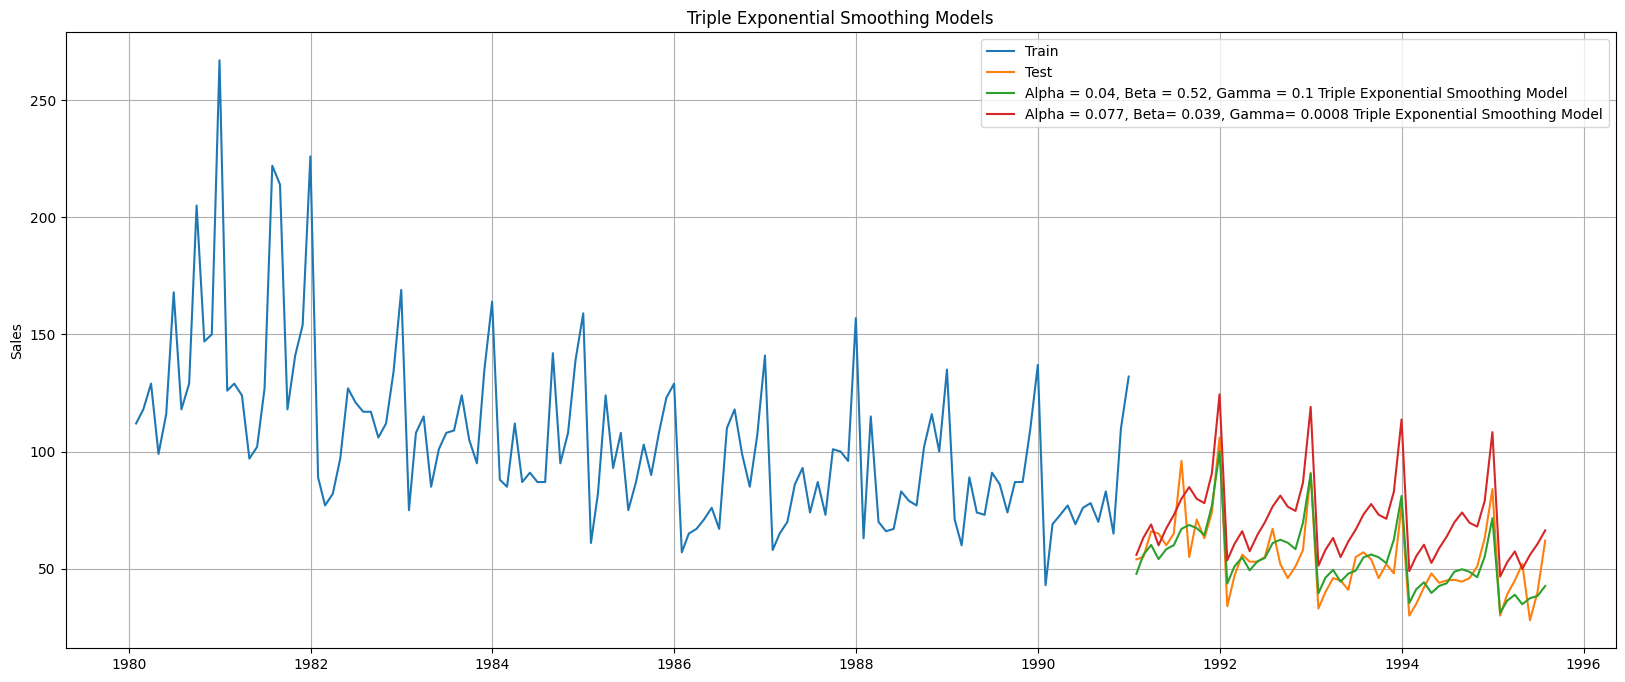

In [130]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(TES_test['predict', 0.04, 0.52, 0.09999999999999999], label = 'Alpha = 0.04, Beta = 0.52, Gamma = 0.1 Triple Exponential Smoothing Model')
plt.plot(TES_predict_am, label = 'Alpha = 0.077, Beta= 0.039, Gamma= 0.0008 Triple Exponential Smoothing Model')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Triple Exponential Smoothing Models');

In [131]:
# Calculate the RMSE for the training data

rmse_tesbf_train = custom_TES.sort_values(by = 'Test RMSE').head(1)['Train RMSE'].values.item()
rmse_tesbf_train


21.687974247123865

In [132]:

train_rmse9 = pd.DataFrame({'Train_RMSE': [round(rmse_tesbf_train, 2)]}, index=['Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple Exponential Smoothing'])

train_rmse = pd.concat([train_rmse, train_rmse9])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...       18.41
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       21.69

#####Model Evaluation

In [133]:
#MAPE
TES_tuned_mape = MAPE(test.values, TES_test['predict', 0.04, 0.52, 0.09999999999999999].values)
print('MAPE =', round(TES_tuned_mape, 2))

MAPE = 30.67


In [134]:
#RMSE
TES_tuned_rmse = custom_TES.sort_values(by = 'Test RMSE').values[0][4]
print('RMSE =', round(TES_tuned_rmse, 2))

RMSE = 8.22


In [135]:
resultsDf9 = pd.DataFrame({'Test_RMSE': round(TES_tuned_rmse, 2), 'MAPE': round(TES_tuned_mape, 2)},
                              index = ['Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf9])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14
Alpha = 0.04 & Beta = 0.47 Double Exponential S...      14.46   34.86
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      19.15   47.83
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       8.22   30.67

**Insights:**

- The Brute Force triple exponential smoothing models show the best accuracy among all models evaluated, with the lowest Root Mean Square Error (RMSE) of 8.22 and Mean Absolute Percentage Error (MAPE) of 30.67  

- This is followed by the 2-point moving average model, capturing both trend and seasonality in the time series.

- The rest of the other models are also not suitable for prediction as they do not capture both the Trend & Seasonality well required for the time series.



#### Plotting all the models so far

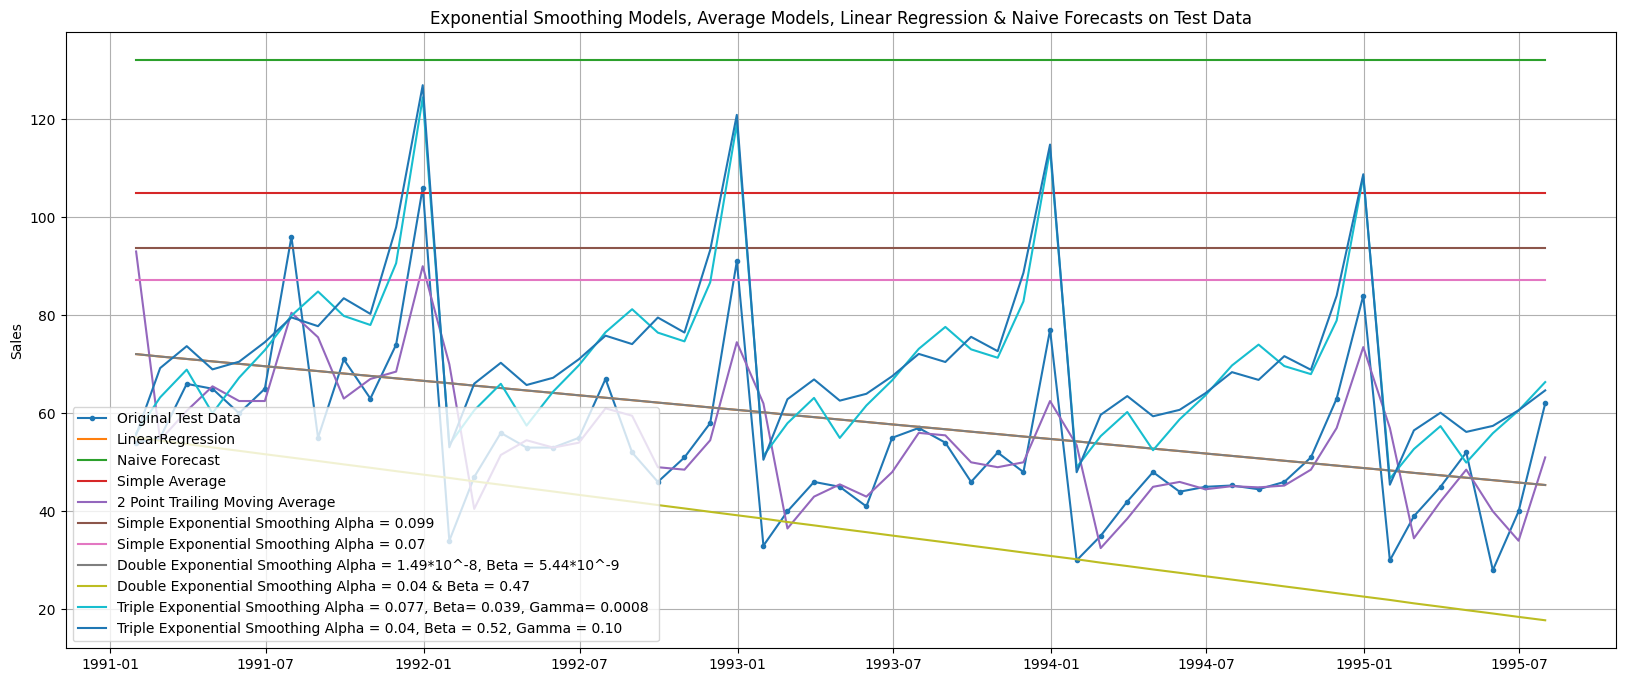

In [136]:
plt.plot(test, label = 'Original Test Data', marker = '.')

plt.plot(LinearRegression_test['RegOnTime'], label='LinearRegression')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average')
plt.plot(SES_test['predict', 0.02], label = 'Simple Exponential Smoothing Alpha = 0.099')
plt.plot(SES_predict, label='Simple Exponential Smoothing Alpha = 0.07')
plt.plot(DES_predict, label = 'Double Exponential Smoothing Alpha = 1.49*10^-8, Beta = 5.44*10^-9')
plt.plot(DES_test['predict', 0.02, 0.38], label = 'Double Exponential Smoothing Alpha = 0.04 & Beta = 0.47')
plt.plot(TES_predict_am, label = 'Triple Exponential Smoothing Alpha = 0.077, Beta= 0.039, Gamma= 0.0008 ')
plt.plot(TES_test['predict', 0.01, 0.04, 0.25], label = 'Triple Exponential Smoothing Alpha = 0.04, Beta = 0.52, Gamma = 0.10 ')

plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('Exponential Smoothing Models, Average Models, Linear Regression & Naive Forecasts on Test Data');

**Insights:**
- The Brute Force triple exponential smoothing models show the best accuracy among all models evaluated, with the lowest Root Mean Square Error (RMSE) of 302.73 and Mean Absolute Percentage Error (MAPE) of 49.86.  

- This is followed by the 2-point moving average model, capturing both trend and seasonality in the time series.

- The rest of the other models are also not suitable for prediction as they do not capture both the Trend & Seasonality well required for the time series.

## **5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

#### Checking for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller (ADF) Test is used to check the stationarity of a time series. The test formulates the following null and alternative hypotheses:

- Null Hypothesis (Ho): The time series is non-stationary.
- Alternative Hypothesis (Ha): The time series is stationary.




In [137]:
## Test for stationarity of the Entire series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

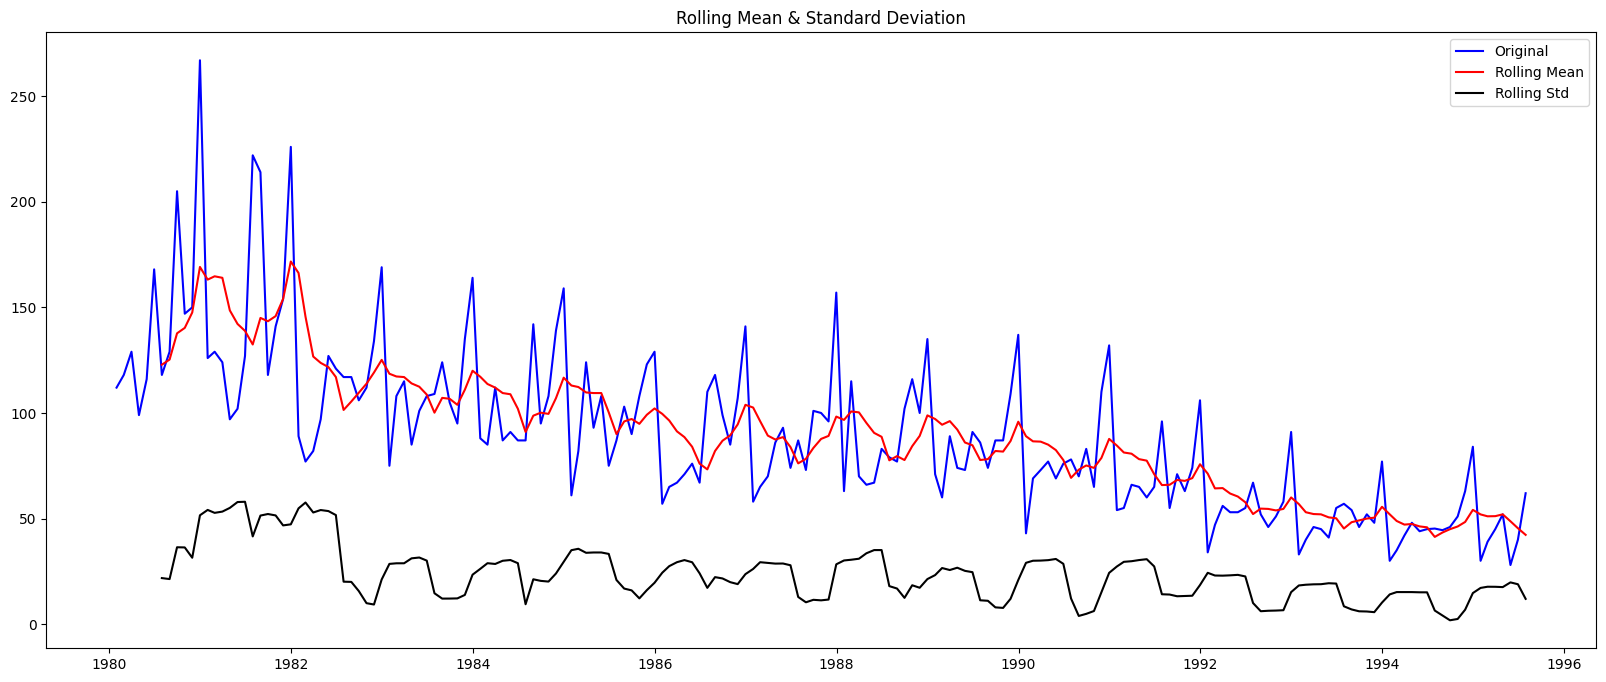

Results of Dickey-Fuller Test:
Test Statistic                  -1.873311
p-value                          0.344719
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [138]:
#Calling the function to see the results
test_stationarity(df['Rose'])

- We see that at 5% significant level the Time Series is non-stationary.
- Let us take a difference of order 1 and check whether the Time Series is stationary or not.

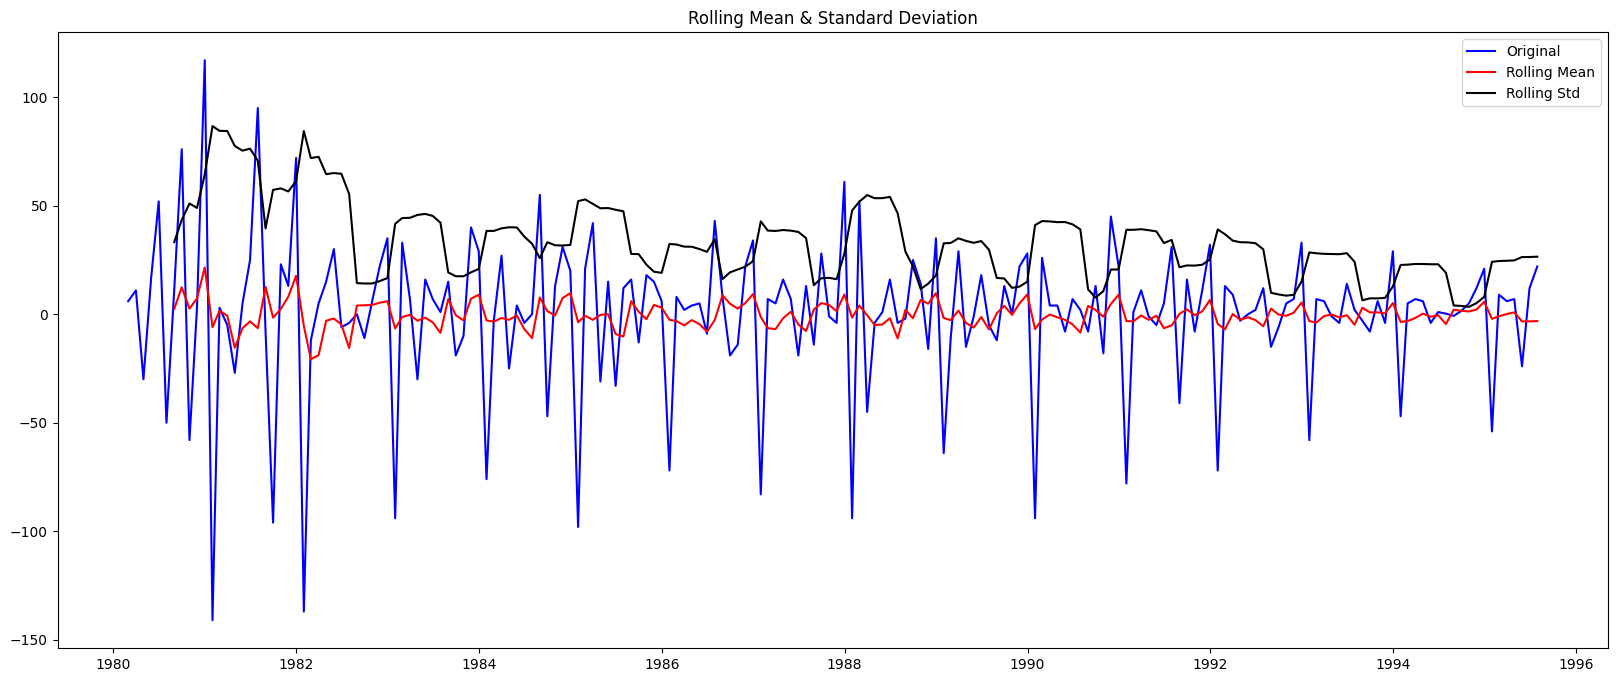

Results of Dickey-Fuller Test:
Test Statistic                -8.044108e+00
p-value                        1.813906e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [139]:
#Taking first order difference using diff function
test_stationarity(df['Rose'].diff().dropna())

- We see that **at difference of order 1, the series have become stationary** at $\alpha$ = 0.05.

#### Check for stationarity of the Training Data Time Series.

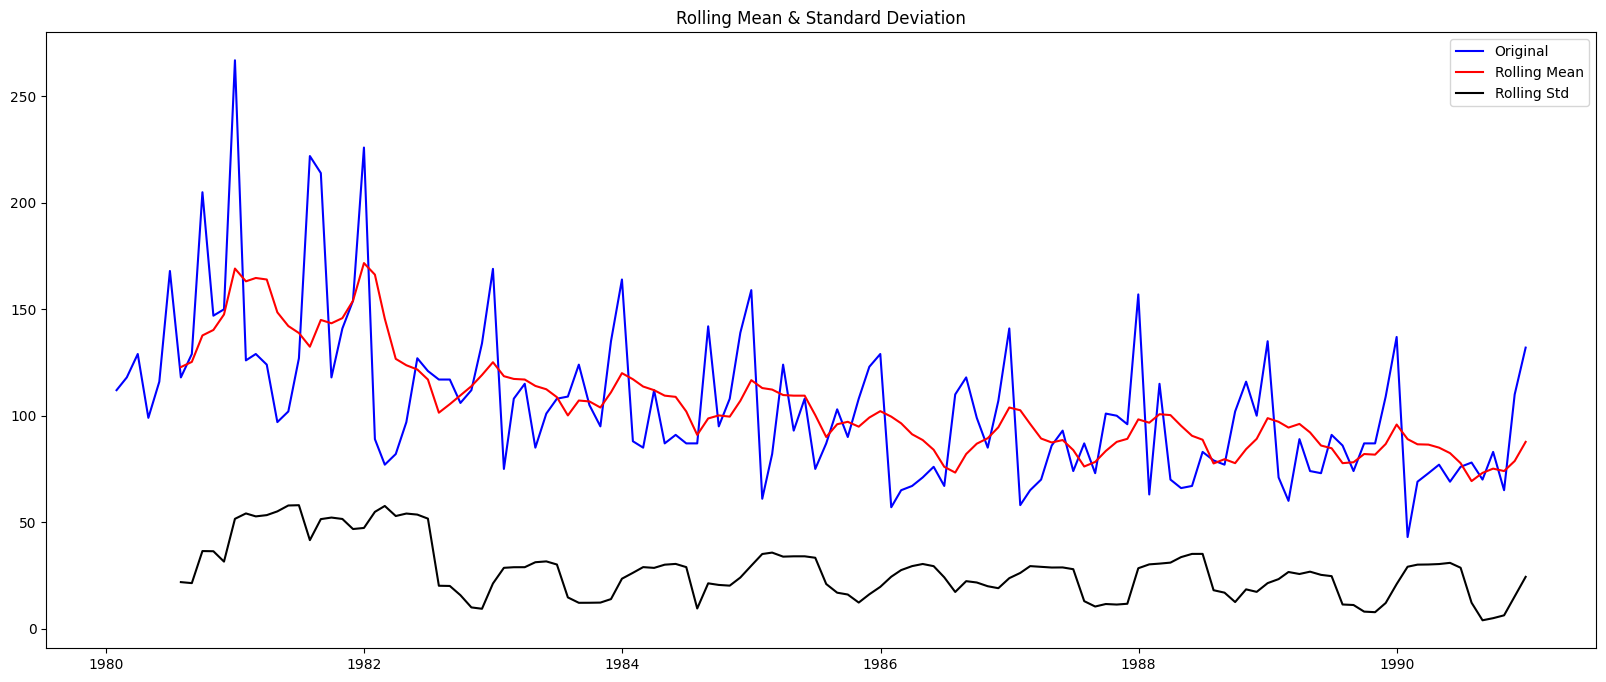

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [140]:
#Calling the function to check stationarity on training dataset
test_stationarity(train['Rose'])

- We see that the series is not stationary at $\alpha$ = 0.05.

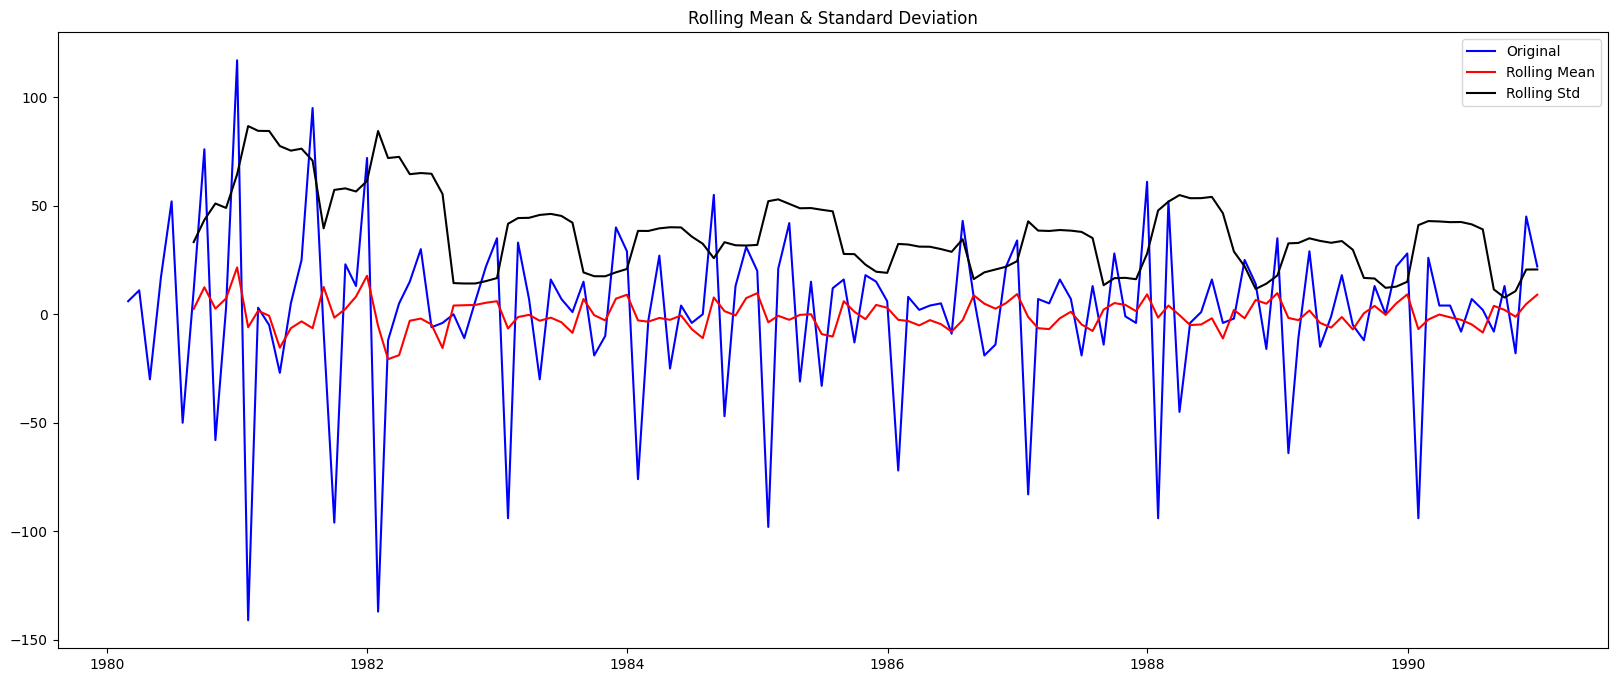

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [141]:
#Taking first order difference using diff function

test_stationarity(train['Rose'].diff().dropna())

- We see that **at difference of order 1, the series have become stationary** at $\alpha$ = 0.05.

##**6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

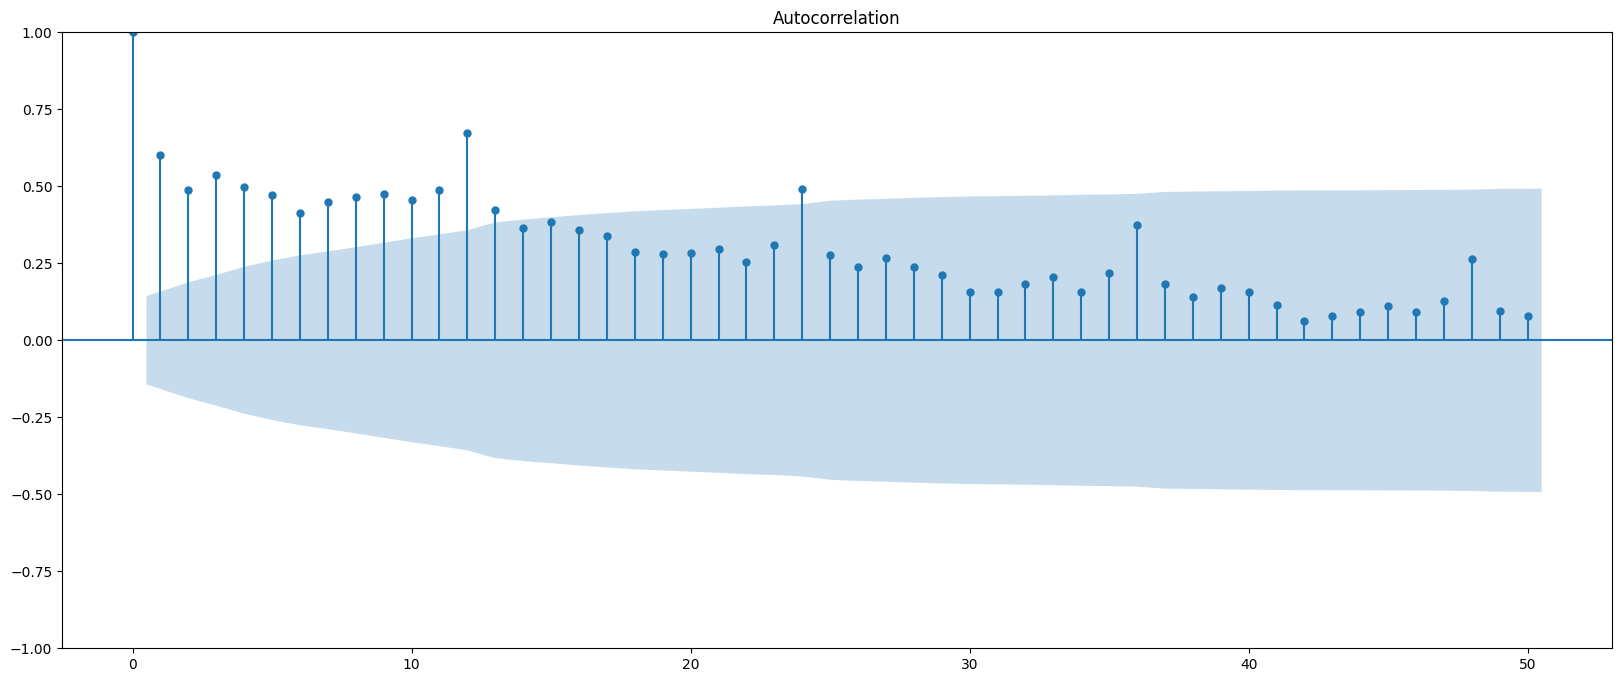

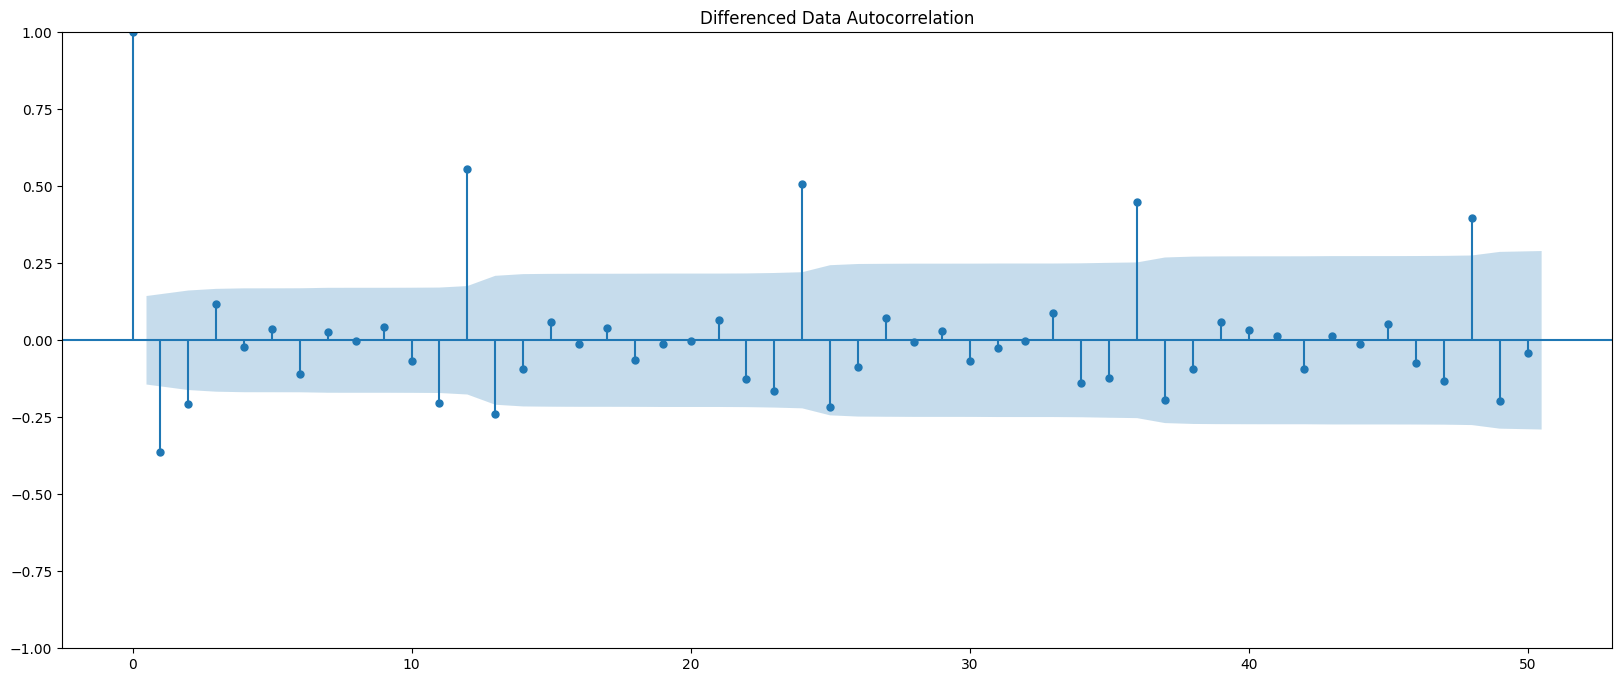

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

- From the above plots, we can say that there seems to be a seasonality in the data.

### Build an Automated version of an **ARIMA model**
For which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [143]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
import itertools

p = q = range(0, 3)
d = [1]
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')
for i in range(0, len(pdq)):
    print('Model:', pdq[i])

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [144]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [145]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
  ARIMA_model = ARIMA(train, order = param).fit()
  print('ARIMA', param, '- AIC :', ARIMA_model.aic)
  ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': ARIMA_model.aic}, ignore_index = True)

ARIMA (0, 1, 0) - AIC : 1333.1546729124348
ARIMA (0, 1, 1) - AIC : 1282.309831974832
ARIMA (0, 1, 2) - AIC : 1279.6715288535784
ARIMA (1, 1, 0) - AIC : 1317.350310538146
ARIMA (1, 1, 1) - AIC : 1280.5742295380046
ARIMA (1, 1, 2) - AIC : 1279.8707234231929
ARIMA (2, 1, 0) - AIC : 1298.6110341604945
ARIMA (2, 1, 1) - AIC : 1281.5078621868563
ARIMA (2, 1, 2) - AIC : 1281.870722226456


In [146]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [147]:
# Fit the ARIMA(2, 1, 2) model on the training data

auto_ARIMA = ARIMA(train, order = (0, 1, 2)).fit()
print(auto_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 06 Aug 2023   AIC                           1279.672
Time:                        14:57:46   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

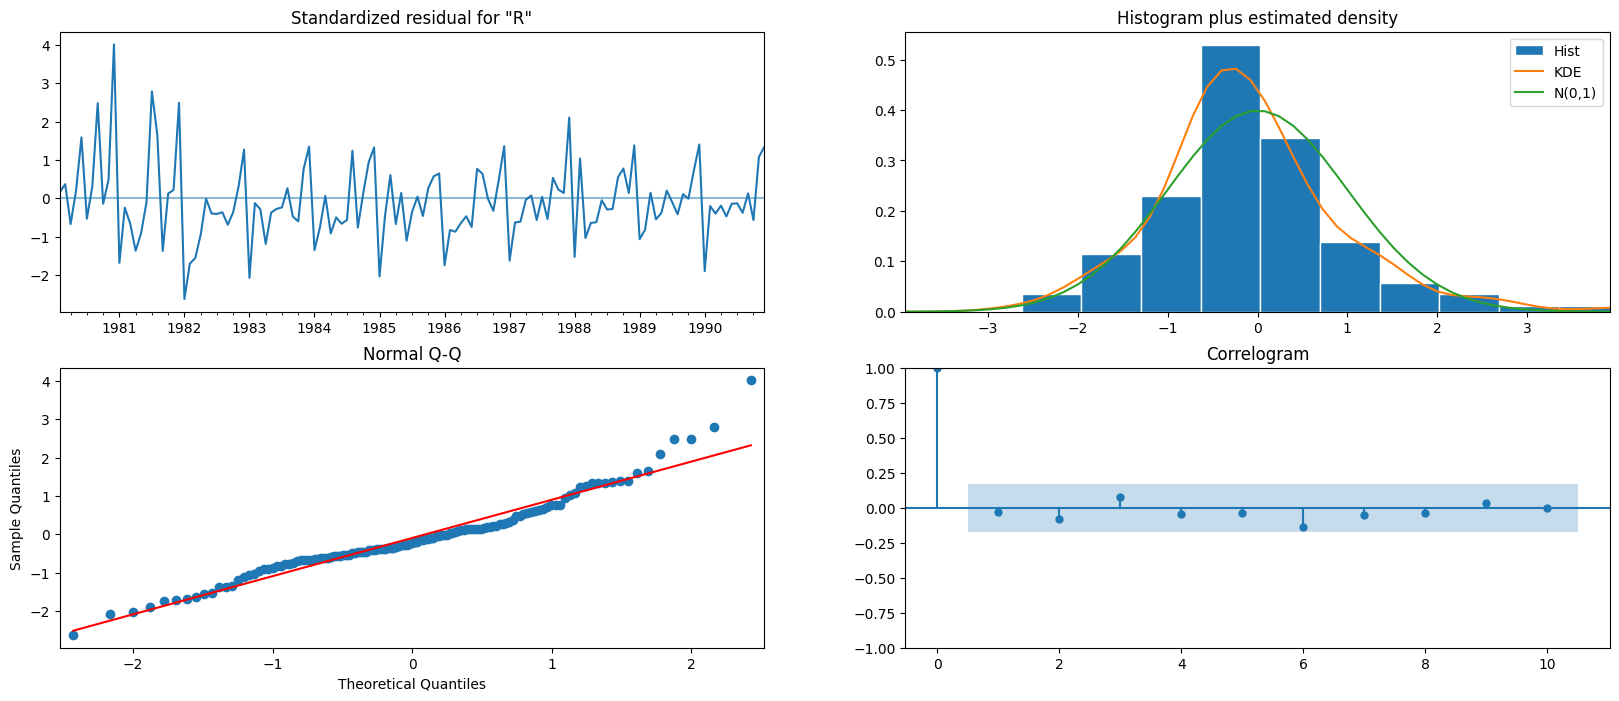

In [148]:
auto_ARIMA.plot_diagnostics();

In [149]:
pred_auto_ARIMA = auto_ARIMA.forecast(len(test))

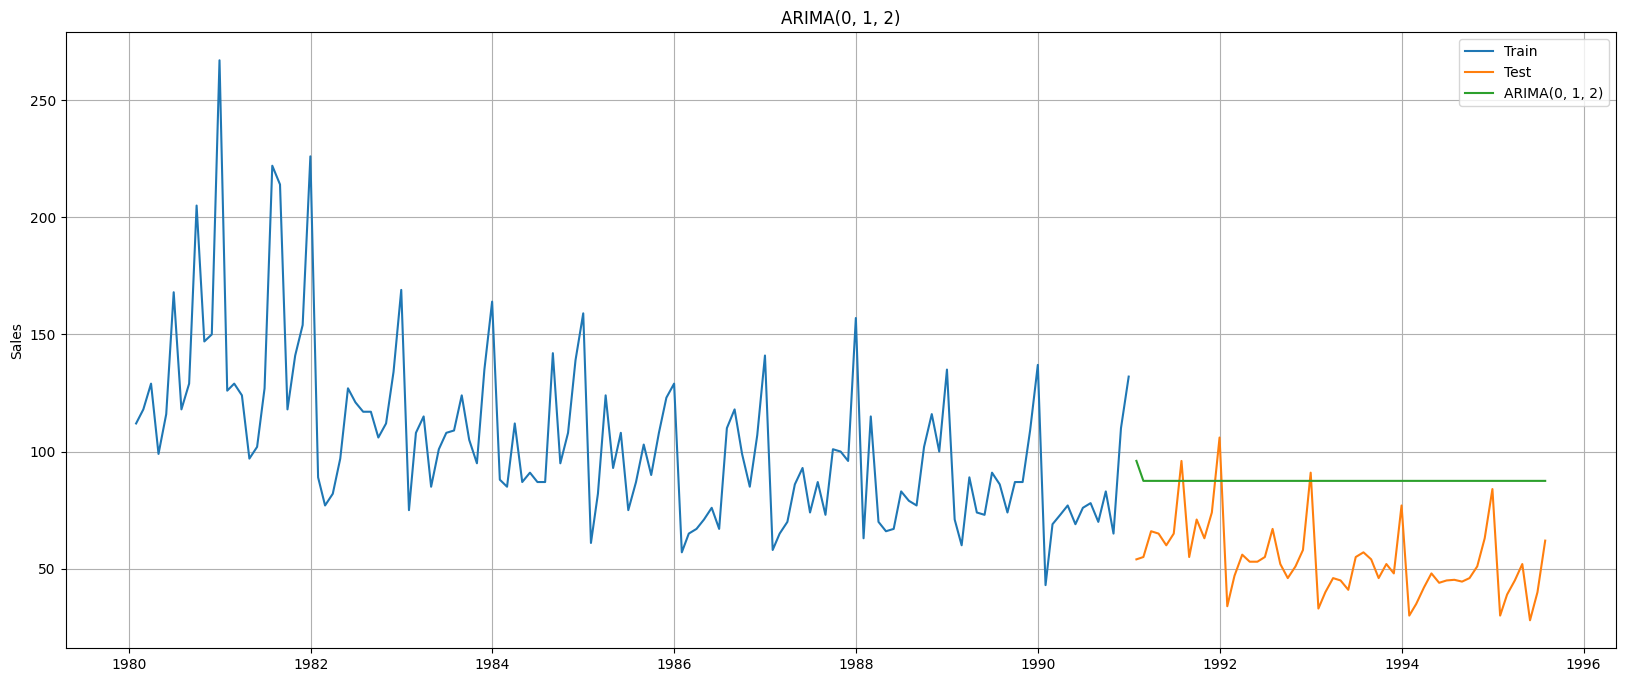

In [150]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred_auto_ARIMA, label = 'ARIMA(0, 1, 2)')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('ARIMA(0, 1, 2)');

In [151]:
#Calcultaing RMSE on Training data
#First Get the fitted values of the ARIMA(2, 1, 2) model on the training data
pred_train_auto_ARIMA = auto_ARIMA.fittedvalues

# Remove the first NaN value from the predicted values
pred_train_auto_ARIMA = pred_train_auto_ARIMA[1:]
# Remove the first element from the train data to match the number of samples
train = train[1:]

In [152]:
# Calculate the train RMSE for the ARIMA(2, 1, 2) model
rmse_train_auto_ARIMA = mean_squared_error(train, pred_train_auto_ARIMA, squared=False)
rmse_train_auto_ARIMA

31.248713193943683

In [153]:
train_rmse10 = pd.DataFrame({'Train_RMSE': [round(rmse_train_auto_ARIMA, 2)]}, index=['Automated ARIMA(0, 1, 2)'])

train_rmse = pd.concat([train_rmse, train_rmse10])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...       18.41
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       21.69
Automated ARIMA(0, 1, 2)                                 31.25

#### Model Evaluation

In [154]:
#MAPE
mape_auto_ARIMA = MAPE(test.values, pred_auto_ARIMA.values)
print('MAPE =', round(mape_auto_ARIMA, 2))

MAPE = 77.04


In [155]:
rmse_auto_ARIMA = mean_squared_error(test['Rose'],pred_auto_ARIMA,squared=False)
print('RMSE:', round(rmse_auto_ARIMA,2))

RMSE: 37.33


In [156]:

resultsDf_10 = pd.DataFrame({'Test_RMSE': round(rmse_auto_ARIMA, 2), 'MAPE': round(mape_auto_ARIMA, 2)}, index = ['Automated ARIMA(0, 1, 2)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14
Alpha = 0.04 & Beta = 0.47 Double Exponential S...      14.46   34.86
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      19.15   47.83
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       8.22   30.67
Automated ARIMA(0, 1, 2)                                37.33   77.04

**Insights:**
- The Auto ARIMA model aims to capture the underlying trend in the data but does not consider the seasonality component.

- The model's performance is evaluated with a Root Mean Square Error of 37.37 and a Mean Absolute Percentage Error of 77.18. The model performed poorer on Test data as compared to Training

### Build an Automated version of a **SARIMA model**
For which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

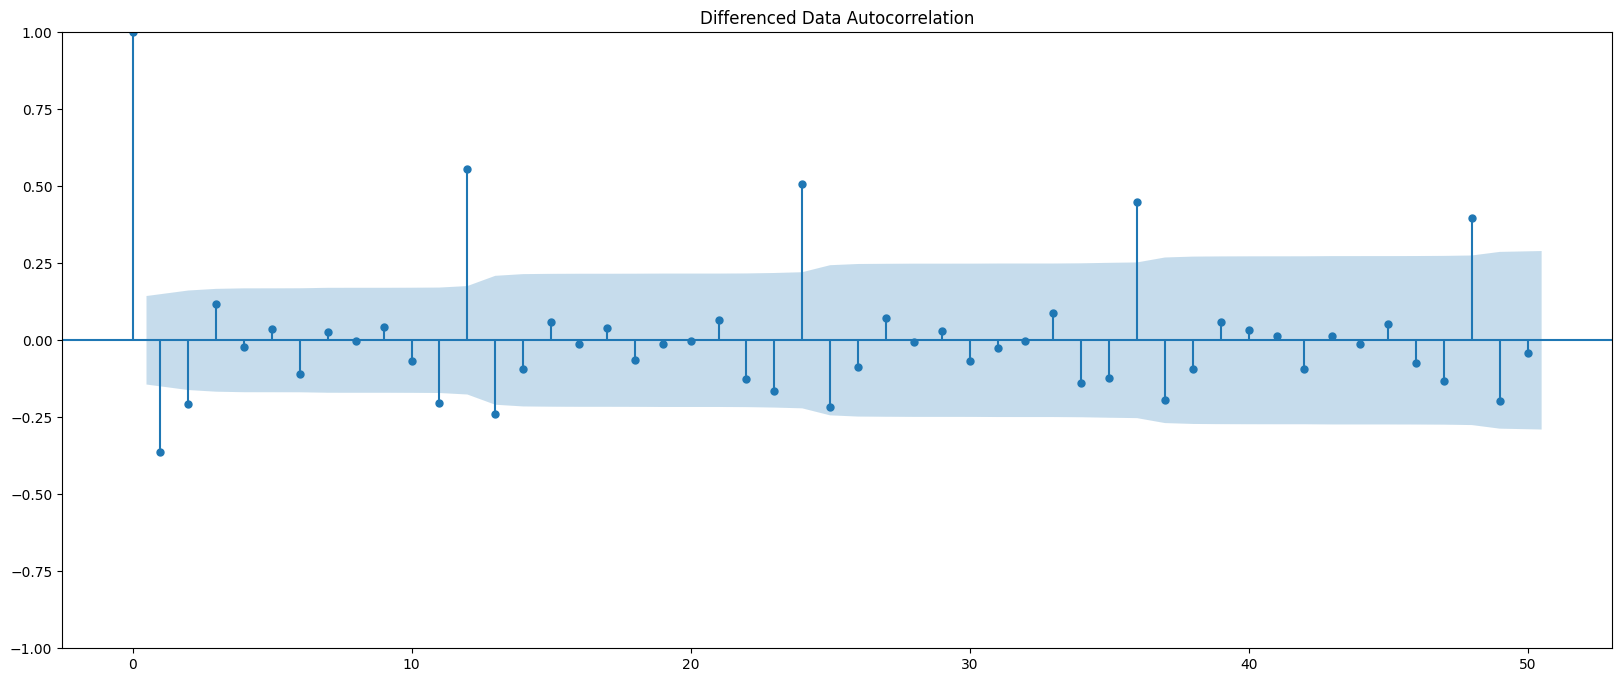

In [157]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

- S=12 is chosen for seasonal differencing as it is significant, and the ACF plot at S=12 does not taper off.

- This indicates the presence of seasonality, and applying seasonal differencing to the original series can improve the model's performance.






#### Setting the seasonality as 12  to estimate parametrs using auto SARIMA model.
d = 1 to make the time series stationary

Seasonal differencing not yet applied to make the time series stationary D = 0

#### Auto **SARIMA** - without differencing

In [158]:
#Train - Test Split ( Since we removed first value previously)
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [159]:
train

Rose
Year_Month       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

[132 rows x 1 columns]

In [160]:
p = q = range(0, 3)
d = [1]
D = [0]
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [161]:
SARIMA_AIC = pd.DataFrame(columns = ['param', 'seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [162]:
for param in pdq:
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                             order = param, seasonal_order = param_seasonal,
                                             enforce_stationarity = False,
                                             enforce_invertibility = False).fit(maxiter = 1000)
    print('SARIMA', param, param_seasonal, '- AIC:', SARIMA_model.aic)
    SARIMA_AIC = SARIMA_AIC.append({'param': param, 'seasonal': param_seasonal,
                                    'AIC': SARIMA_model.aic}, ignore_index = True)

SARIMA (0, 1, 0) (0, 0, 0, 12) - AIC: 1323.9657875279158
SARIMA (0, 1, 0) (0, 0, 1, 12) - AIC: 1145.4230827207298
SARIMA (0, 1, 0) (0, 0, 2, 12) - AIC: 976.4375296380895
SARIMA (0, 1, 0) (1, 0, 0, 12) - AIC: 1139.921738995602
SARIMA (0, 1, 0) (1, 0, 1, 12) - AIC: 1116.0207869386172
SARIMA (0, 1, 0) (1, 0, 2, 12) - AIC: 969.691363575225
SARIMA (0, 1, 0) (2, 0, 0, 12) - AIC: 960.8812220353041
SARIMA (0, 1, 0) (2, 0, 1, 12) - AIC: 962.8794540697556
SARIMA (0, 1, 0) (2, 0, 2, 12) - AIC: 955.5735408945757
SARIMA (0, 1, 1) (0, 0, 0, 12) - AIC: 1263.5369097383966
SARIMA (0, 1, 1) (0, 0, 1, 12) - AIC: 1098.5554825918337
SARIMA (0, 1, 1) (0, 0, 2, 12) - AIC: 923.631404938385
SARIMA (0, 1, 1) (1, 0, 0, 12) - AIC: 1095.793632491823
SARIMA (0, 1, 1) (1, 0, 1, 12) - AIC: 1054.7434330946953
SARIMA (0, 1, 1) (1, 0, 2, 12) - AIC: 918.8573483297299
SARIMA (0, 1, 1) (2, 0, 0, 12) - AIC: 914.5982866535833
SARIMA (0, 1, 1) (2, 0, 1, 12) - AIC: 915.333243046168
SARIMA (0, 1, 1) (2, 0, 2, 12) - AIC: 901.198

In [163]:
SARIMA_AIC.sort_values(by = 'AIC').head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686929
78  (2, 1, 2)  (2, 0, 0, 12)  897.346445

 p = 0, d = 1, q = 2, P = 2, D = 0, Q = 2, S = 12

In [164]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train, order = (0, 1, 2),
                                        seasonal_order = (2, 0, 2, 12),
                                        enforce_stationarity = False,
                                        enforce_invertibility = False).fit(maxiter = 1000)
print(auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 06 Aug 2023   AIC                            887.938
Time:                                    14:58:31   BIC                            906.448
Sample:                                01-31-1980   HQIC                           895.437
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.534     -0.004      0.996    -372.322     370.636
ma.L2         -0.1573     29.777   

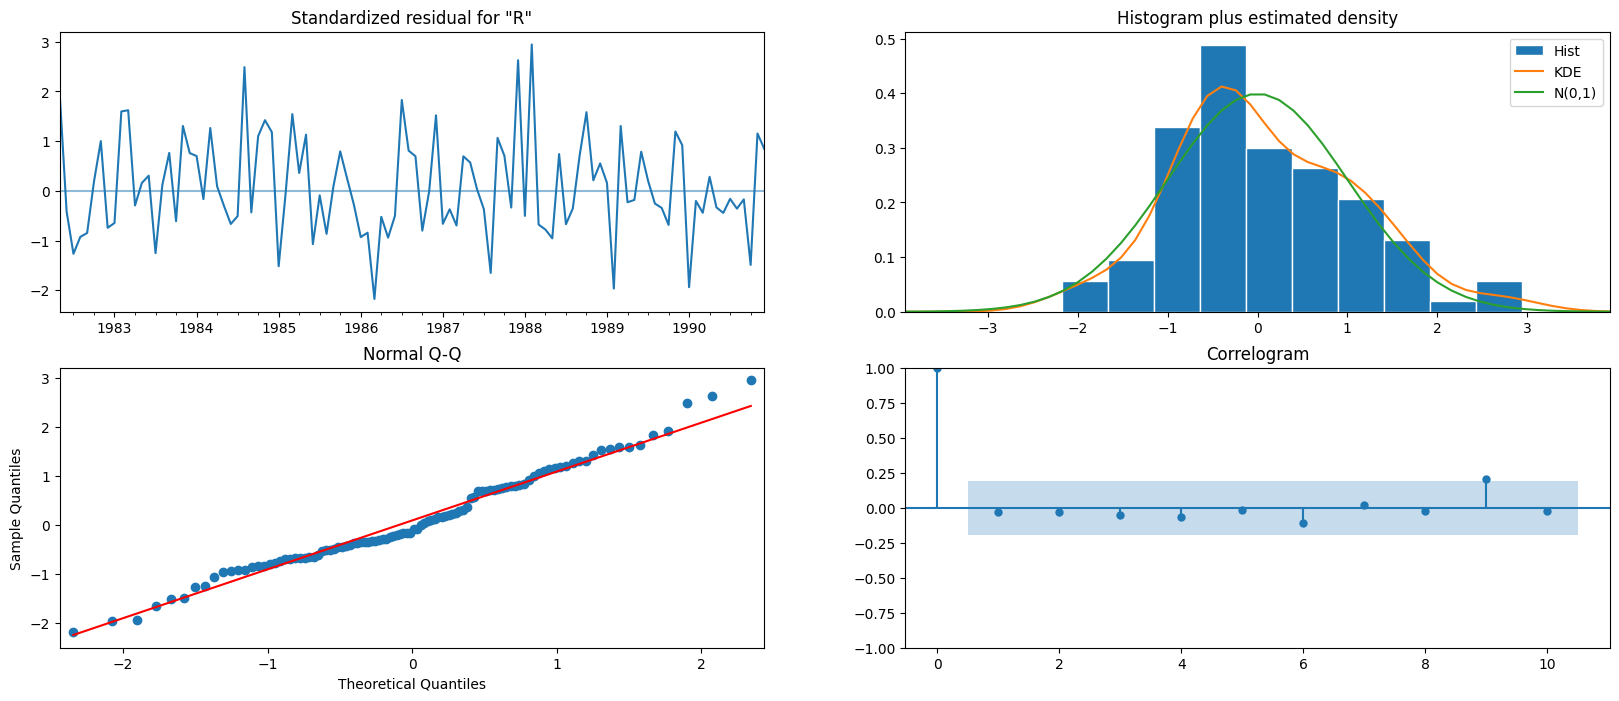

In [165]:
auto_SARIMA.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

In [166]:
predicted_auto_SARIMA = auto_SARIMA.get_forecast(steps=len(test))

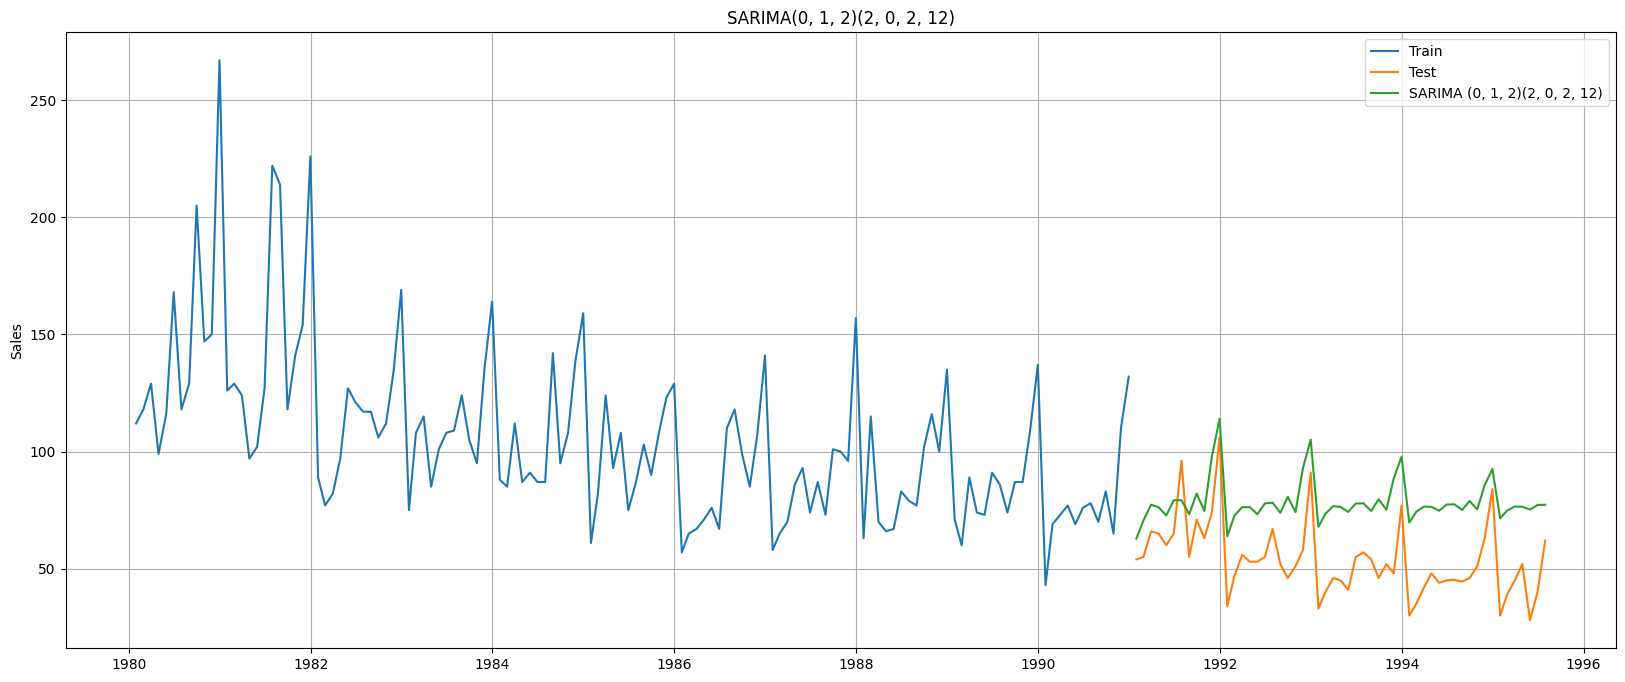

In [167]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predicted_auto_SARIMA.predicted_mean, label = 'SARIMA (0, 1, 2)(2, 0, 2, 12)')
plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('SARIMA(0, 1, 2)(2, 0, 2, 12)')
plt.grid();

In [168]:
# Calculate the train RMSE on Test data
pred_train_auto_SARIMA = auto_SARIMA.fittedvalues

# Ensure both arrays have the same length by adjusting the indexing
train = train.iloc[-len(pred_train_auto_SARIMA):]


In [169]:
rmse_train_auto_SARIMA = mean_squared_error(train, pred_train_auto_SARIMA, squared=False)


In [170]:
train_rmse12 = pd.DataFrame({'Train_RMSE': [round(rmse_train_auto_SARIMA, 2)]}, index=['Automated SARIMA(0, 1, 2)(2, 0, 2, 12)'])

train_rmse = pd.concat([train_rmse, train_rmse12])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...       18.41
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       21.69
Automated ARIMA(0, 1, 2)                                 31.25
Automated SARIMA(0, 1, 2)(2, 0, 2, 12)                   32.23

#### Model Evaluation

In [171]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  62.867262  15.928500      31.647975      94.086548
1991-02-28  70.541189  16.147658      38.892361     102.190017
1991-03-31  77.356410  16.147656      45.707587     109.005233
1991-04-30  76.208813  16.147656      44.559990     107.857637
1991-05-31  72.747397  16.147656      41.098574     104.396221

In [172]:
#MAPE
mape_auto_SARIMA = MAPE(test.values, predicted_auto_SARIMA.predicted_mean.values)
print('MAPE =', round(mape_auto_SARIMA, 2))

MAPE = 59.95


In [173]:
#RMSE
rmse_auto_SARIMA = mean_squared_error(test, predicted_auto_SARIMA.predicted_mean, squared = False)
print('RMSE =', round(rmse_auto_SARIMA, 2))

RMSE = 26.95


In [174]:

resultsDf_11 = pd.DataFrame({'Test_RMSE': round(rmse_auto_SARIMA, 2), 'MAPE': round(mape_auto_SARIMA, 2)}, index = ['Automated SARIMA(0, 1, 2)(2, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf


Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14
Alpha = 0.04 & Beta = 0.47 Double Exponential S...      14.46   34.86
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      19.15   47.83
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       8.22   30.67
Automated ARIMA(0, 1, 2)                                37.33   77.04
Automated SARIMA(0, 1, 2)(2, 0, 2, 12)                  26.95   59.95

**Insights**
- The Automated SARIMA (0, 1, 2)(2, 0, 2, 12)  aims to capture the underlying trend in the data as well as the seasonality component.

- The model's performance is evaluated with a Root Mean Square Error of 26.95 and a Mean Absolute Percentage Error of 59.95.  

- The error is still high as the model fails to capture the increasing trend in the time series while in actual it is decreasing. Also, the seasonality was not captured well.

#### Auto **SARIMA** - with seasonal differencing

In [175]:
#Train - Test Split ( Since we removed first value previously)
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

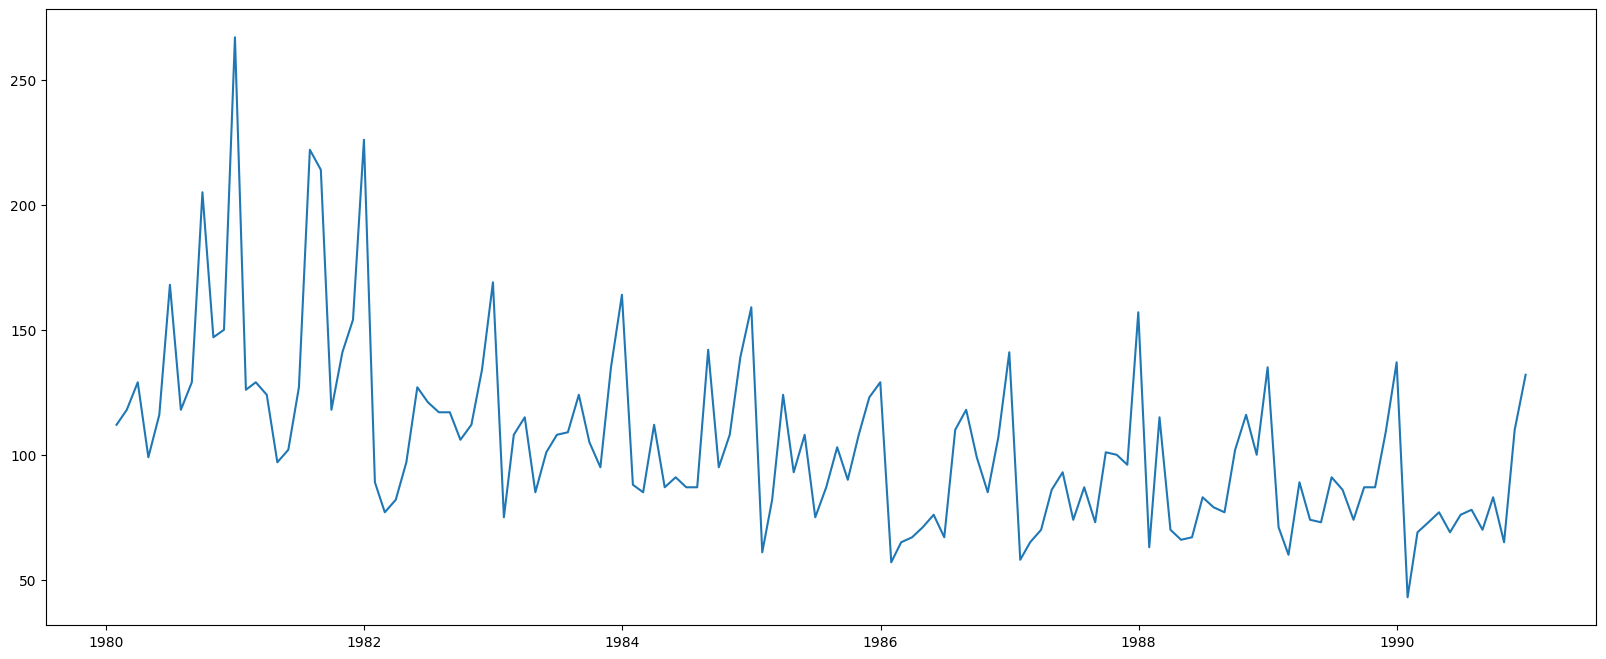

In [176]:
plt.plot(train);

- As noticed from the monthly plot, the time series is relatively constant for each month except for December, which shows a pattern. Since December has the highest sales, it has a significant impact on the time series.

- To address this, we apply a 12-month seasonal difference to the data and examine if it makes the training data stationary.






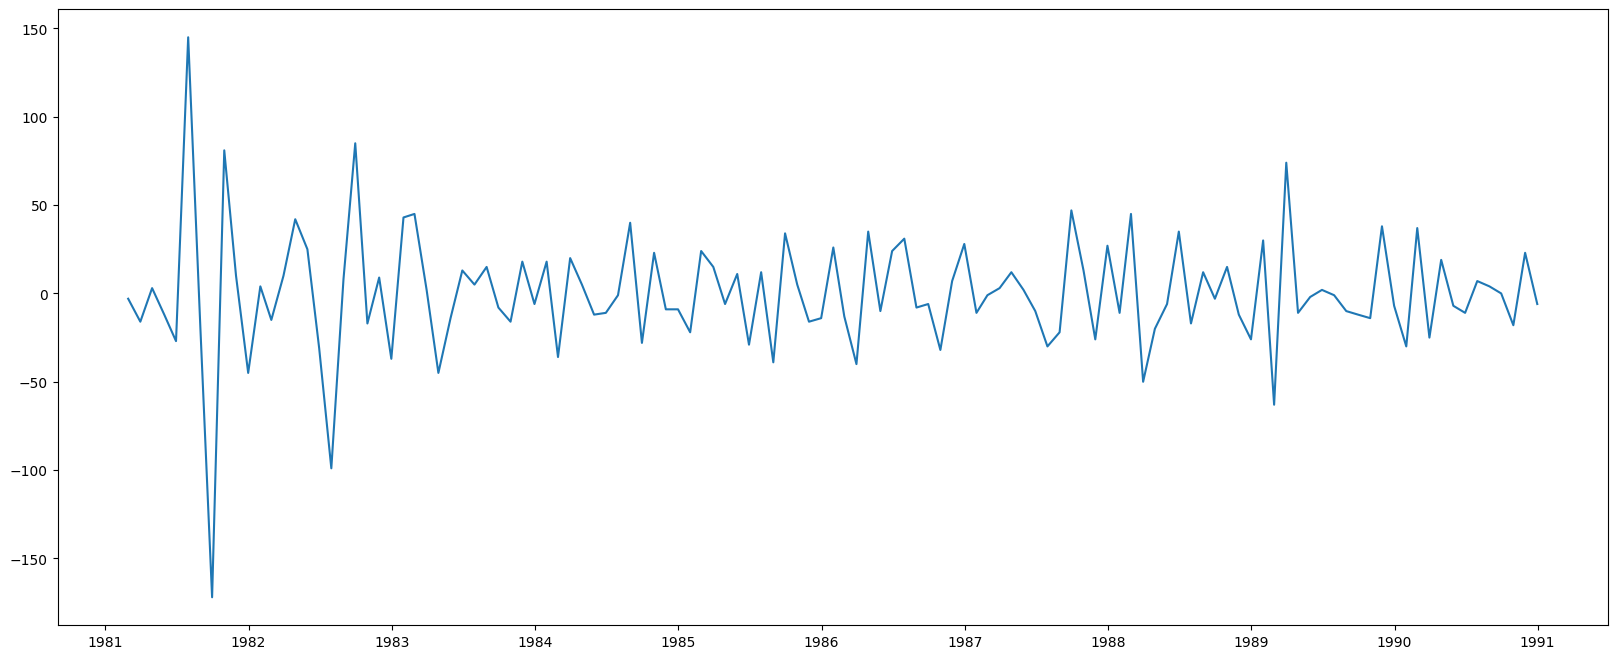

In [177]:
plt.plot((train.diff(12).dropna()).diff().dropna());

The time series looks stationary. Let's check for stationarity using Augmented Dickey - Fuller Test.

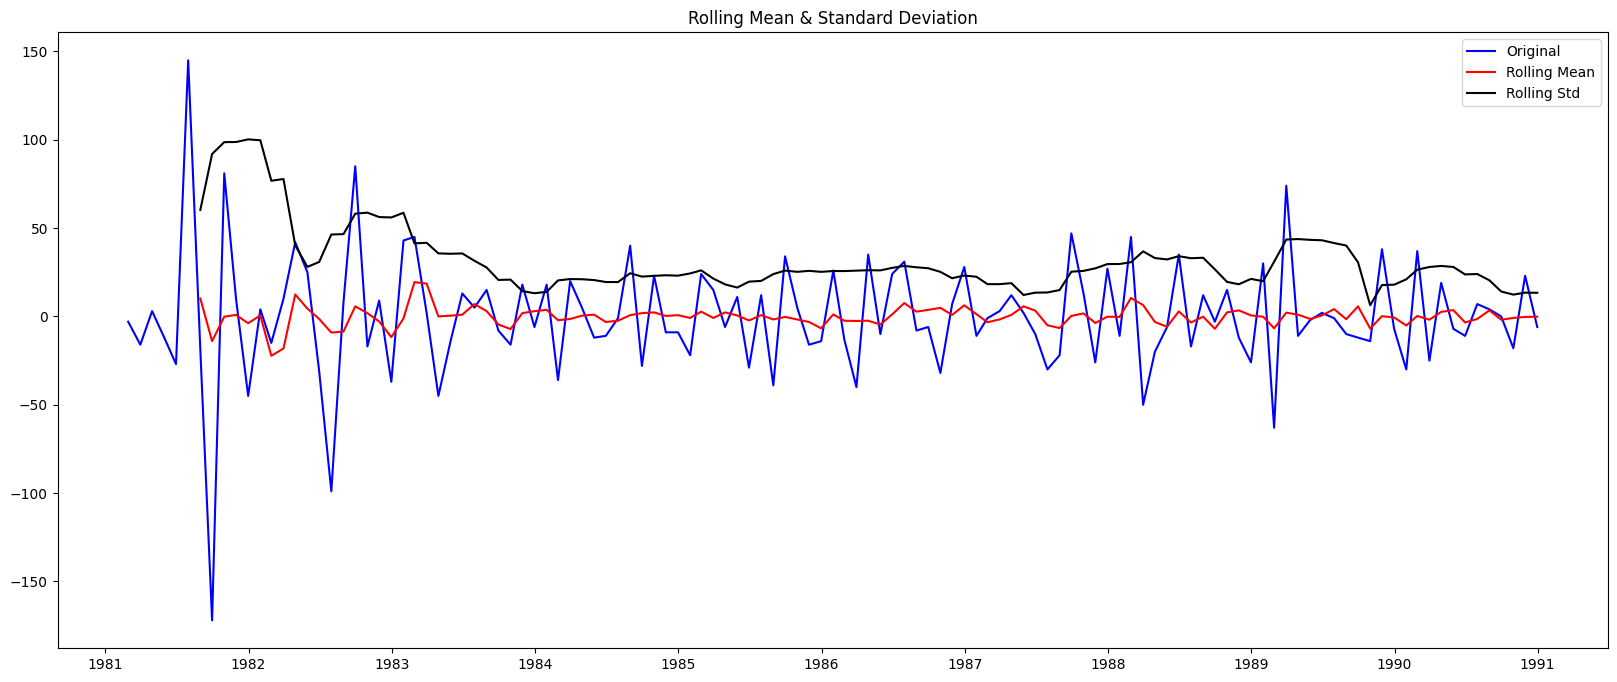

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [178]:
test_stationarity((train.diff(12).dropna()).diff().dropna())

- The p-value is less than 0.05, leading us to reject the null hypothesis (Ho) and conclude that the time series is stationary.

- Therefore, we can build our model with d = 0 (regular differencing) and D = 1 (seasonal differencing), as applying only seasonal differencing makes the time series stationary and prevents over-differencing.






In [179]:
p = q = range(0, 3)
d = [1]
D = [1]
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [180]:
SARIMA_AIC_sd = pd.DataFrame(columns = ['param', 'seasonal', 'AIC'])
SARIMA_AIC_sd

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [181]:
for param in pdq:
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(train, order = param, seasonal_order = param_seasonal,
                                             enforce_stationarity = False, enforce_invertibility = False).fit(maxiter = 1000)
    print('SARIMA', param, param_seasonal, '- AIC:', SARIMA_model.aic)
    SARIMA_AIC_sd = SARIMA_AIC_sd.append({'param': param, 'seasonal': param_seasonal, 'AIC': SARIMA_model.aic}, ignore_index = True)

SARIMA (0, 1, 0) (0, 1, 0, 12) - AIC: 1171.2013438278946
SARIMA (0, 1, 0) (0, 1, 1, 12) - AIC: 965.5057301641692
SARIMA (0, 1, 0) (0, 1, 2, 12) - AIC: 845.8687014776137
SARIMA (0, 1, 0) (1, 1, 0, 12) - AIC: 982.3269589658804
SARIMA (0, 1, 0) (1, 1, 1, 12) - AIC: 975.3375383601606
SARIMA (0, 1, 0) (1, 1, 2, 12) - AIC: 847.7332182654541
SARIMA (0, 1, 0) (2, 1, 0, 12) - AIC: 858.5132698374409
SARIMA (0, 1, 0) (2, 1, 1, 12) - AIC: 853.3390729150939
SARIMA (0, 1, 0) (2, 1, 2, 12) - AIC: 842.6282244225843
SARIMA (0, 1, 1) (0, 1, 0, 12) - AIC: 1113.766313356172
SARIMA (0, 1, 1) (0, 1, 1, 12) - AIC: 915.0730606717733
SARIMA (0, 1, 1) (0, 1, 2, 12) - AIC: 790.9032809266818
SARIMA (0, 1, 1) (1, 1, 0, 12) - AIC: 944.2456655531192
SARIMA (0, 1, 1) (1, 1, 1, 12) - AIC: 929.3362488520133
SARIMA (0, 1, 1) (1, 1, 2, 12) - AIC: 792.7161670323147
SARIMA (0, 1, 1) (2, 1, 0, 12) - AIC: 810.3194350158656
SARIMA (0, 1, 1) (2, 1, 1, 12) - AIC: 804.1555759467078
SARIMA (0, 1, 1) (2, 1, 2, 12) - AIC: 782.15387

In [182]:
SARIMA_AIC_sd.sort_values(by = 'AIC').head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 1, 2, 12)  774.969120
53  (1, 1, 2)  (2, 1, 2, 12)  776.940108
80  (2, 1, 2)  (2, 1, 2, 12)  776.996100
17  (0, 1, 1)  (2, 1, 2, 12)  782.153872
79  (2, 1, 2)  (2, 1, 1, 12)  783.703652

-  p = 0, d =1, q = 2, P = 2, D =1, Q = 2, S = 12

In [183]:
auto_SARIMA_sd = sm.tsa.statespace.SARIMAX(train, order = (0, 1, 2), seasonal_order = (2, 1, 2, 12),
                                        enforce_stationarity = False, enforce_invertibility = False).fit(maxiter = 1000)
print(auto_SARIMA_sd.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 06 Aug 2023   AIC                            774.969
Time:                                    15:00:02   BIC                            792.622
Sample:                                01-31-1980   HQIC                           782.094
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

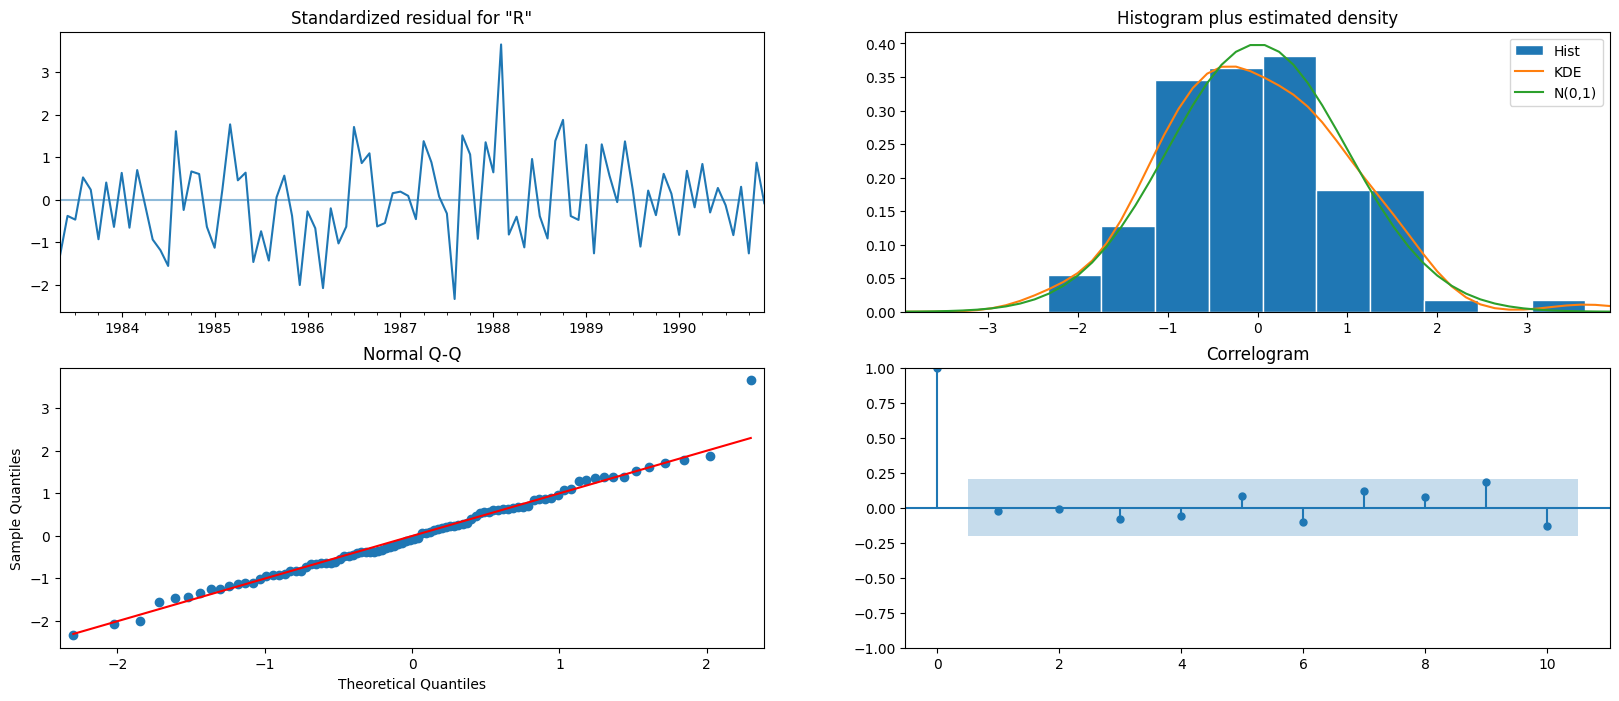

In [184]:
auto_SARIMA_sd.plot_diagnostics();

In [185]:
pred_auto_SARIMA_sd = auto_SARIMA_sd.get_forecast(len(test))

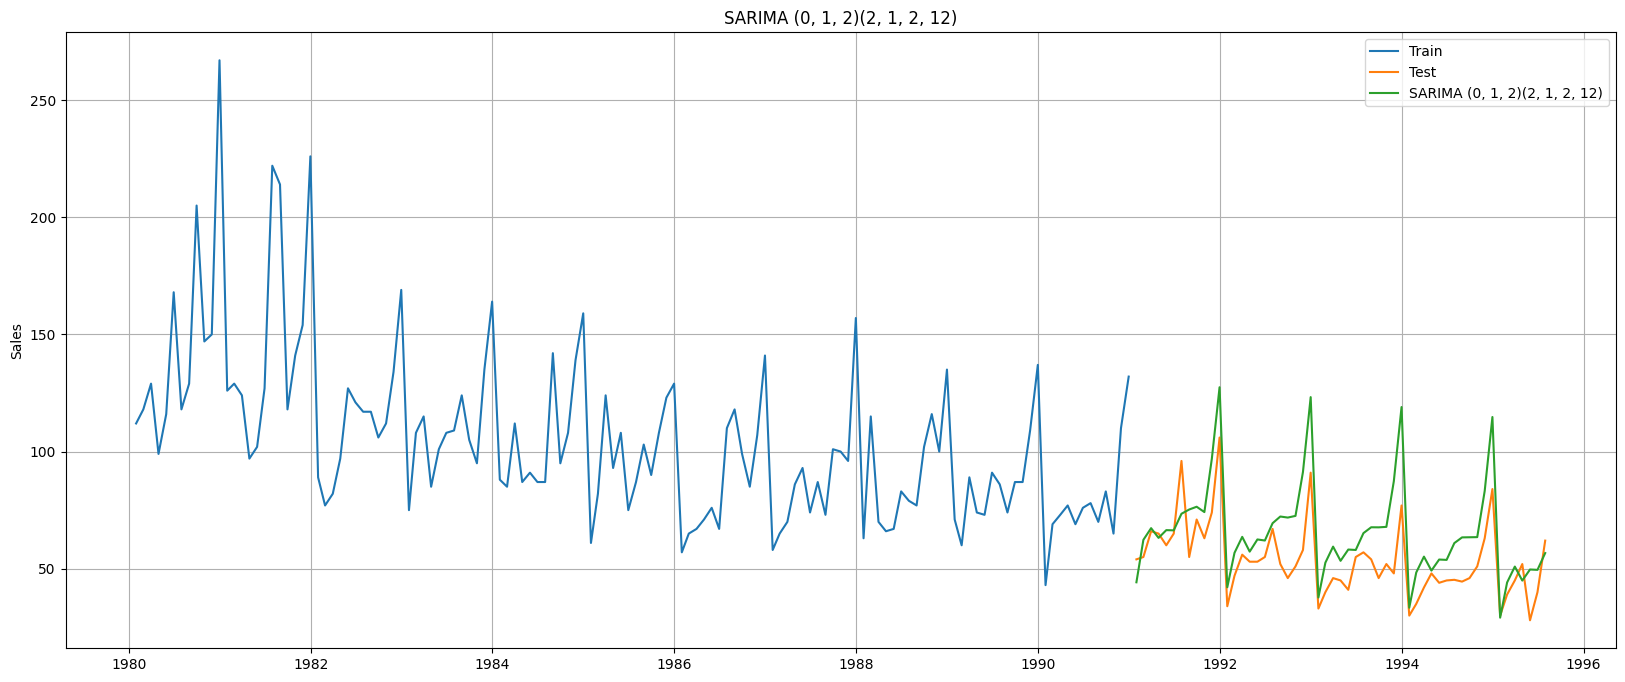

In [186]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred_auto_SARIMA_sd.predicted_mean, label = 'SARIMA (0, 1, 2)(2, 1, 2, 12)')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('Sales')
plt.title('SARIMA (0, 1, 2)(2, 1, 2, 12)');

In [187]:
#Calculating RMSE on Train data
pred_train_auto_SARIMA_sd = auto_SARIMA_sd.fittedvalues

# Ensure both arrays have the same length by adjusting the indexing
train = train.iloc[-len(pred_train_auto_SARIMA_sd):]

rmse_train_auto_SARIMA_sd = mean_squared_error(train, pred_train_auto_SARIMA_sd, squared=False)
rmse_train_auto_SARIMA_sd

39.181789873620744

In [188]:
train_rmse13 = pd.DataFrame({'Train_RMSE': [round(rmse_train_auto_SARIMA_sd, 2)]}, index=['Automated SARIMA(0, 1, 2)(2, 1, 2, 12)'])

train_rmse = pd.concat([train_rmse, train_rmse13])
train_rmse

Train_RMSE
Linear Regression On Time                                30.72
NaiveModel                                               45.06
Simple Average Model                                     36.03
2 point Trailing Moving Average                          19.67
Alpha = 0.099 Simple Exponential Smoothing               31.50
Alpha = 0.07 Simple Exponential Smoothing                32.65
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...       18.41
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       21.69
Automated ARIMA(0, 1, 2)                                 31.25
Automated SARIMA(0, 1, 2)(2, 0, 2, 12)                   32.23
Automated SARIMA(0, 1, 2)(2, 1, 2, 12)                   39.18

####Model Evaluation

In [189]:
#MAPE
mape_auto_SARIMA_sd = MAPE(test.values, pred_auto_SARIMA_sd.predicted_mean.values)
print('MAPE =', round(mape_auto_SARIMA_sd, 2))

MAPE = 44.49


In [190]:
#RMSE
rmse_auto_SARIMA_sd = mean_squared_error(test, pred_auto_SARIMA_sd.predicted_mean, squared = False)
print('RMSE =', round(rmse_auto_SARIMA_sd, 2))

RMSE = 16.52


In [191]:
resultsDf12 = pd.DataFrame({'Test_RMSE': round(rmse_auto_SARIMA_sd, 2), 'MAPE': round(mape_auto_SARIMA_sd, 2)}, index = ['Automated SARIMA(0, 1, 2)(2, 1, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf12])
resultsDf

Test_RMSE    MAPE
Linear Regression On Time                               15.28   25.01
NaiveModel                                              79.74  164.99
Simple Average Model                                    53.49  110.70
2 point Trailing Moving Average                         11.53   15.73
Alpha = 0.099 Simple Exponential Smoothing              36.82   76.00
Alpha = 0.07 Simple Exponential Smoothing               36.46   88.74
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...      15.28   30.14
Alpha = 0.04 & Beta = 0.47 Double Exponential S...      14.46   34.86
Alpha = 0.111, Beta = 0.049, Gamma = 0.362 Trip...      19.15   47.83
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       8.22   30.67
Automated ARIMA(0, 1, 2)                                37.33   77.04
Automated SARIMA(0, 1, 2)(2, 0, 2, 12)                  26.95   59.95
Automated SARIMA(0, 1, 2)(2, 1, 2, 12)                  16.52   44.49

**Insights:**
- The Automated SARIMA (0, 1, 2)(2, 1, 2, 12) model successfully captures both the trend and seasonality in the data.

- The Root Mean Square Error is 16.52, and the Mean Absolute Percentage Error is 44.49 for the automated SARIMA model with seasonal differencing.

- This model performs better than the model without seasonal differencing, indicating that incorporating seasonal differencing improves the accuracy of the forecast.




## **7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

- We created two Tables for Test & Train RMSE, let'scombine both & see the final results in single Table:-

In [192]:
pip install tabulate


In [193]:
from tabulate import tabulate

# Creating new DataFrame Final_results & sort it based on Test RMSE
Final_results = pd.merge(train_rmse, resultsDf, left_index=True, right_index=True, how='outer')
Final_results_sorted = Final_results.sort_values(by='Test_RMSE')

# Convert the train_rmse DataFrame to a tabular form
train_rmse_table = tabulate(train_rmse, headers='keys', tablefmt='pretty')

# Convert the resultsDf DataFrame to a tabular form
resultsDf_table = tabulate(resultsDf, headers='keys', tablefmt='pretty')

# Convert the Final_results_sorted DataFrame to a tabular form
final_results_table = tabulate(Final_results_sorted, headers='keys', tablefmt='pretty')
print("\nFinal Results Table:")
print(final_results_table)


Final Results Table:
+--------------------------------------------------------------------------+------------+-----------+--------+
|                                                                          | Train_RMSE | Test_RMSE |  MAPE  |
+--------------------------------------------------------------------------+------------+-----------+--------+
|   Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple Exponential Smoothing   |   21.69    |   8.22    | 30.67  |
|                     2 point Trailing Moving Average                      |   19.67    |   11.53   | 15.73  |
|      Alpha = 0.04 & Beta = 0.47 Double Exponential Smoothing Model       |    39.2    |   14.46   | 34.86  |
|                        Linear Regression On Time                         |   30.72    |   15.28   | 25.01  |
| Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Exponential Smoothing Model |   30.72    |   15.28   | 30.14  |
|                  Automated SARIMA(0, 1, 2)(2, 1, 2, 12)                  |   39.18    | 

##**8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

###Building the most optimum model on the Full Data.

In [194]:
#Let's check the best performing models:

Final_results.sort_values(by = 'Test_RMSE').head(6)

Train_RMSE  Test_RMSE  \
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...       21.69       8.22   
2 point Trailing Moving Average                          19.67      11.53   
Alpha = 0.04 & Beta = 0.47 Double Exponential S...       39.20      14.46   
Linear Regression On Time                                30.72      15.28   
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...       30.72      15.28   
Automated SARIMA(0, 1, 2)(2, 1, 2, 12)                   39.18      16.52   

                                                     MAPE  
Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple ...  30.67  
2 point Trailing Moving Average                     15.73  
Alpha = 0.04 & Beta = 0.47 Double Exponential S...  34.86  
Linear Regression On Time                           25.01  
Alpha = 1.49*10^-8, Beta = 5.44*10^-9 Double Ex...  30.14  
Automated SARIMA(0, 1, 2)(2, 1, 2, 12)              44.49

The most optimum models for forecasting are:
- **Optimal Model: Tuned Triple Exponential Smoothing**
 - Alpha = 0.04, Beta = 0.52, Gamma = 0.10
 - Best accuracy in capturing trend and seasonality.

- **2-Point Trailing Moving Average:**
 - Used for analysis, provides only 1-step forecast.
 - Inadequate for capturing seasonality during forecasts.

- **Linear Regression & Double Exponential Smoothing:**
 - Accurately captures trend but fails to capture seasonality.
 - Better accuracy due to the slowly flattening trend.

- **Automated SARIMA(0, 1, 2)(2, 1, 2, 12)**
 - Shows reasonable accuracy
 - Captures both Trend and seasonality

- **Recommendation**

 - For comprehensive forecasting, we will build Automated SARIMA(0, 1, 2)(2, 1, 2, 12) model and Triple Exponential Smoothing (Alpha = 0.04, Beta = 0.52, Gamma = 0.10) model.
 - Capable of predicting 12 months ahead.

 - Capture both trend and seasonality effectively



###Forecasting - Tuned Triple Exponential Model with Alpha = 0.04, Beta = 0.52, Gamma = 0.10

In [195]:
full_data_model1 = ExponentialSmoothing(df,
                                        trend = 'additive',
                                        seasonal = 'multiplicative',
                                           initialization_method ='estimated').fit(smoothing_level = 0.04,
                                                                                    smoothing_trend = 0.52,
                                                                                    smoothing_seasonal = 0.1)

In [196]:
print('RMSE Full Model =', mean_squared_error(df, full_data_model1.fittedvalues, squared = False))

RMSE Full Model = 18.079902930654736


In [197]:
pred_full_data = full_data_model1.forecast(12)

- Assumption: Forecast distribution's standard deviation ≈ Residual standard deviation.
- Purpose: Helps estimate uncertainty in the forecast.
- Use: Construct confidence intervals with a specified level of confidence.







In [198]:
pred_df = pd.DataFrame({'lower_ci': pred_full_data - 1.96 * np.std(full_data_model1.resid, ddof = 1),
                        'prediction': pred_full_data,
                        'upper_ci': pred_full_data + 1.96 * np.std(full_data_model1.resid, ddof = 1)})
pred_df

lower_ci  prediction    upper_ci
1995-08-31  17.729526   53.245088   88.760651
1995-09-30  17.942683   53.458245   88.973807
1995-10-31  18.939987   54.455549   89.971111
1995-11-30  28.133732   63.649294   99.164856
1995-12-31  53.560644   89.076206  124.591768
1996-01-31   1.059142   36.574704   72.090266
1996-02-29   8.638256   44.153818   79.669380
1996-03-31  14.478913   49.994476   85.510038
1996-04-30  13.522119   49.037681   84.553243
1996-05-31  11.919426   47.434988   82.950550
1996-06-30  17.462925   52.978487   88.494049
1996-07-31  25.609165   61.124727   96.640289

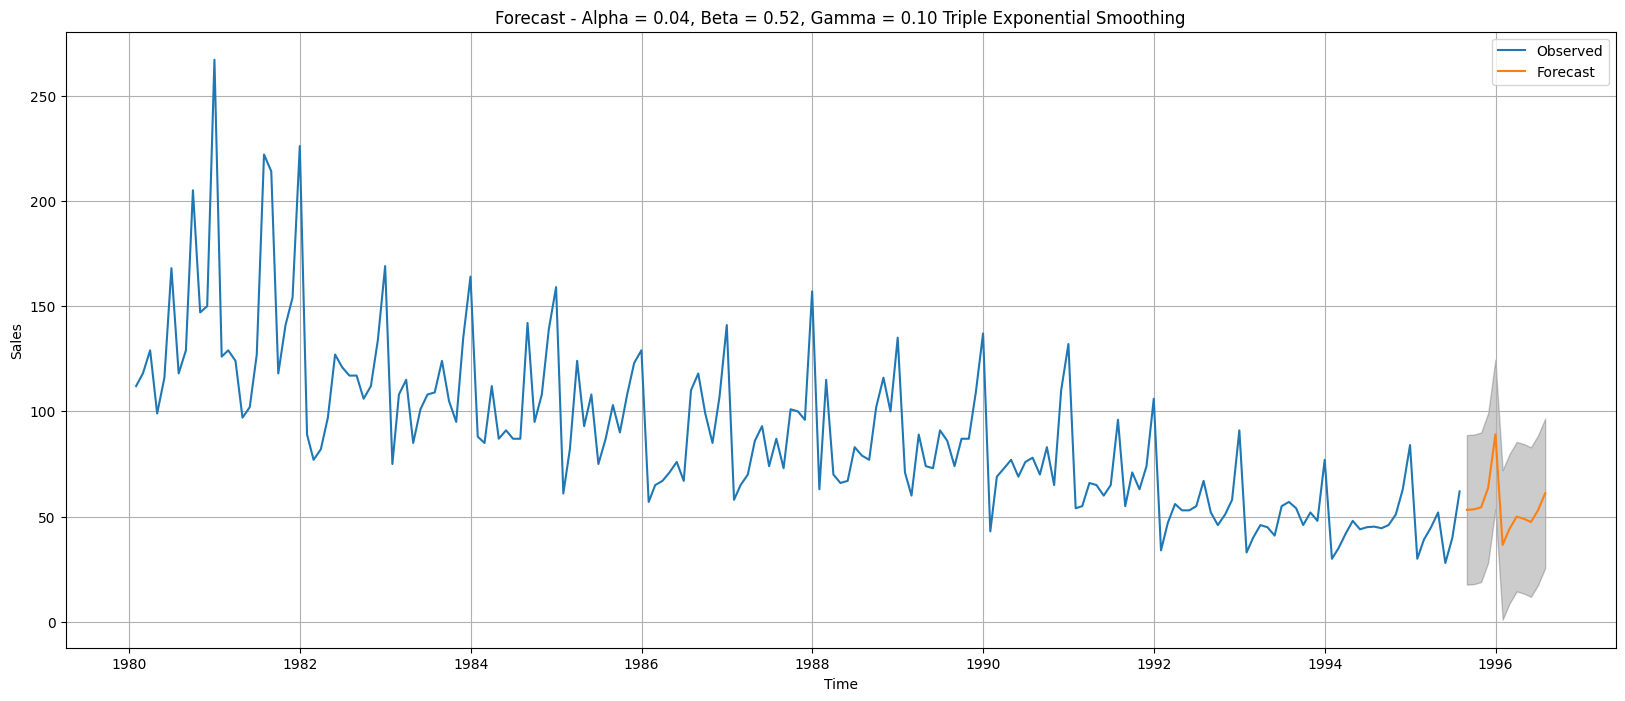

In [199]:
plt.plot(df, label = 'Observed')
plt.plot(pred_df['prediction'], label = 'Forecast')
plt.fill_between(pred_df.index, pred_df['lower_ci'], pred_df['upper_ci'], color = 'k', alpha = 0.20)

plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.title('Forecast - Alpha = 0.04, Beta = 0.52, Gamma = 0.10 Triple Exponential Smoothing')
plt.grid();

###Forecasting - Automated SARIMA with seasonal differencing - SARIMA (0, 1, 2)(2, 1, 2, 12)

Before building the SARIMA models on the full data, we need to check  the stationarity after applying seasonal differencing D=12.

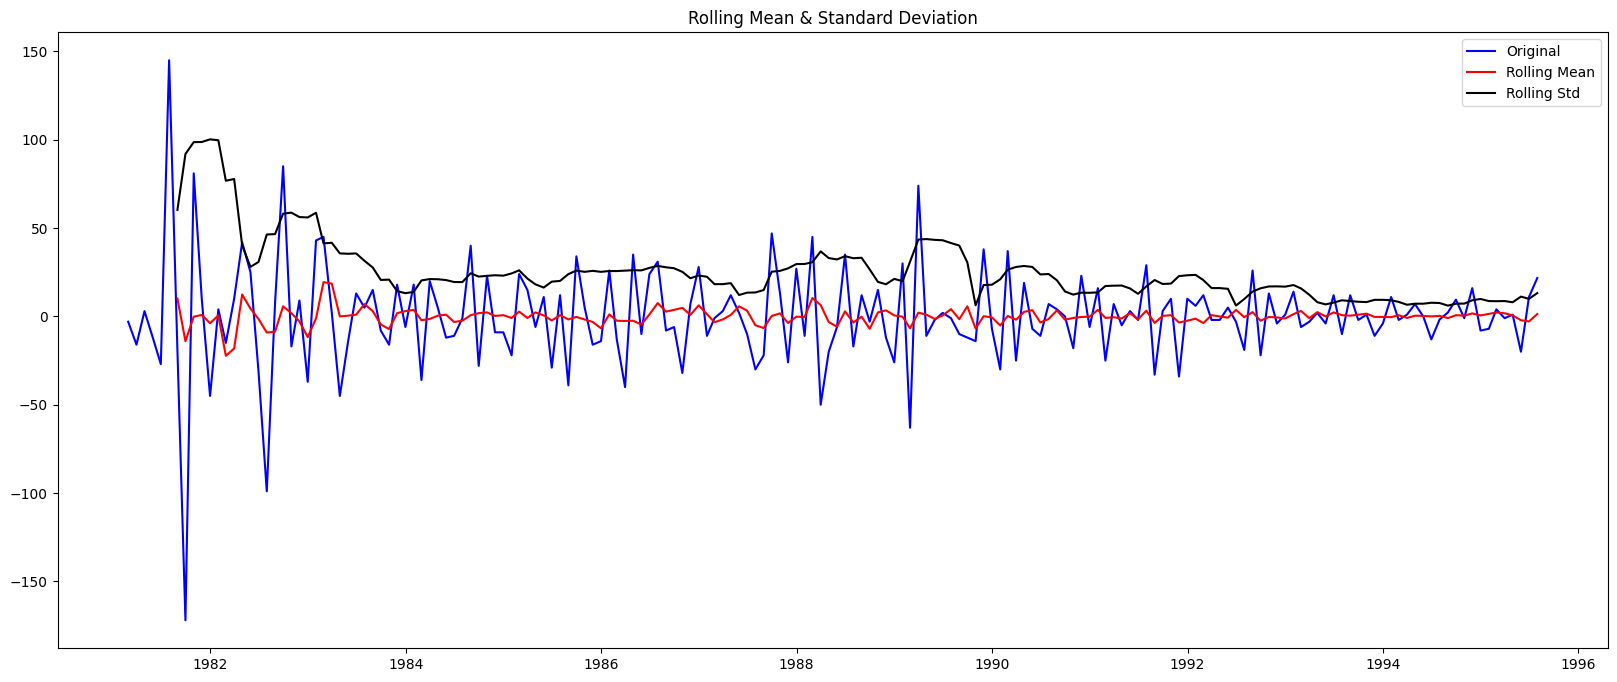

Results of Dickey-Fuller Test:
Test Statistic                  -4.605600
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [200]:
test_stationarity((df.diff(12).dropna()).diff().dropna())

at p-value < 0.05 we reject the Null Hypothesis & conclude that the full data is also Stationary at 95% confidence level

In [201]:
full_data_model2 = sm.tsa.statespace.SARIMAX(df,
                                order=(0,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model2 = full_data_model2.fit(maxiter=1000)
print(results_full_data_model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -588.612
Date:                            Sun, 06 Aug 2023   AIC                           1191.223
Time:                                    15:00:15   BIC                           1212.156
Sample:                                01-31-1980   HQIC                          1199.729
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8254      0.080    -10.332      0.000      -0.982      -0.669
ma.L2         -0.0807      0.086   

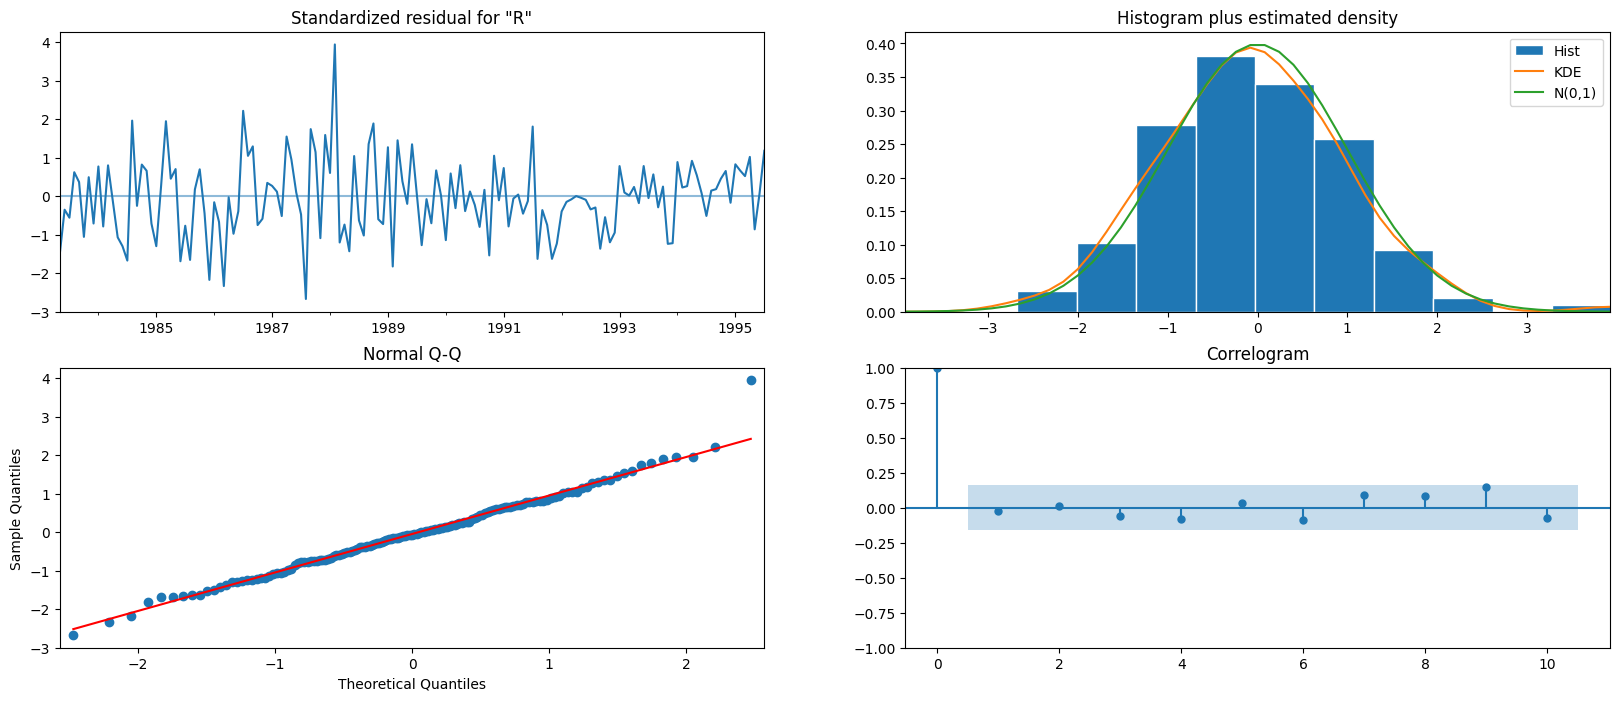

In [202]:
results_full_data_model2.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future

In [203]:
predicted_SARIMA_full_data = results_full_data_model2.get_forecast(steps=12)

In [204]:
predicted_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  42.985812  12.890666      17.720571      68.251053
1995-09-30  43.514729  13.085857      17.866921      69.162537
1995-10-31  45.493227  13.141787      19.735798      71.250656
1995-11-30  57.522291  13.197489      31.655688      83.388895
1995-12-31  84.992662  13.252978      59.017303     110.968021

In [205]:
rmse = mean_squared_error(df['Rose'],results_full_data_model2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.471595126940535


In [206]:
pred_full_SARIMA_date = predicted_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [207]:
pred_full_SARIMA_date

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  42.985812  12.890666      17.720571      68.251053
1995-09-30  43.514729  13.085857      17.866921      69.162537
1995-10-31  45.493227  13.141787      19.735798      71.250656
1995-11-30  57.522291  13.197489      31.655688      83.388895
1995-12-31  84.992662  13.252978      59.017303     110.968021
1996-01-31  20.574774  13.308022      -5.508469      46.658018
1996-02-29  30.225068  13.363002       4.034066      56.416070
1996-03-31  36.974571  13.417674      10.676413      63.272728
1996-04-30  38.519865  13.472149      12.114938      64.924791
1996-05-31  29.045411  13.526459       2.534038      55.556784
1996-06-30  36.323622  13.580559       9.706215      62.941029
1996-07-31  49.468464  13.634457      22.745419      76.191509

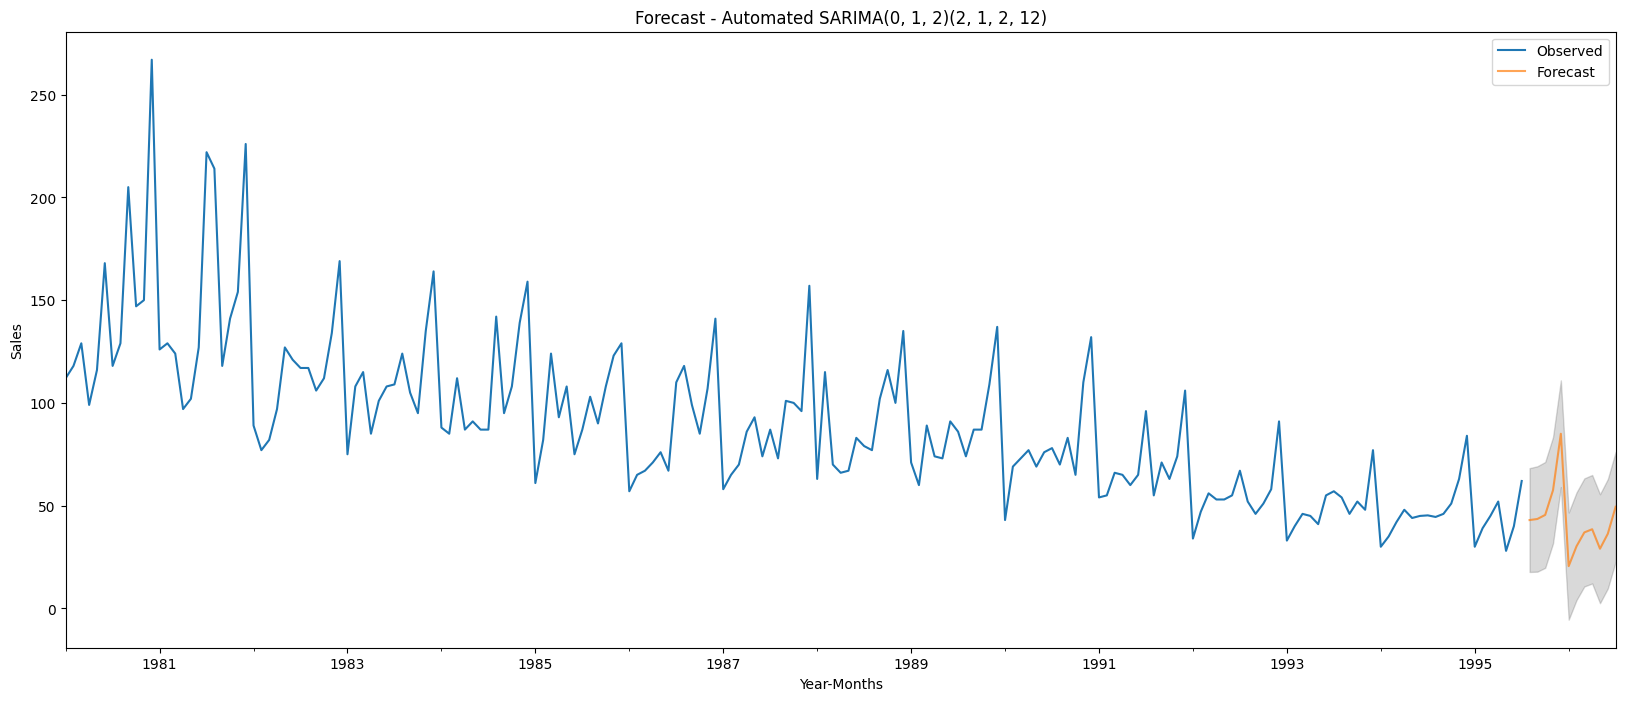

In [208]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'],
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('Forecast - Automated SARIMA(0, 1, 2)(2, 1, 2, 12)')
plt.legend(loc='best')
plt.show()

## **9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.**

###**Forecasting Insights:**

#### **Data Analysis:**

- The data shows a consistent decreasing trend in Rose wine sales over the years, indicating a declining pattern in customer demand for this type of wine.

- Despite the overall decreasing trend, there are still seasonal variations in the data, with sales peaking in certain months (towards the end of each year) and dropping in others.



#### **Time Series Characteristics:**

- The time series exhibits a clear downward trend across the years, with a sharper dip observed after 1991 compared to before 1991.

- Seasonality is present in the data, as sales pick up in the ending months of the year.

- The time series cannot be definitively classified as either an additive or multiplicative time series, but it leans closer to a multiplicative nature.



#### **Model Performance:**

- The Tuned Triple Exponential Smoothing model with Alpha = 0.04, Beta = 0.52, and Gamma = 0.10 shows the best accuracy in capturing trend and seasonality.

- The 2-Point Trailing Moving Average model is mainly used for analysis and provides only a 1-step forecast, making it inadequate for capturing seasonality during forecasts.

- Linear Regression & Double Exponential Smoothing accurately capture trend but fail to capture seasonality. However, they show better accuracy due to the slowly flattening trend.

- The Automated SARIMA(0, 1, 2)(2, 1, 2, 12) model shows reasonable accuracy and captures both trend and seasonality.



#### **Prediction Model:**

For comprehensive forecasting and predicting 12 months ahead, we built the following models:

- Automated SARIMA(0, 1, 2)(2, 1, 2, 12): It captures both trend and seasonality effectively. The RMSE of the Full Model is 18.07.

- Tuned Triple Exponential Smoothing (Alpha = 0.04, Beta = 0.52, Gamma = 0.10): It exhibits the best accuracy in capturing trend and seasonality. The RMSE of the Full Model is 33.47.



#### **Measures for Future Sales:**

- A **critical decision** must be taken to either discontinue the Rose wine or undertake product and process enhancements to boost sales.  

To improve future sales, ABC Estate Wines should consider the following strategies:

- **Customer Engagement**: Strengthen customer relationships through personalized offers, loyalty programs, and active engagement to foster repeat business.

 - Marketing promotions,Sponsoring small & large events having target audience

 - Advertisements strategies such as launching non-alcoholic beverages with the same brand name to again popularity


- **Capitalize on Seasonal Trends**: Plan production and marketing efforts to meet increased demand during holiday seasons, especially in November and December.

- **Inventory Management**: Implement effective inventory management to avoid stockouts during peak periods and minimize excess inventory during slower periods.

- **Pricing Strategy**: Utilize dynamic pricing to adjust prices during peak and off-peak periods, attracting more customers and optimizing revenue.

- **Competitor benchmarking**: Figure out competitor businesses for similar wines to understand the demand of rose wine in the market and make necessary changes